In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [376]:
# Define the file path
first = r'1.csv'

# Attempt to read the CSV file, allowing for irregular rows
df1 = pd.read_csv(first, on_bad_lines='skip', delimiter=';')
df1.fillna('', inplace=True)

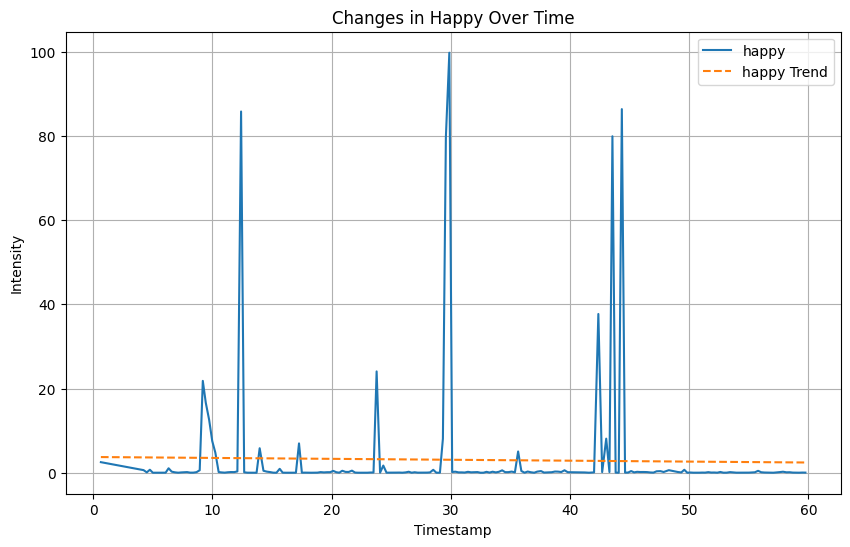

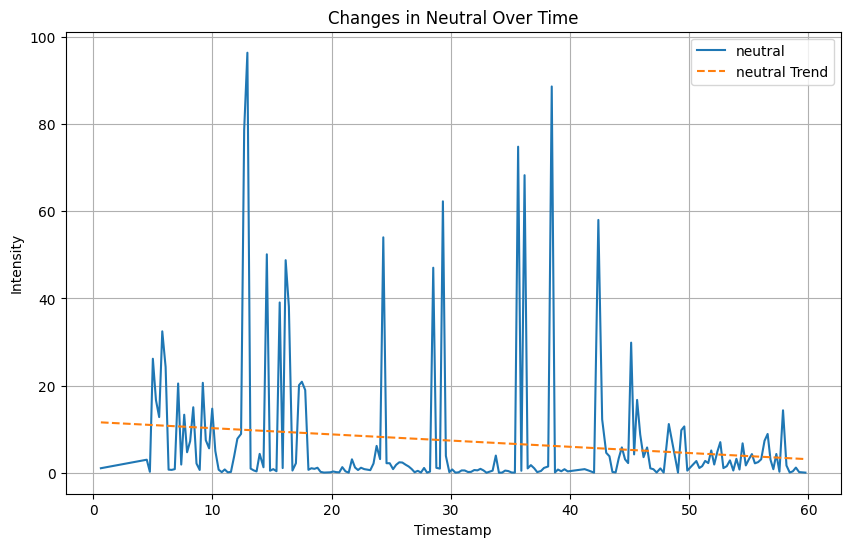

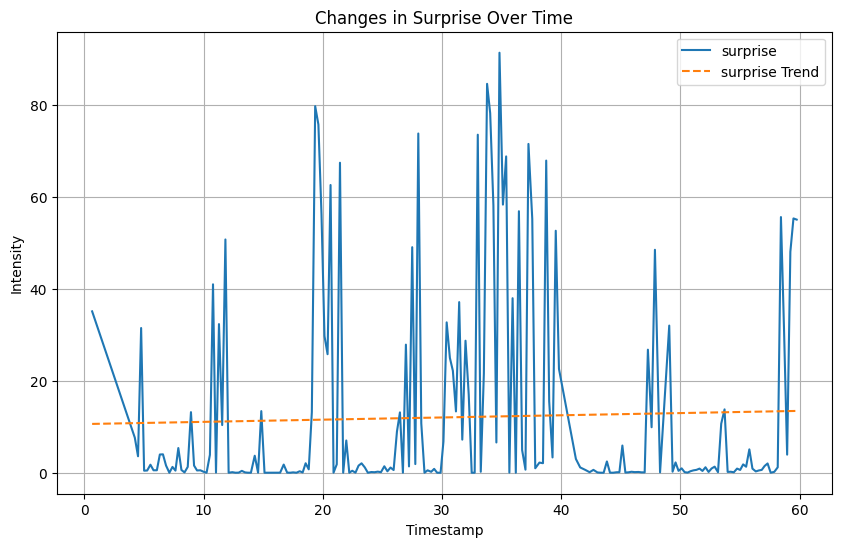

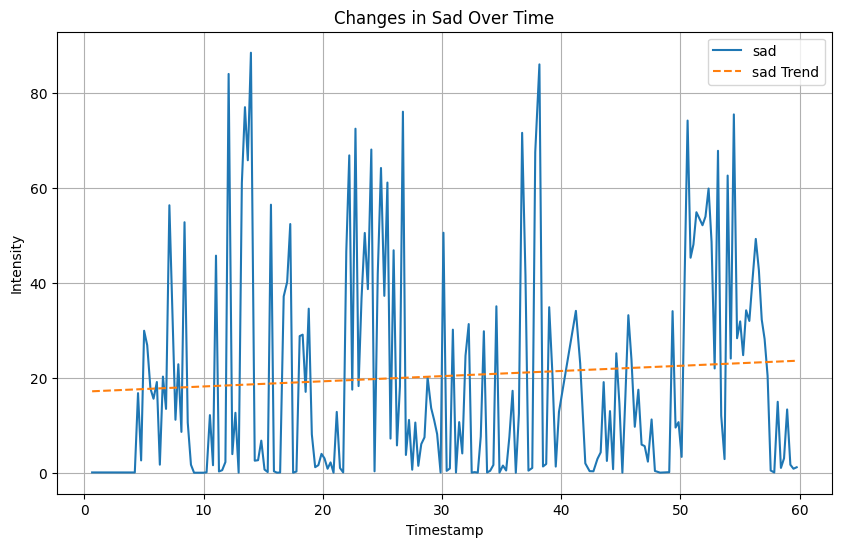

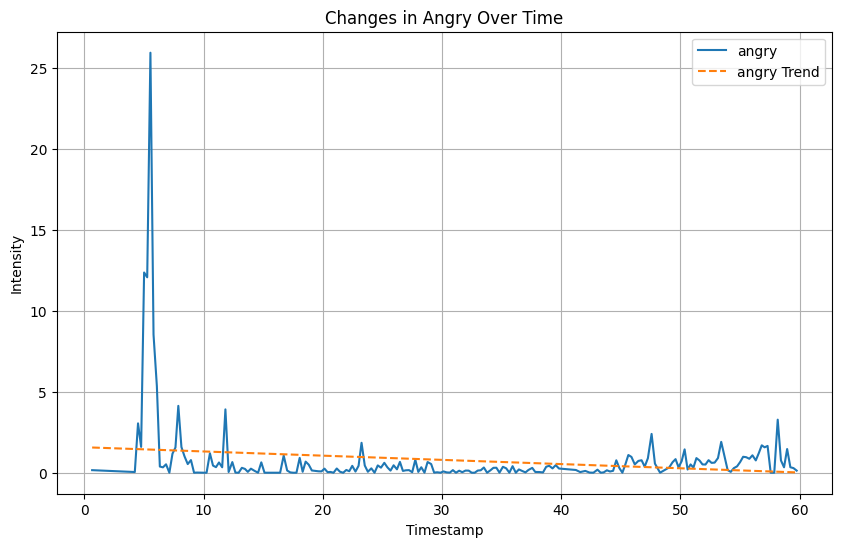

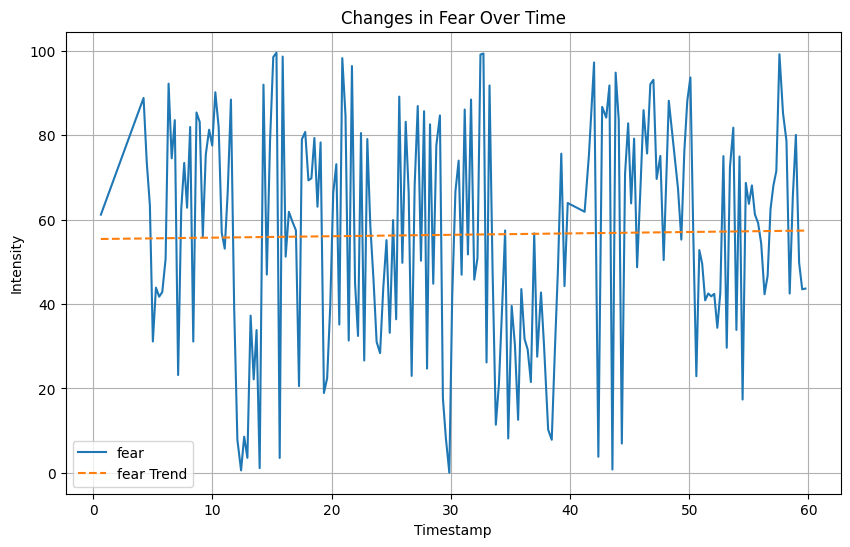

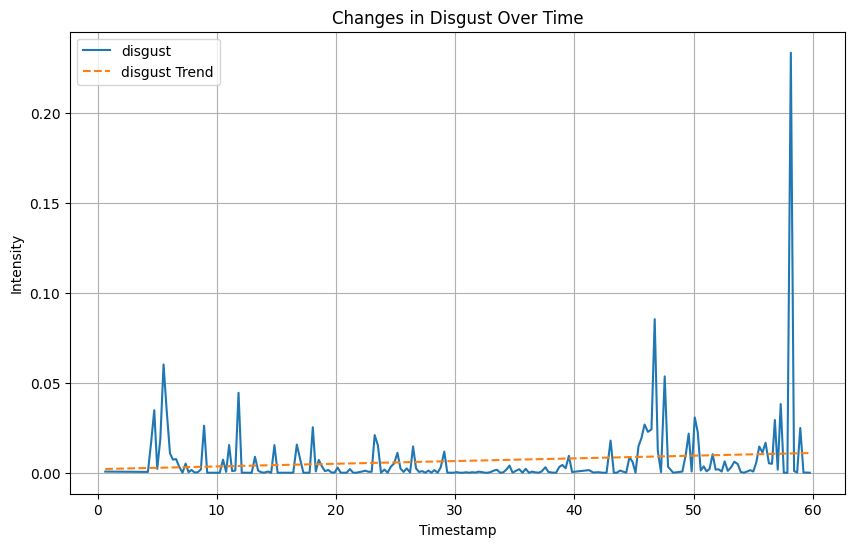

In [377]:
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean1 = df1.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean1[numeric_columns] = df_clean1[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean1[numeric_columns] = df_clean1[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean1[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [378]:
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean1 = df_clean1.drop('timestamp', axis=1)
stats = df_clean1.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

Basic statistics about each of emotions emotion:
               mean        std           min        25%        50%        75%  \
happy      3.049704  13.875939  3.772370e-04   0.018467   0.080793   0.228287   
neutral    7.180792  16.024380  7.566240e-04   0.469464   1.145493   4.448285   
surprise  12.076319  21.685476  7.860250e-07   0.115369   0.951588  11.929647   
sad       20.497589  22.898753  7.377160e-04   1.304562  12.020051  34.067064   
angry      0.758631   2.310421  9.262160e-07   0.045213   0.273418   0.659938   
fear      56.430280  26.144889  3.315054e-02  39.240688  58.638686  78.819400   
disgust    0.006686   0.019526  1.344480e-14   0.000015   0.000802   0.005185   

                max  
happy     99.775863  
neutral   96.381688  
surprise  91.297787  
sad       88.477289  
angry     25.951621  
fear      99.519163  
disgust    0.233315  

Relation of each emotion to others:
happy       0.030497
neutral     0.071808
surprise    0.120763
sad         0.204976
angry

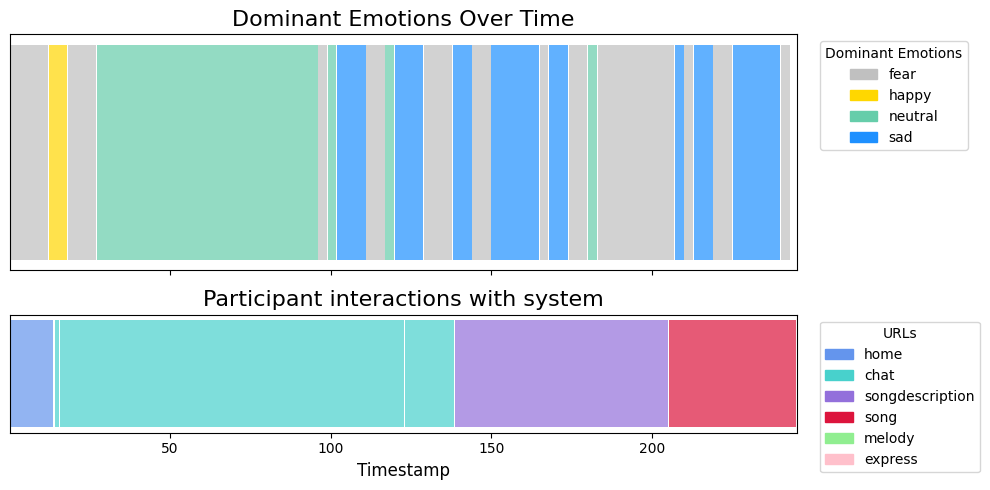

Dominant Emotion for Segment 1: fear


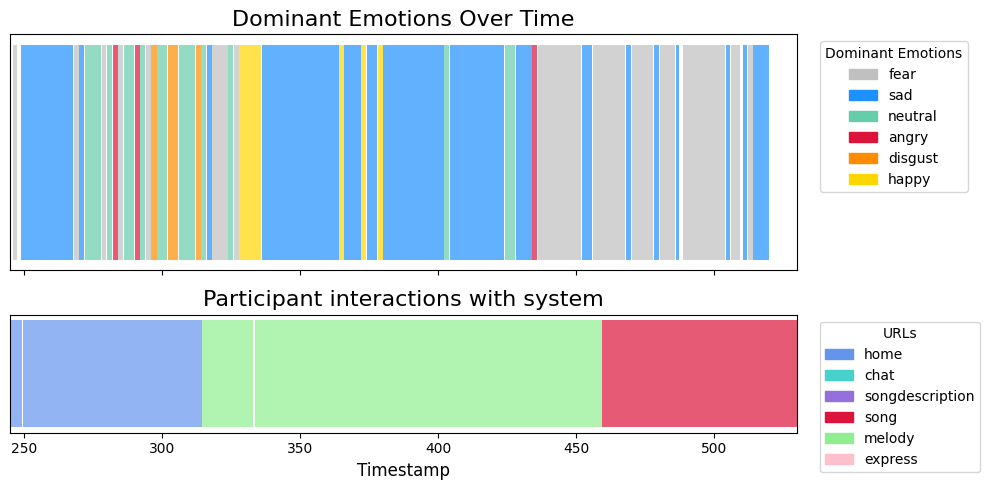

Dominant Emotion for Segment 2: sad


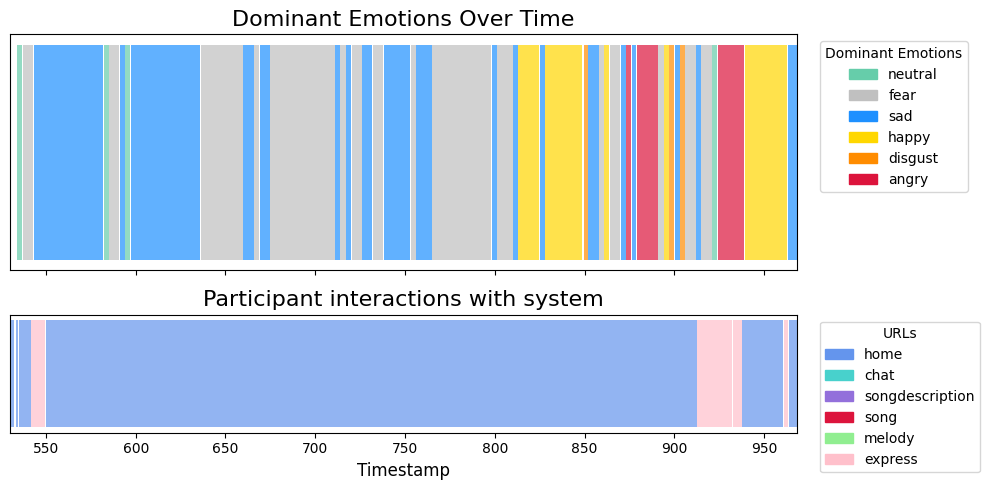

Dominant Emotion for Segment 3: sad


In [8]:
two = r'2.csv'

df_clean2 = pd.DataFrame(pd.read_csv(two, on_bad_lines='skip', delimiter=';'))
df_clean2.fillna('', inplace=True)


df_clean2_url = df_clean2.dropna(subset=['url'])

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean2_url[numeric_columns] = df_clean2_url[numeric_columns].replace(',', '.', regex=True)

df_clean2_url['url'] = df_clean2_url['url'].str.replace('/', '')

df_clean2_url['timestamp'] = pd.to_numeric(df_clean2_url['timestamp'], errors='coerce')

df_clean2_url['url_change'] = (df_clean2_url['url'] != df_clean2_url['url'].shift()).cumsum()

df_grouped = df_clean2_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean2_url['timestamp'].max()

df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

df_grouped = df_grouped[df_grouped['url'] != '']

url_colors = {
    'home': 'cornflowerblue',
    'melody': 'lightgreen',
    'chat': 'mediumturquoise',
    'express': 'pink',
    'song': 'crimson',
    'songdescription': 'mediumpurple',
    'colour': 'beige',
    'talk': 'coral',
}

unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

df_clean2_emotion = df_clean2.copy()

df_clean2_emotion[numeric_columns] = df_clean2_emotion[numeric_columns].replace(',', '.', regex=True)

df_clean2_emotion[numeric_columns] = df_clean2_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')

emotion_colors = {
    'happy': 'gold',
    'neutral': 'mediumaquamarine',
    'surprise': 'mediumpurple',
    'sad': 'dodgerblue',
    'angry': 'crimson',
    'fear': 'silver',
    'disgust': 'darkorange'
}

start_urls = ['START1', 'START2', 'START3']
end_urls = ['END1', 'END2', 'END3']

segments = []
current_start = None
for idx, row in df_clean2_url.iterrows():
    if row['interaction_type'] in start_urls:
        if current_start is not None:
            segments.append((current_start, idx - 1))
        current_start = idx
    elif row['interaction_type'] in end_urls and current_start is not None:
        segments.append((current_start, idx + 2))
        current_start = None

if current_start is not None:
    segments.append((current_start, len(df_clean2_url) - 1))

dfs = [df_clean2_url.iloc[start:end + 1].reset_index(drop=True) for start, end in segments]

for segment_number, df_segment in enumerate(dfs, 1):
    start_time = df_segment['timestamp'].iloc[0]
    end_time = df_segment['timestamp'].iloc[-1]
    
    if segment_number == 1:
        interval = 3
    elif segment_number == 2:
        interval = 2
    elif segment_number == 3:
        interval = 3 
    
    df_clean2_emotion['interval'] = (df_clean2_emotion['timestamp'] // interval) * interval

    dominant_emotions = df_clean2_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

    df_clean2_emotion['dominant_emotion'] = df_clean2_emotion['interval'].map(dominant_emotions)
    df_clean2_emotion['emotion_change'] = (df_clean2_emotion['dominant_emotion'] != df_clean2_emotion['dominant_emotion'].shift()).cumsum()

    df_emotion_grouped = df_clean2_emotion.groupby('emotion_change').agg({
        'timestamp': ['first', 'last'],
        'dominant_emotion': 'first'
    }).reset_index()

    df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

    df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

    df_emotion_grouped = df_emotion_grouped.dropna(subset=['dominant_emotion'])
    
    df_emotion_segment = df_emotion_grouped[
        (df_emotion_grouped['start_timestamp'] >= start_time) & 
        (df_emotion_grouped['end_timestamp'] <= end_time)
    ]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

    unique_emotions = df_emotion_segment['dominant_emotion'].unique()
    emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions if emotion in emotion_colors}

    for _, row in df_emotion_segment.iterrows():
        duration = row['end_timestamp'] - row['start_timestamp']
        if row['dominant_emotion'] in emotion_color_map:
            ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

    emotion_handles = [plt.Rectangle((0,0),2,2, color=emotion_color_map[emotion]) for emotion in unique_emotions if emotion in emotion_color_map]
    ax1.legend(emotion_handles, [emotion for emotion in unique_emotions if emotion in emotion_color_map], title="Dominant Emotions", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax1.set_yticks([])
    ax1.set_title(f'Dominant Emotions Over Time', fontsize=16)

    for i, row in df_grouped.iterrows():
        if row['start_timestamp'] >= start_time and row['end_timestamp'] <= end_time:
            duration = row['end_timestamp'] - row['start_timestamp']
            ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=url_color_map[row['url']], alpha=0.7)

    handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
    ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax2.set_yticks([])
    ax2.set_xlabel('Timestamp', fontsize=12)
    ax2.set_title(f'Participant interactions with system', fontsize=16)

    ax1.set_xlim(start_time, end_time)
    ax2.set_xlim(start_time, end_time)

    plt.tight_layout()
    plt.show()
    dominant_emotion = df_emotion_segment['dominant_emotion'].mode()[0]
    print(f"Dominant Emotion for Segment {segment_number}: {dominant_emotion}")

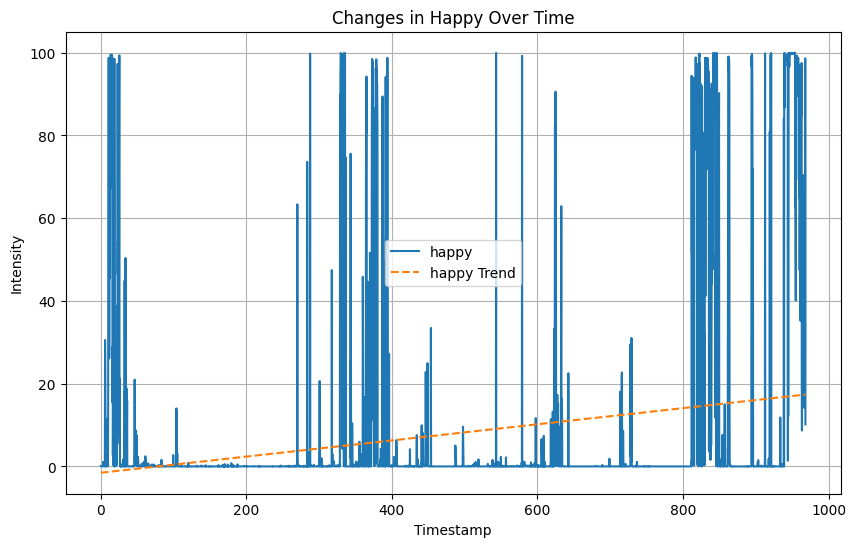

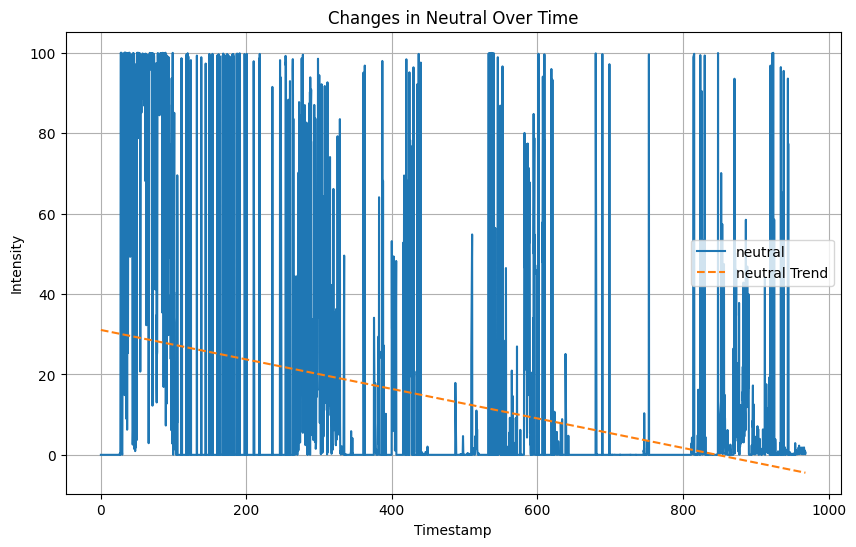

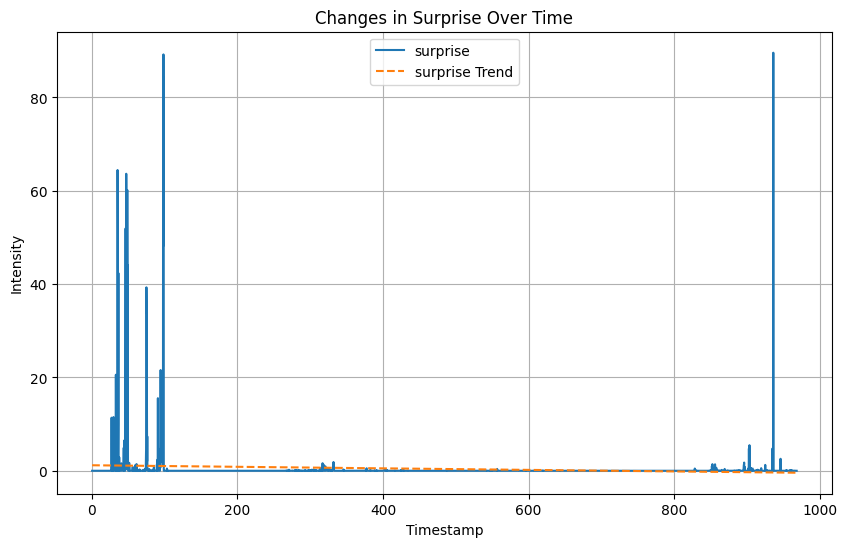

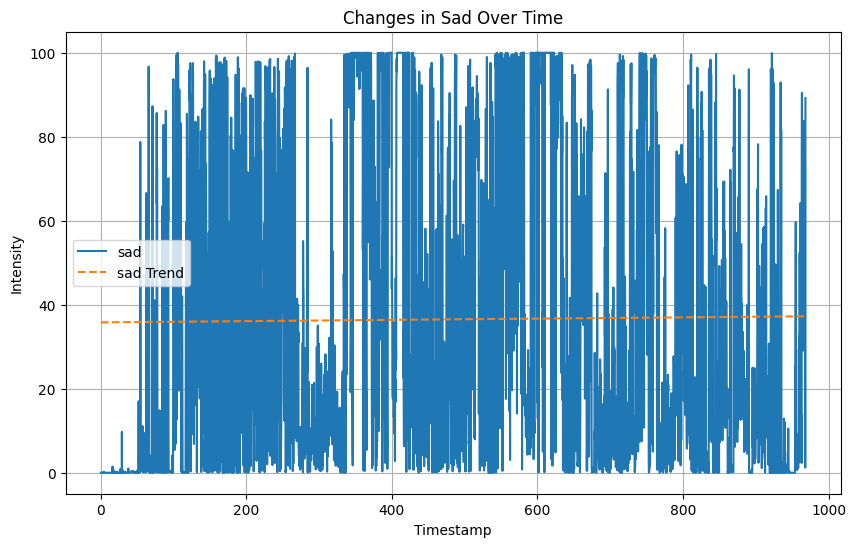

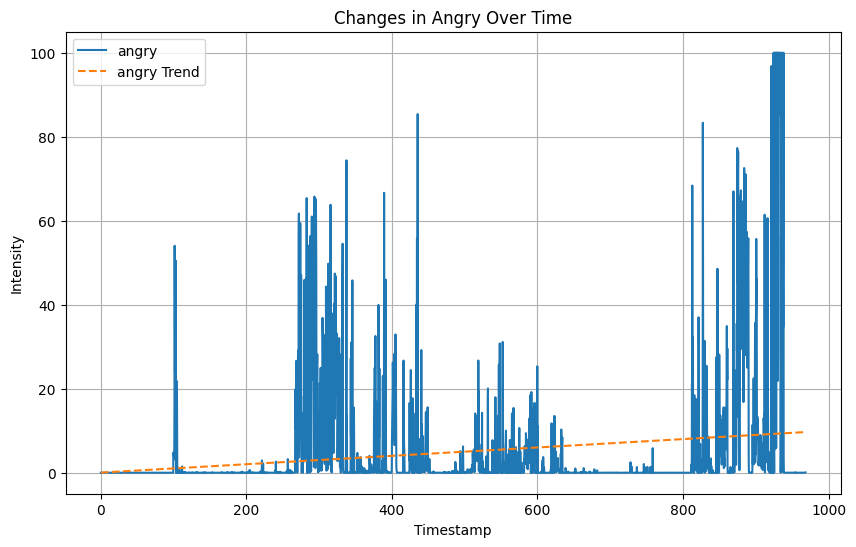

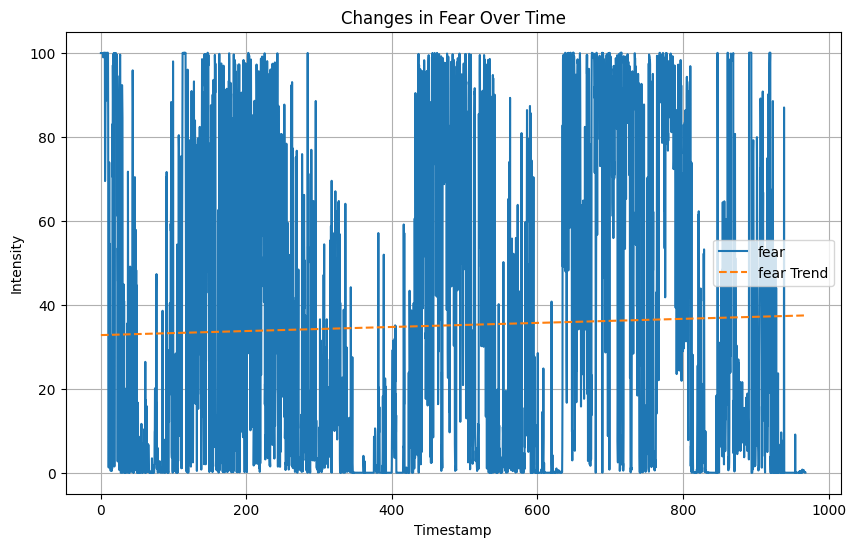

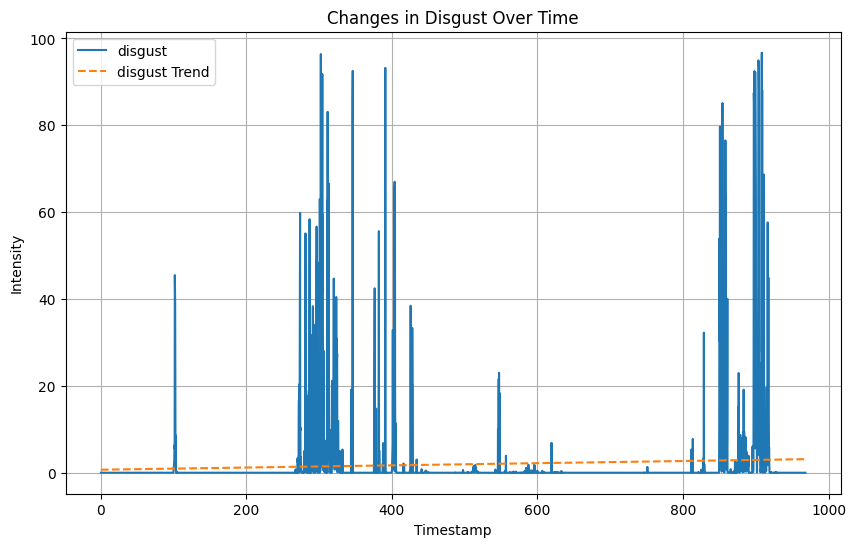

Basic statistics about each of emotions emotion:
               mean        std           min           25%           50%  \
happy      7.927444  24.397231  1.540000e-16  1.760000e-06  8.081455e-04   
neutral   13.295249  29.362161  3.020000e-19  9.782500e-07  1.767730e-04   
surprise   0.380831   4.096313  3.840000e-26  2.810000e-15  3.590000e-10   
sad       36.518852  37.412460  2.530000e-11  2.380884e+00  2.006028e+01   
angry      4.858236  14.300416  9.200000e-17  1.028867e-04  3.981195e-03   
fear      35.111894  37.624597  4.950000e-12  5.007555e-01  1.693535e+01   
disgust    1.907496   9.441200  7.570000e-30  2.135000e-11  1.080000e-08   

                75%         max  
happy      0.085723   99.999809  
neutral    3.085066   99.998993  
surprise   0.001467   89.588302  
sad       73.762023  100.000000  
angry      0.764616   99.999952  
fear      73.439864  100.000000  
disgust    0.000151   96.702707  

Relation of each emotion to others:
happy       0.079274
neutral     

In [380]:
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean2[numeric_columns] = df_clean2[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean2[numeric_columns] = df_clean2[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean2[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean2 = df_clean2.drop('timestamp', axis=1)
stats = df_clean2.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

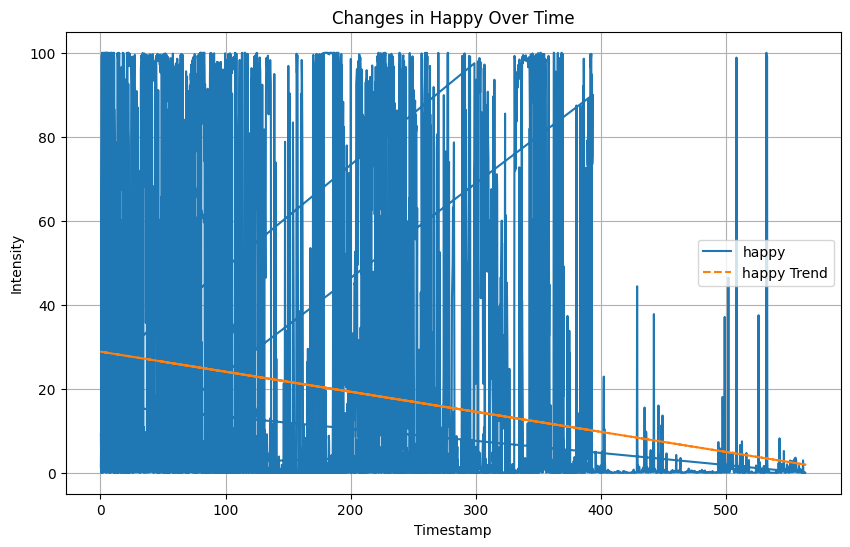

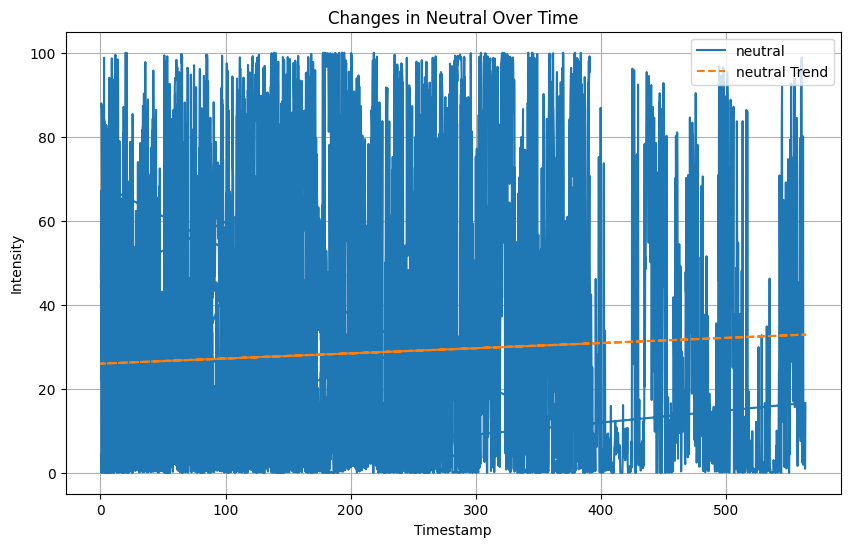

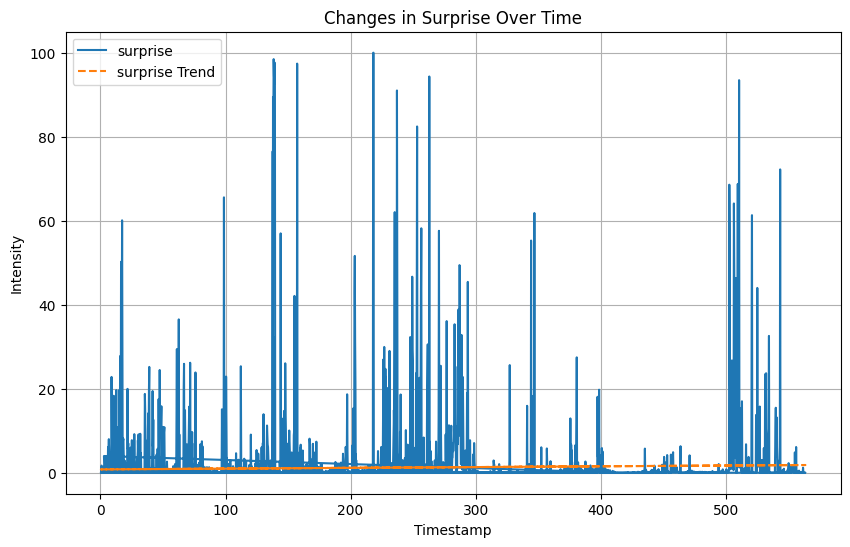

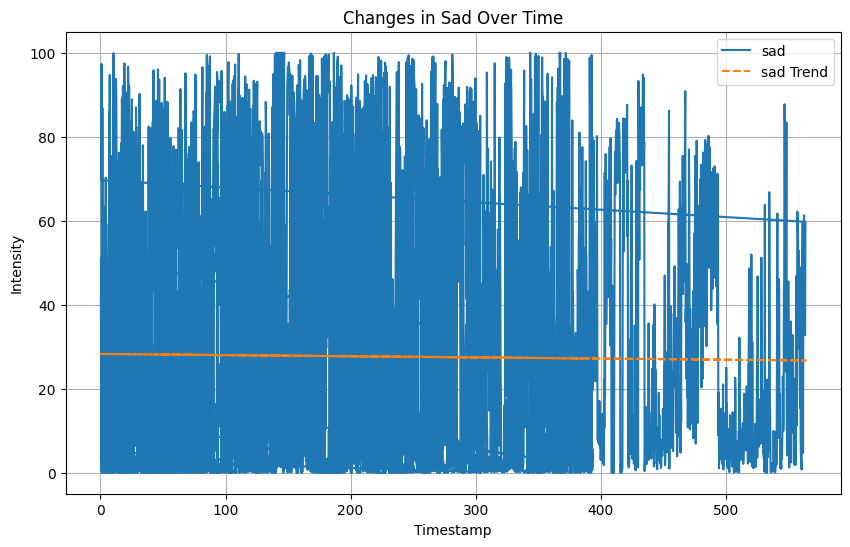

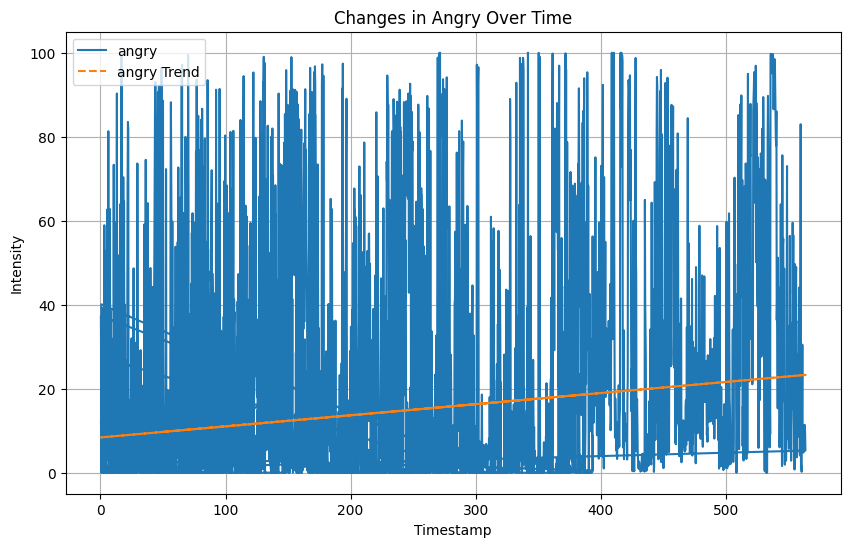

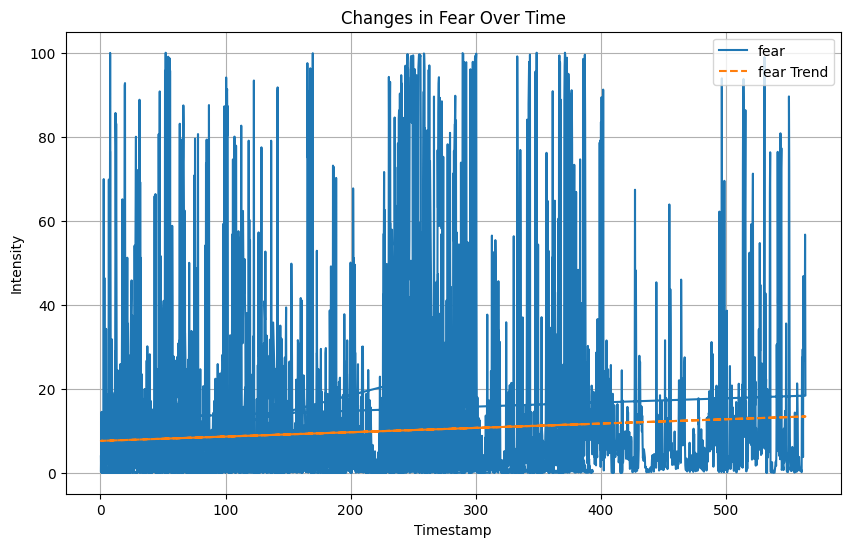

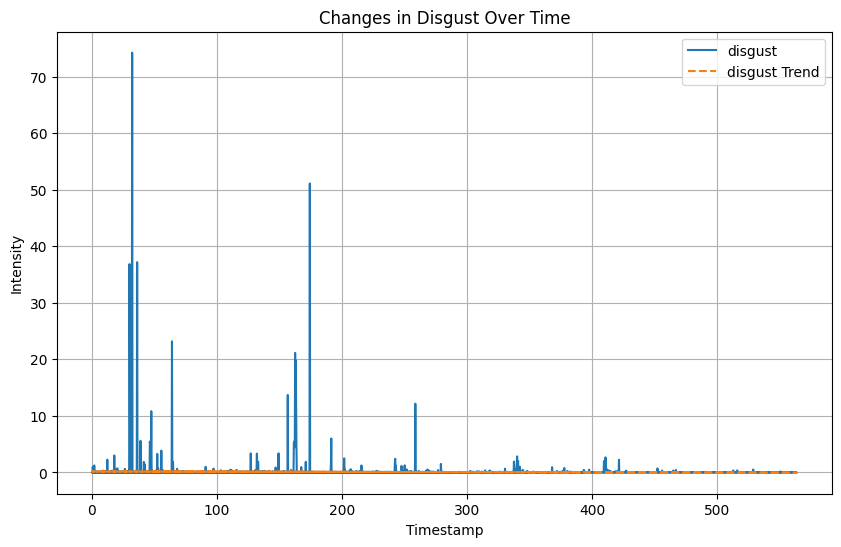

Basic statistics about each of emotions emotion:
               mean        std           min           25%        50%  \
happy     18.890136  34.234551  1.260000e-16  7.326624e-02   0.578365   
neutral   28.522372  31.908062  1.180000e-15  1.955825e+00  13.118398   
surprise   1.175179   6.242611  3.490000e-28  2.599275e-04   0.017194   
sad       27.708511  30.535694  3.850000e-14  1.618353e+00  13.105272   
angry     13.895980  22.522503  4.230000e-16  3.255870e-02   3.564140   
fear       9.724966  18.306517  1.630000e-18  3.477501e-01   2.762395   
disgust    0.082857   1.431640  1.230000e-34  7.615000e-07   0.000066   

                75%         max  
happy     12.822711  100.000000  
neutral   51.273704   99.999535  
surprise   0.203538   99.998069  
sad       51.056796   99.999809  
angry     16.128256  100.000000  
fear       9.622689  100.000000  
disgust    0.002575   74.243003  

Relation of each emotion to others:
happy       0.188901
neutral     0.285224
surprise    0.0

In [381]:
# Define the file path
third = r'3.csv'

# Attempt to read the CSV file, allowing for irregular rows
df3 = pd.read_csv(third, on_bad_lines='skip', delimiter=';')
df3.fillna('', inplace=True)
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean3 = df3.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean3[numeric_columns] = df_clean3[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean3[numeric_columns] = df_clean3[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean3[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean3 = df_clean3.drop('timestamp', axis=1)
stats = df_clean3.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

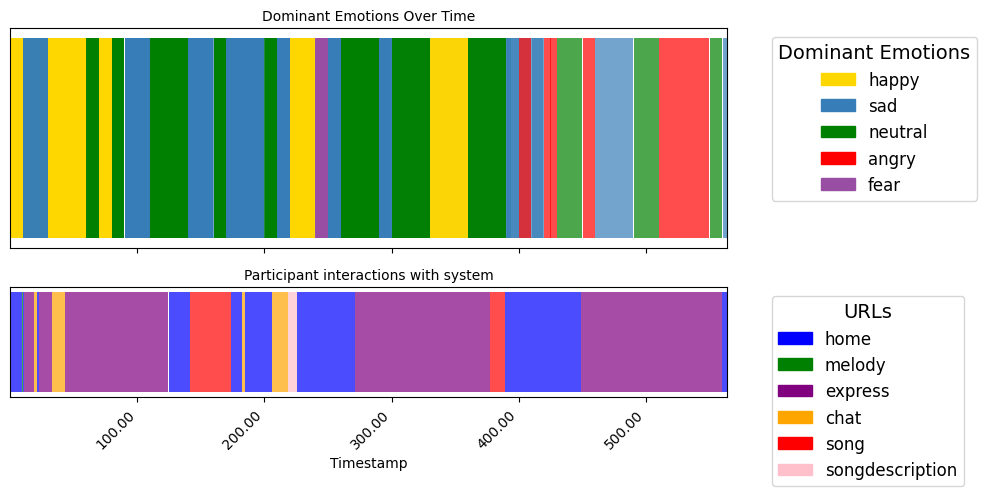

In [382]:
df3.fillna('', inplace=True)

df_clean3_url = df3.dropna(subset=['url'])

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean3_url[numeric_columns] = df_clean3_url[numeric_columns].replace(',', '.', regex=True)

df_clean3_url['url'] = df_clean3_url['url'].str.replace('/', '')

df_clean3_url['timestamp'] = pd.to_numeric(df_clean3_url['timestamp'], errors='coerce')

df_clean3_url = df_clean3_url.sort_values('timestamp').reset_index(drop=True)

last_valid_timestamp = 0
for i in range(len(df_clean3_url)):
    if df_clean3_url.loc[i, 'timestamp'] < last_valid_timestamp:
        df_clean3_url.loc[i, 'timestamp'] += last_valid_timestamp
    last_valid_timestamp = df_clean3_url.loc[i, 'timestamp']

df_clean3_url['url_change'] = (df_clean3_url['url'] != df_clean3_url['url'].shift()).cumsum()

df_grouped = df_clean3_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean3_url['timestamp'].max()

df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

df_grouped = df_grouped[df_grouped['url'] != '']

unique_urls = df_grouped['url'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_urls)))
color_map = {url: colors[i] for i, url in enumerate(unique_urls)}

df_clean3_emotion = df3.copy()

df_clean3_emotion[numeric_columns] = df_clean3_emotion[numeric_columns].replace(',', '.', regex=True)

df_clean3_emotion[numeric_columns] = df_clean3_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')

df_clean3_emotion['interval'] = (df_clean3_emotion['timestamp'] // 10) * 10

dominant_emotions = df_clean3_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

df_clean3_emotion['dominant_emotion'] = df_clean3_emotion['interval'].map(dominant_emotions)
df_clean3_emotion['emotion_change'] = (df_clean3_emotion['dominant_emotion'] != df_clean3_emotion['dominant_emotion'].shift()).cumsum()

df_emotion_grouped = df_clean3_emotion.groupby('emotion_change').agg({
    'timestamp': ['first', 'last'],
    'dominant_emotion': 'first'
}).reset_index()

df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

palette = sns.color_palette("Set1", 10)

emotion_colors = {
    'happy': 'gold',     # zielony
    'neutral': 'green',   # pomarańczowy
    'surprise': palette[2],  # fioletowy
    'sad': palette[1],       # niebieski
    'angry': 'red',     # czerwony
    'fear': palette[3],      # brązowy
    'disgust': 'yellow'    # różowy
}
# Tworzenie mapy kolorów dla emocji
unique_emotions = df_emotion_grouped['dominant_emotion'].unique()
emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

for i, row in df_emotion_grouped.iterrows():
    duration = row['end_timestamp'] - row['start_timestamp']
    ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
             color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

emotion_handles = [plt.Rectangle((0,0),1,1, color=emotion_color_map[emotion]) for emotion in unique_emotions]
ax1.legend(emotion_handles, unique_emotions, title="Dominant Emotions", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))
ax1.set_yticks([])
ax1.set_title('Dominant Emotions Over Time', fontsize=10)

url_colors = {
    'home': 'blue',
    'melody': 'green',
    'chat': 'orange',
    'express': 'purple',
    'song': 'red',
    'songdescription': 'pink',
    'colour': palette[1],
    'talk': 'brown',
}

# Tworzenie mapy kolorów dla URL-i
unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

# Wykres interakcji z systemem
for i, row in df_grouped.iterrows():
    duration = row['end_timestamp'] - row['start_timestamp']
    ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
             color=url_color_map[row['url']], alpha=0.7)

# Dodanie legendy dla URL-i
handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))
plt.xticks(rotation=45, ha='right')

ax2.set_yticks([])

ax2.set_xlabel('Timestamp', fontsize=10)
ax2.set_title('Participant interactions with system', fontsize=10)

# Dostosuj układ
plt.tight_layout()
plt.show()

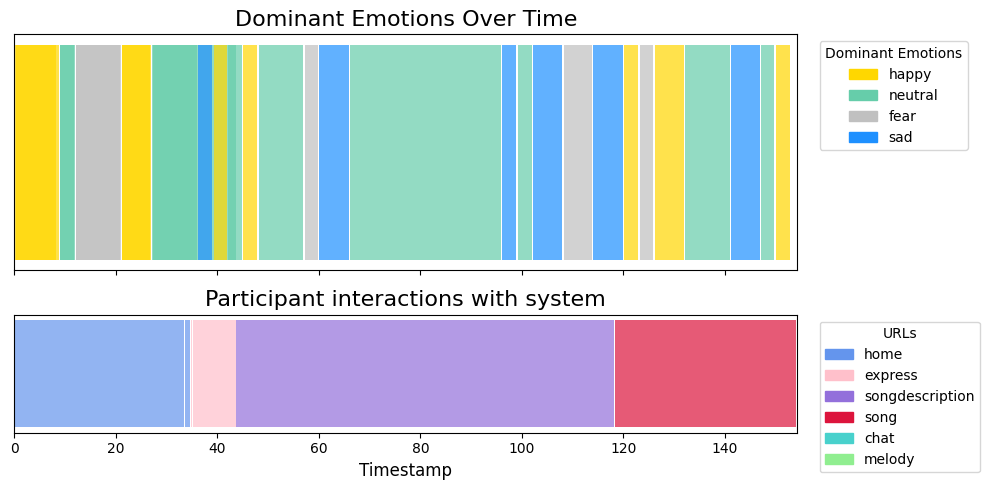

Dominant Emotion for Segment 1: neutral


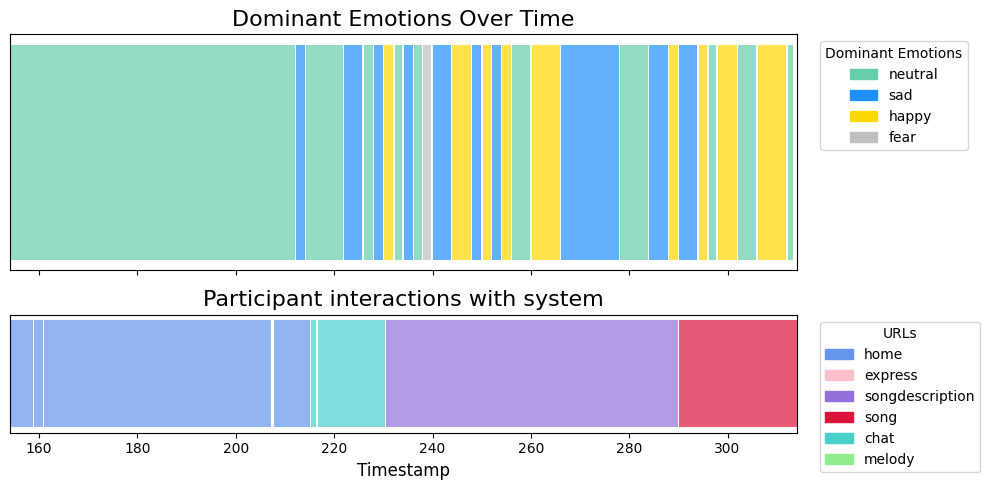

Dominant Emotion for Segment 2: neutral


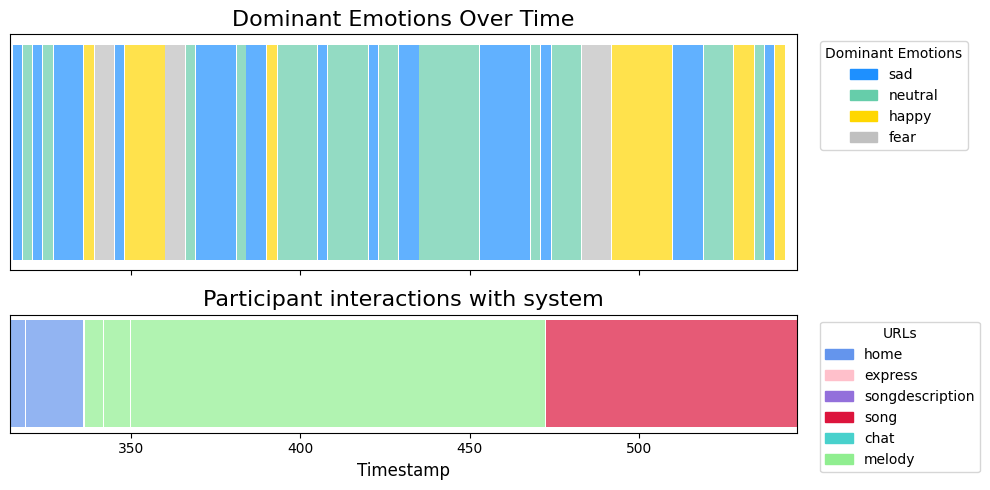

Dominant Emotion for Segment 3: sad


In [5]:
four = r'4.csv'

df_clean4 = pd.DataFrame(pd.read_csv(four, on_bad_lines='skip', delimiter=';'))
df_clean4.fillna('', inplace=True)

df_clean4.fillna('', inplace=True)

df_clean4_url = df_clean4.dropna(subset=['url'])

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean4_url[numeric_columns] = df_clean4_url[numeric_columns].replace(',', '.', regex=True)

df_clean4_url['url'] = df_clean4_url['url'].str.replace('/', '')

df_clean4_url['timestamp'] = pd.to_numeric(df_clean4_url['timestamp'], errors='coerce')

df_clean4_url['url_change'] = (df_clean4_url['url'] != df_clean4_url['url'].shift()).cumsum()

df_grouped = df_clean4_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean4_url['timestamp'].max()

df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

df_grouped = df_grouped[df_grouped['url'] != '']

url_colors = {
    'home': 'cornflowerblue',
    'melody': 'lightgreen',
    'chat': 'mediumturquoise',
    'express': 'pink',
    'song': 'crimson',
    'songdescription': 'mediumpurple',
    'colour': 'beige',
    'talk': 'coral',
}

unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

df_clean4_emotion = df_clean4.copy()

df_clean4_emotion[numeric_columns] = df_clean4_emotion[numeric_columns].replace(',', '.', regex=True)

df_clean4_emotion[numeric_columns] = df_clean4_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')

emotion_colors = {
    'happy': 'gold',
    'neutral': 'mediumaquamarine',
    'surprise': 'mediumpurple',
    'sad': 'dodgerblue',
    'angry': 'crimson',
    'fear': 'silver',
    'disgust': 'darkorange'
}

start_urls = ['START1', 'START2', 'START3']
end_urls = ['END1', 'END2', 'END3']

segments = []
current_start = None
for idx, row in df_clean4_url.iterrows():
    if row['interaction_type'] in start_urls:
        if current_start is not None:
            segments.append((current_start, idx - 1))
        current_start = idx
    elif row['interaction_type'] in end_urls and current_start is not None:
        segments.append((current_start, idx + 2))
        current_start = None

if current_start is not None:
    segments.append((current_start, len(df_clean4_url) - 1))

dfs = [df_clean4_url.iloc[start:end + 1].reset_index(drop=True) for start, end in segments]

for segment_number, df_segment in enumerate(dfs, 1):
    start_time = df_segment['timestamp'].iloc[0]
    end_time = df_segment['timestamp'].iloc[-1]
    
    if segment_number == 1:
        interval = 3
    elif segment_number == 2:
        interval = 2
    elif segment_number == 3:
        interval = 3 
    
    df_clean4_emotion['interval'] = (df_clean4_emotion['timestamp'] // interval) * interval

    dominant_emotions = df_clean4_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

    df_clean4_emotion['dominant_emotion'] = df_clean4_emotion['interval'].map(dominant_emotions)
    df_clean4_emotion['emotion_change'] = (df_clean4_emotion['dominant_emotion'] != df_clean4_emotion['dominant_emotion'].shift()).cumsum()

    df_emotion_grouped = df_clean4_emotion.groupby('emotion_change').agg({
        'timestamp': ['first', 'last'],
        'dominant_emotion': 'first'
    }).reset_index()

    df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

    df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

    df_emotion_grouped = df_emotion_grouped.dropna(subset=['dominant_emotion'])
    
    df_emotion_segment = df_emotion_grouped[
        (df_emotion_grouped['start_timestamp'] >= start_time) & 
        (df_emotion_grouped['end_timestamp'] <= end_time)
    ]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

    unique_emotions = df_emotion_segment['dominant_emotion'].unique()
    emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions if emotion in emotion_colors}

    for _, row in df_emotion_segment.iterrows():
        duration = row['end_timestamp'] - row['start_timestamp']
        if row['dominant_emotion'] in emotion_color_map:
            ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

    emotion_handles = [plt.Rectangle((0,0),2,2, color=emotion_color_map[emotion]) for emotion in unique_emotions if emotion in emotion_color_map]
    ax1.legend(emotion_handles, [emotion for emotion in unique_emotions if emotion in emotion_color_map], title="Dominant Emotions", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax1.set_yticks([])
    ax1.set_title(f'Dominant Emotions Over Time', fontsize=16)

    for i, row in df_grouped.iterrows():
        if row['start_timestamp'] >= start_time and row['end_timestamp'] <= end_time:
            duration = row['end_timestamp'] - row['start_timestamp']
            ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=url_color_map[row['url']], alpha=0.7)

    handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
    ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax2.set_yticks([])
    ax2.set_xlabel('Timestamp', fontsize=12)
    ax2.set_title(f'Participant interactions with system', fontsize=16)

    ax1.set_xlim(start_time, end_time)
    ax2.set_xlim(start_time, end_time)

    plt.tight_layout()
    plt.show()
    dominant_emotion = df_emotion_segment['dominant_emotion'].mode()[0]
    print(f"Dominant Emotion for Segment {segment_number}: {dominant_emotion}")

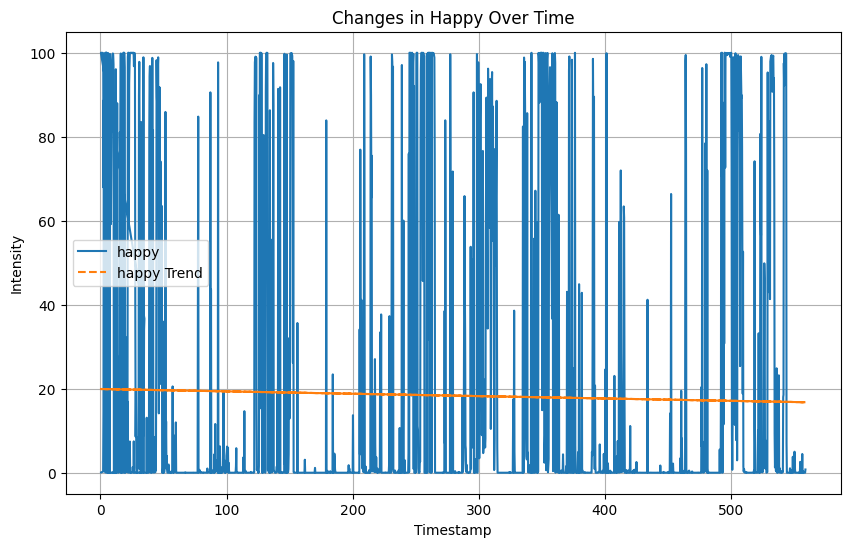

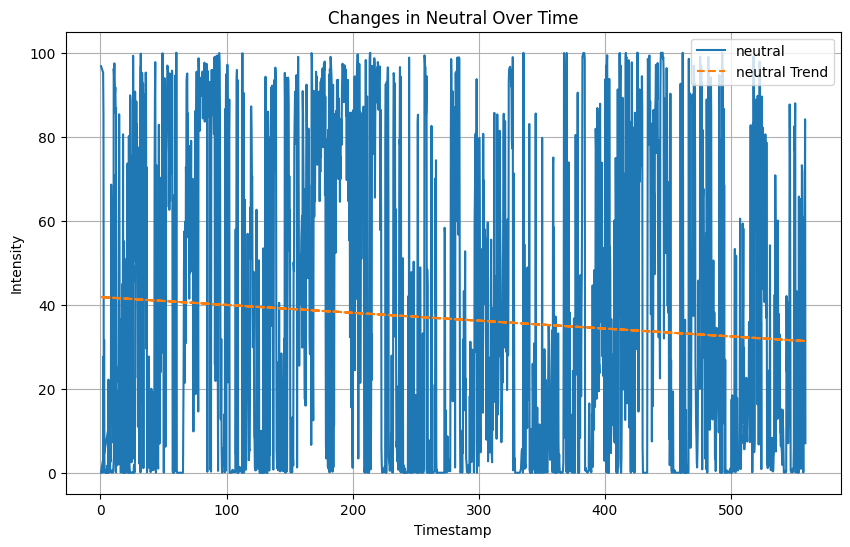

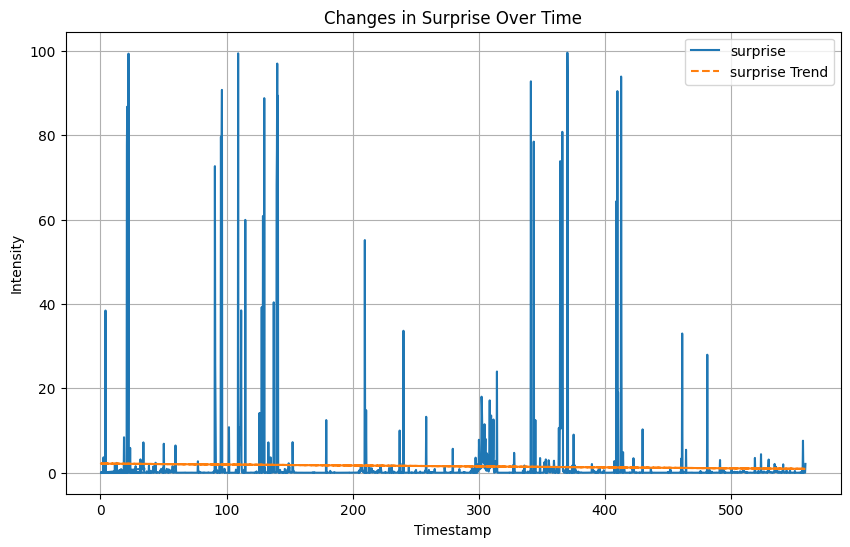

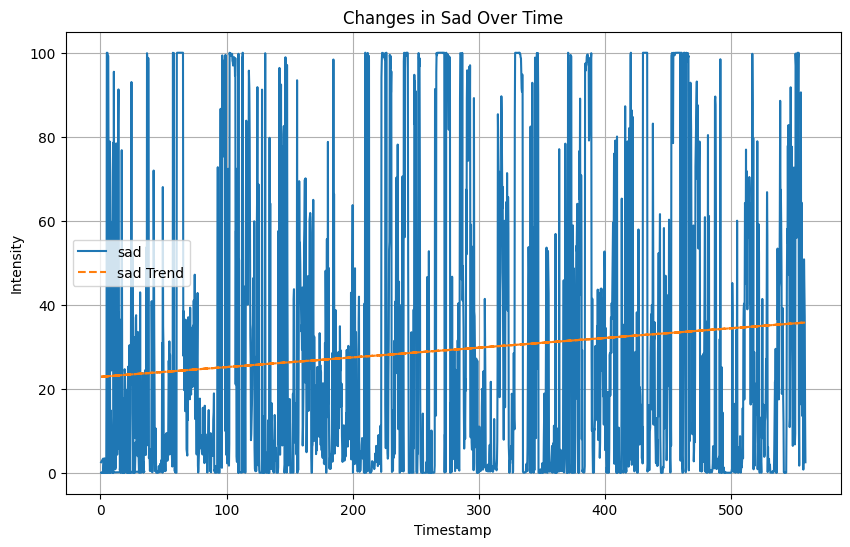

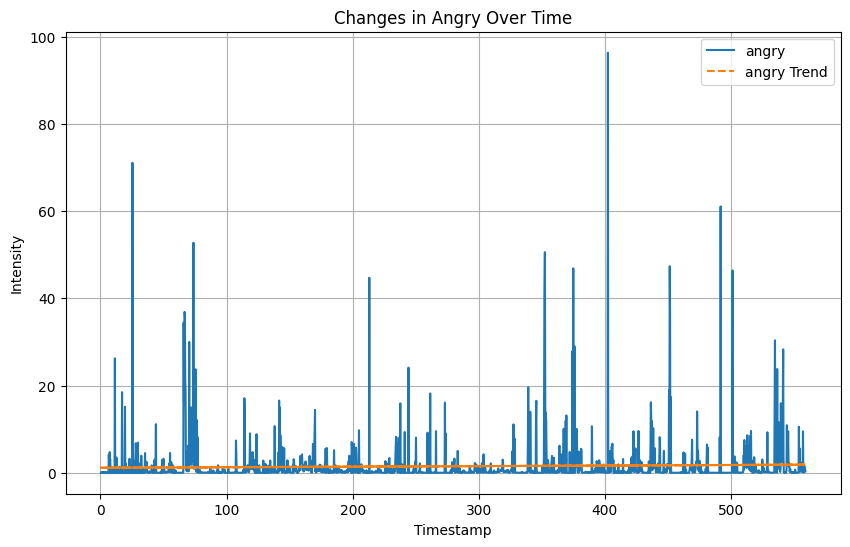

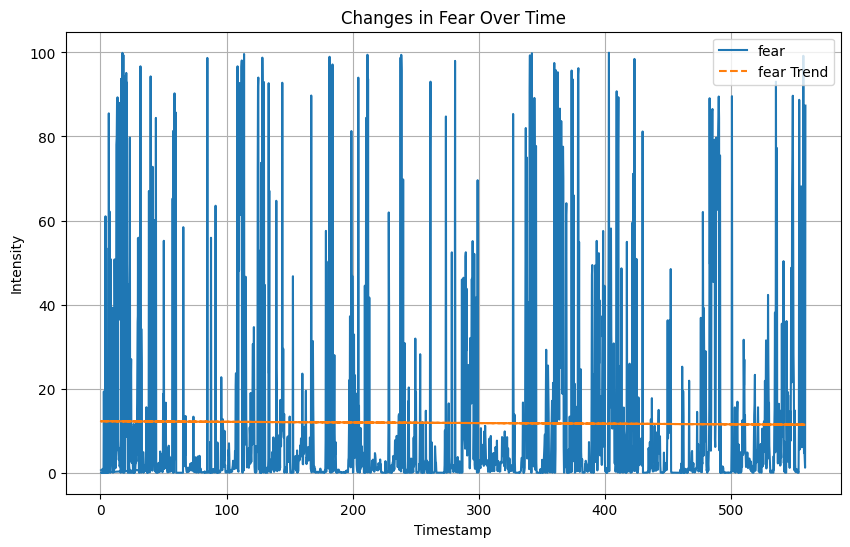

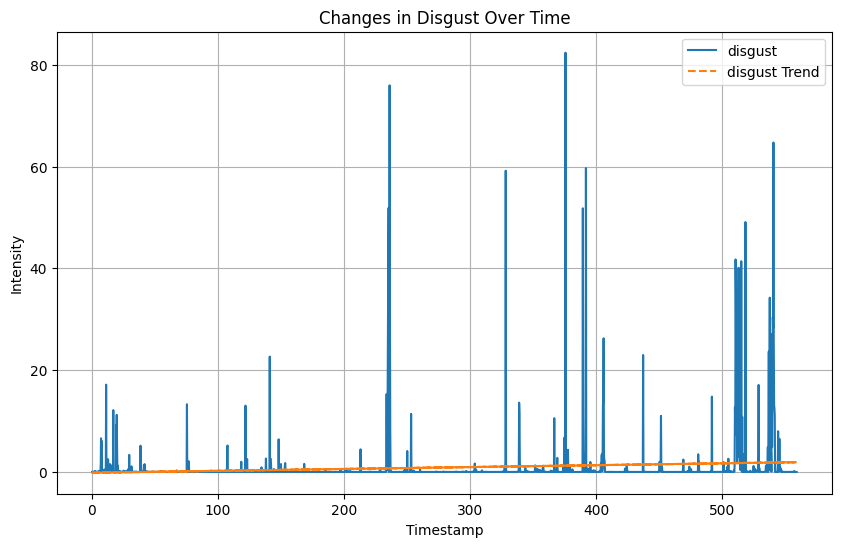

Basic statistics about each of emotions emotion:
               mean        std           min           25%        50%  \
happy     18.442449  34.715212  3.060000e-12  5.075905e-04   0.041099   
neutral   36.865038  36.590245  2.890000e-07  8.129570e-01  24.145224   
surprise   1.572977   9.283449  5.550000e-24  7.622500e-05   0.004848   
sad       28.957120  34.654053  1.150000e-09  1.150787e+00  12.153165   
angry      1.471316   5.080071  1.690000e-15  3.578338e-04   0.076779   
fear      11.867167  22.747672  9.690000e-11  1.339083e-01   1.690828   
disgust    0.823935   5.022389  1.010000e-27  4.062500e-09   0.000073   

                75%        max  
happy     10.440029  99.999946  
neutral   74.145874  99.999863  
surprise   0.089329  99.577719  
sad       47.585152  99.999976  
angry      0.770366  96.333640  
fear       9.808147  99.922448  
disgust    0.010081  82.377622  

Relation of each emotion to others:
happy       0.184424
neutral     0.368650
surprise    0.015730
sa

In [384]:
# Define the file path
four = r'4.csv'

# Attempt to read the CSV file, allowing for irregular rows
df4 = pd.read_csv(four, on_bad_lines='skip', delimiter=';')
df4.fillna('', inplace=True)
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean4 = df4.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean4[numeric_columns] = df_clean4[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean4[numeric_columns] = df_clean4[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean4[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean5 = df_clean4.drop('timestamp', axis=1)
stats = df_clean5.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

C:\Users\adamm\AppData\Local\Temp\ipykernel_8308\216559288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df5.fillna('', inplace=True)


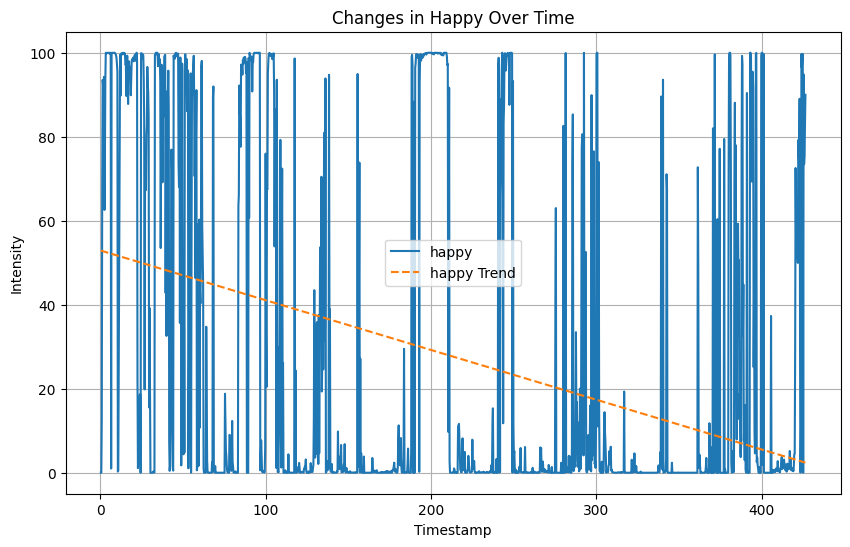

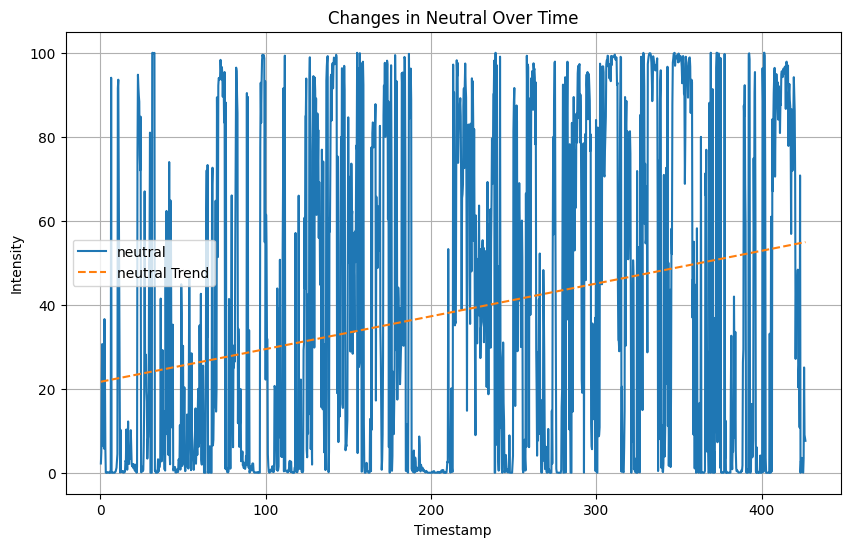

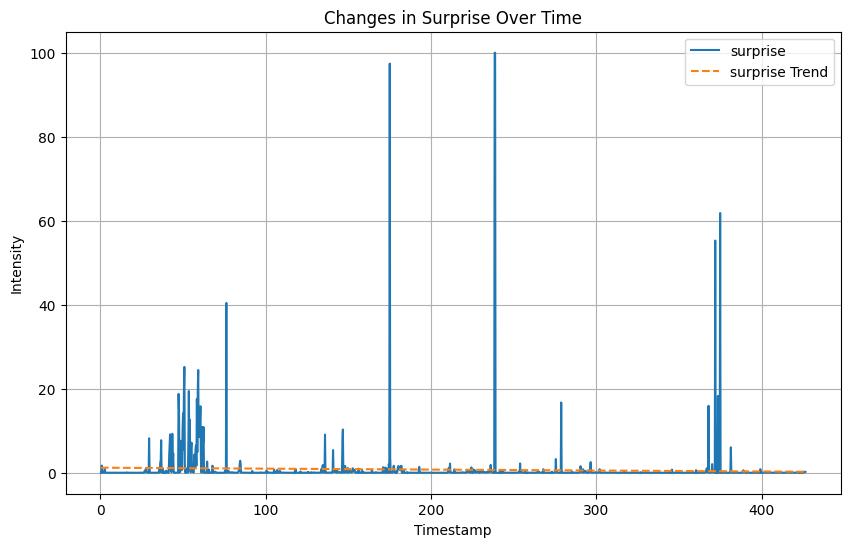

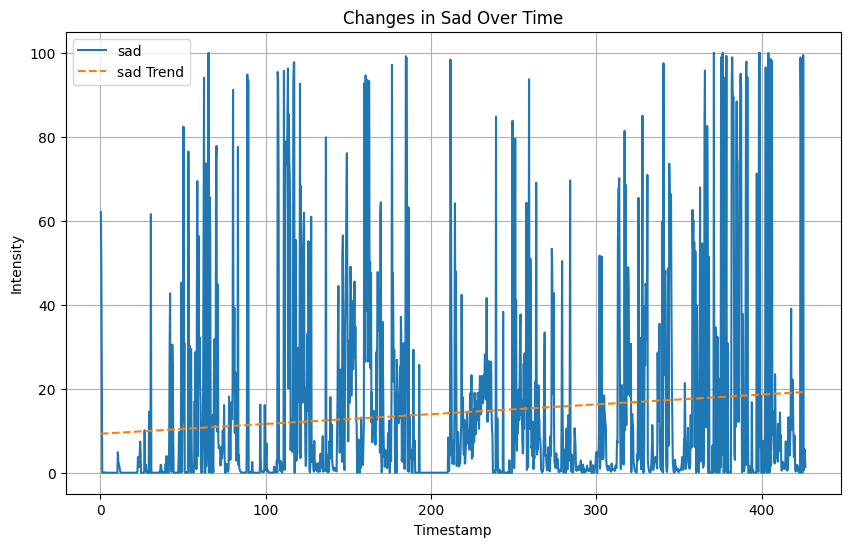

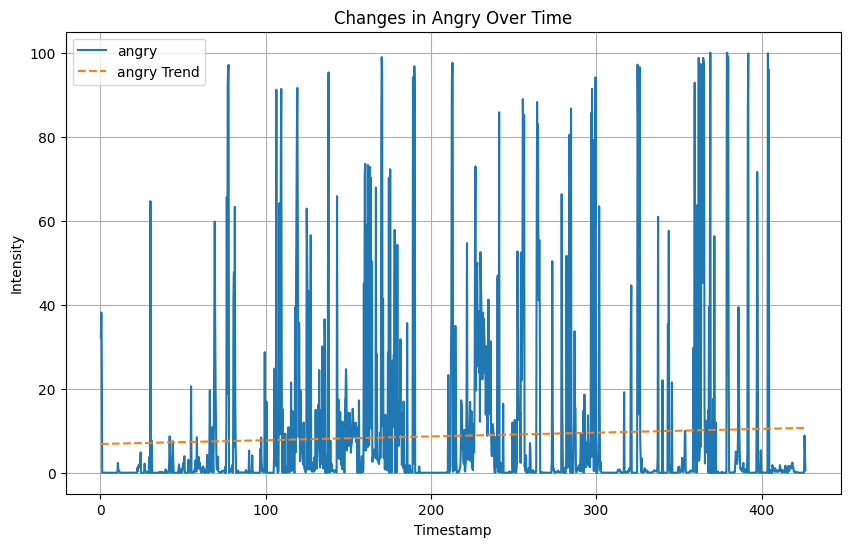

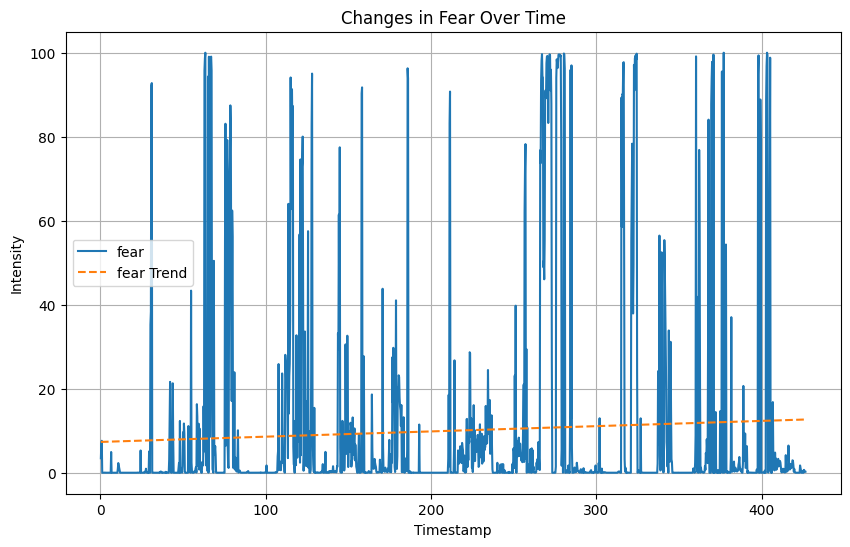

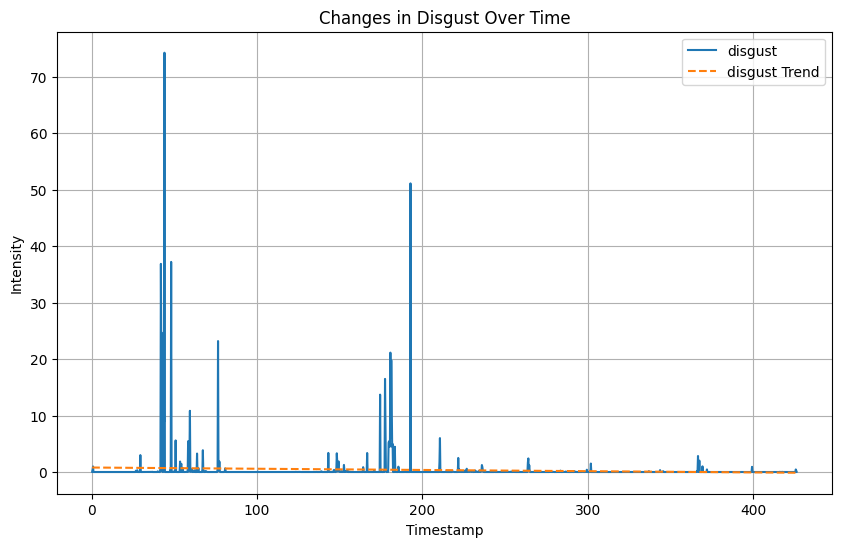

Basic statistics about each of emotions emotion:
               mean        std           min           25%           50%  \
happy     27.615227  40.754733  1.260000e-16  1.150129e-02  7.552194e-01   
neutral   38.306875  38.802886  1.180000e-15  7.428488e-01  2.253783e+01   
surprise   0.717750   5.309800  3.490000e-28  1.817500e-07  9.673150e-04   
sad       14.257474  23.733525  3.850000e-14  1.241786e-01  2.783525e+00   
angry      8.764909  20.266427  4.230000e-16  3.221561e-03  3.143167e-01   
fear      10.005425  24.227038  1.630000e-18  6.913510e-04  1.560870e-01   
disgust    0.332340   3.029415  1.230000e-34  5.555000e-12  1.310000e-07   

                75%         max  
happy     69.452941  100.000000  
neutral   81.054884   99.999297  
surprise   0.048310   99.998069  
sad       16.744649   99.997330  
angry      5.010148  100.000000  
fear       4.464417  100.000000  
disgust    0.000717   74.243003  

Relation of each emotion to others:
happy       0.276152
neutral     

In [385]:
# Define the file path
five = r'5.csv'

# Attempt to read the CSV file, allowing for irregular rows
df5 = pd.read_csv(five, on_bad_lines='skip', delimiter=';')
df5.fillna('', inplace=True)
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean5 = df5.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean5[numeric_columns] = df_clean5[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean5[numeric_columns] = df_clean5[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean5[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean5 = df_clean5.drop('timestamp', axis=1)
stats = df_clean5.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

C:\Users\adamm\AppData\Local\Temp\ipykernel_8308\1034217941.py:48: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  dominant_emotions = df_clean5_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)


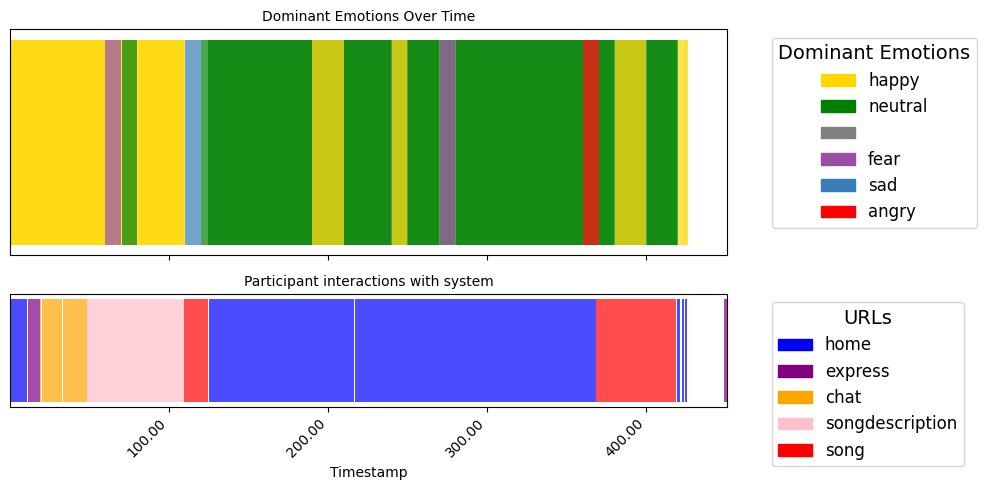

In [386]:
df5.fillna('', inplace=True)

df_clean5_url = df5.dropna(subset=['url'])

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean5_url[numeric_columns] = df_clean5_url[numeric_columns].replace(',', '.', regex=True)

df_clean5_url['url'] = df_clean5_url['url'].str.replace('/', '')

df_clean5_url['timestamp'] = pd.to_numeric(df_clean5_url['timestamp'], errors='coerce')

df_clean5_url = df_clean5_url.sort_values('timestamp').reset_index(drop=True)

last_valid_timestamp = 0
for i in range(len(df_clean5_url)):
    if df_clean5_url.loc[i, 'timestamp'] < last_valid_timestamp:
        df_clean5_url.loc[i, 'timestamp'] += last_valid_timestamp
    last_valid_timestamp = df_clean5_url.loc[i, 'timestamp']

df_clean5_url['url_change'] = (df_clean5_url['url'] != df_clean5_url['url'].shift()).cumsum()

df_grouped = df_clean5_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean5_url['timestamp'].max()

df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

df_grouped = df_grouped[df_grouped['url'] != '']

unique_urls = df_grouped['url'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_urls)))
color_map = {url: colors[i] for i, url in enumerate(unique_urls)}

df_clean5_emotion = df5.copy()

df_clean5_emotion[numeric_columns] = df_clean5_emotion[numeric_columns].replace(',', '.', regex=True)

df_clean5_emotion[numeric_columns] = df_clean5_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')

df_clean5_emotion['interval'] = (df_clean5_emotion['timestamp'] // 10) * 10

dominant_emotions = df_clean5_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

df_clean5_emotion['dominant_emotion'] = df_clean5_emotion['interval'].map(dominant_emotions)
df_clean5_emotion['emotion_change'] = (df_clean5_emotion['dominant_emotion'] != df_clean5_emotion['dominant_emotion'].shift()).cumsum()

df_emotion_grouped = df_clean5_emotion.groupby('emotion_change').agg({
    'timestamp': ['first', 'last'],
    'dominant_emotion': 'first'
}).reset_index()

df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

emotion_colors = {
    'happy': 'gold',     # zielony
    'neutral': 'green',   # pomarańczowy
    'surprise': palette[2],  # fioletowy
    'sad': palette[1],       # niebieski
    'angry': 'red',     # czerwony
    'fear': palette[3],      # brązowy
    'disgust': 'yellow'    # różowy
}
# Tworzenie mapy kolorów dla emocji
unique_emotions = df_emotion_grouped['dominant_emotion'].unique()
emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

for i, row in df_emotion_grouped.iterrows():
    duration = row['end_timestamp'] - row['start_timestamp']
    ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
             color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

emotion_handles = [plt.Rectangle((0,0),1,1, color=emotion_color_map[emotion]) for emotion in unique_emotions]
ax1.legend(emotion_handles, unique_emotions, title="Dominant Emotions", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))
ax1.set_yticks([])
ax1.set_title('Dominant Emotions Over Time', fontsize=10)
url_colors = {
    'home': 'blue',
    'melody': 'green',
    'chat': 'orange',
    'express': 'purple',
    'song': 'red',
    'songdescription': 'pink',
    'colour': palette[1],
    'talk': 'brown',
}

# Tworzenie mapy kolorów dla URL-i
unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

for i, row in df_grouped.iterrows():
    duration = row['end_timestamp'] - row['start_timestamp']
    ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
             color=url_color_map[row['url']], alpha=0.7)

handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))
plt.xticks(rotation=45, ha='right')

ax2.set_yticks([])

ax2.set_xlabel('Timestamp', fontsize=10)
ax2.set_title('Participant interactions with system', fontsize=10)

plt.tight_layout()
plt.show()

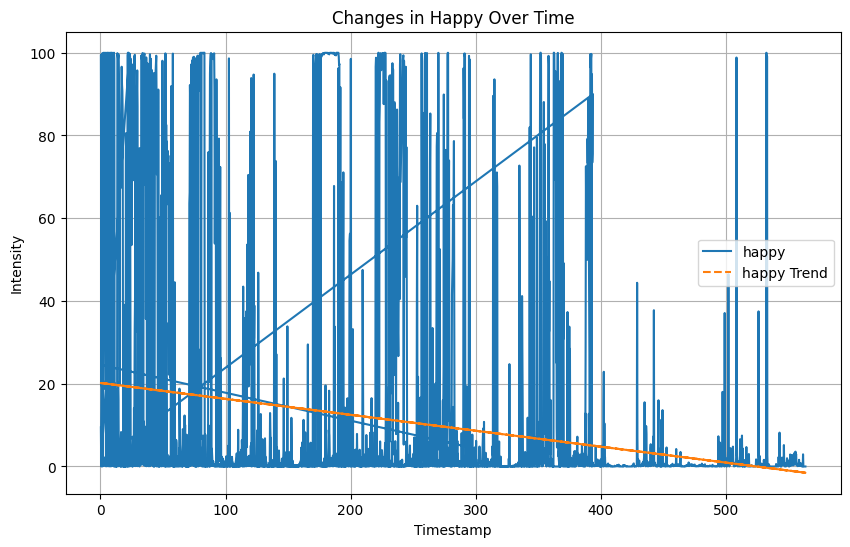

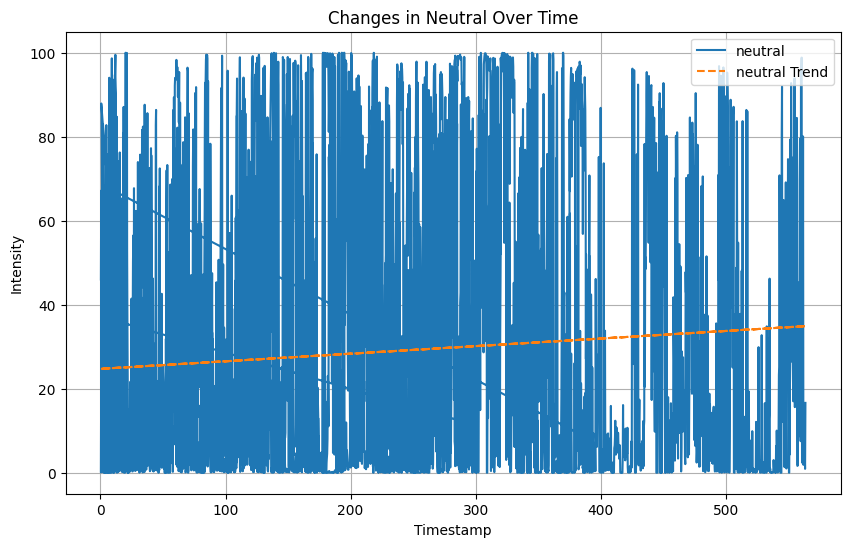

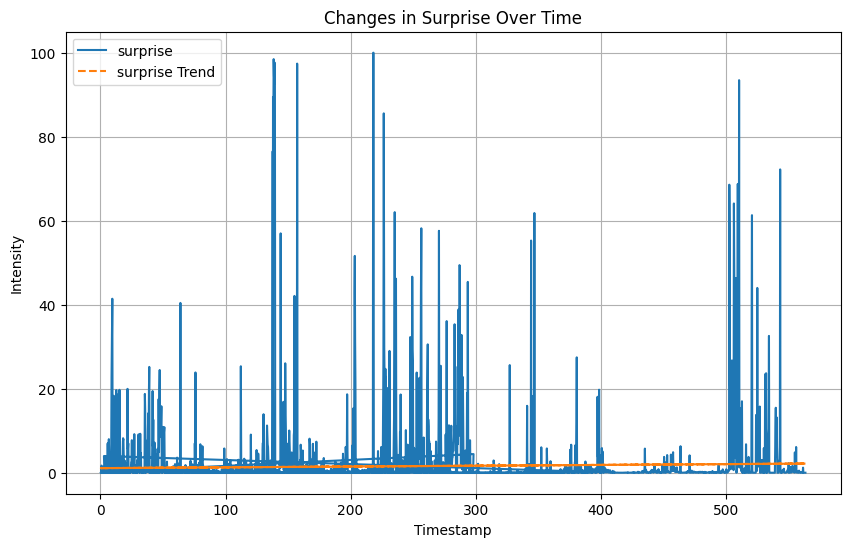

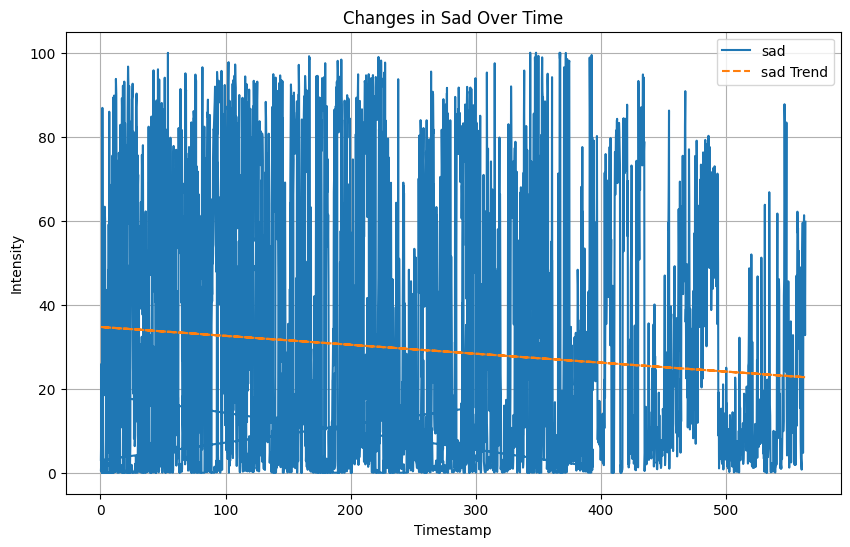

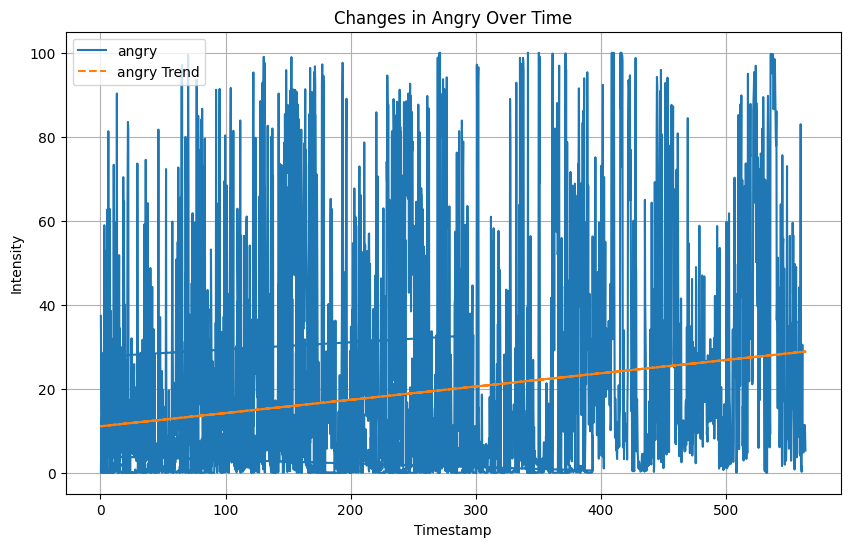

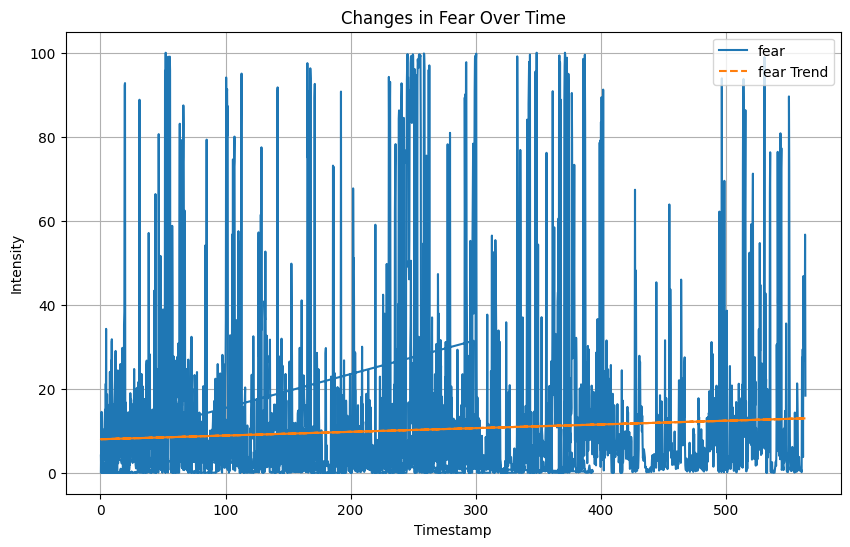

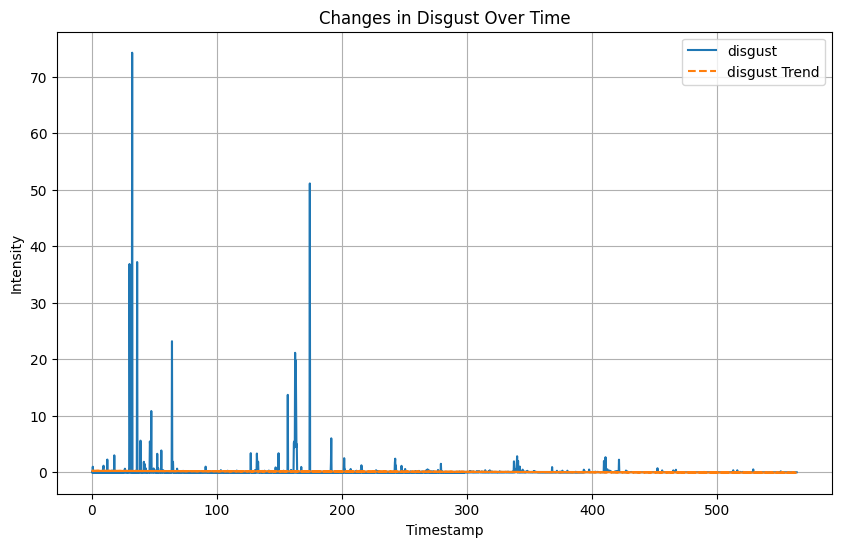

Basic statistics about each of emotions emotion:
               mean        std           min       25%        50%        75%  \
happy     11.609984  28.029792  1.260000e-16  0.054699   0.346957   2.359520   
neutral   28.753185  32.778088  1.180000e-15  1.821848  12.305238  51.644057   
surprise   1.520610   6.993375  3.490000e-28  0.000847   0.060088   0.410728   
sad       29.972865  30.373374  3.850000e-14  3.036085  16.807144  55.679613   
angry     18.090191  24.777164  4.230000e-16  1.020498   6.995298  23.942876   
fear       9.937370  18.214041  1.630000e-18  0.531241   3.687739  10.218345   
disgust    0.115796   1.712700  1.230000e-34  0.000002   0.000268   0.006464   

                 max  
happy     100.000000  
neutral    99.999535  
surprise   99.998069  
sad        99.997330  
angry     100.000000  
fear      100.000000  
disgust    74.243003  

Relation of each emotion to others:
happy       0.116100
neutral     0.287532
surprise    0.015206
sad         0.299729
angry

In [387]:
# Define the file path
six = r'6.csv'

# Attempt to read the CSV file, allowing for irregular rows
df6 = pd.read_csv(six, on_bad_lines='skip', delimiter=';')
df6.fillna('', inplace=True)
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean6 = df6.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean6[numeric_columns] = df_clean6[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean6[numeric_columns] = df_clean6[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean6[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean6 = df_clean6.drop('timestamp', axis=1)
stats = df_clean6.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

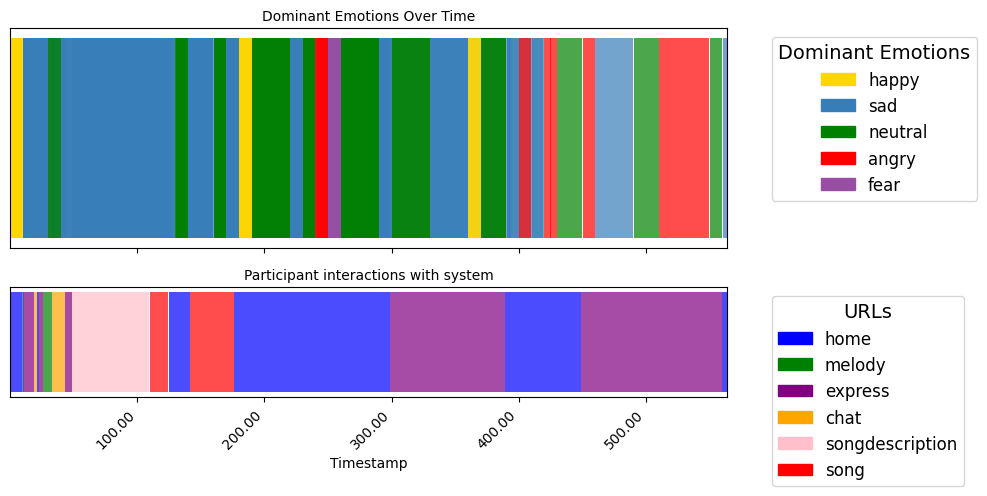

In [388]:
df6.fillna('', inplace=True)

df_clean6_url = df6.dropna(subset=['url'])

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean6_url[numeric_columns] = df_clean6_url[numeric_columns].replace(',', '.', regex=True)

df_clean6_url['url'] = df_clean6_url['url'].str.replace('/', '')

df_clean6_url['timestamp'] = pd.to_numeric(df_clean6_url['timestamp'], errors='coerce')

df_clean6_url = df_clean6_url.sort_values('timestamp').reset_index(drop=True)

last_valid_timestamp = 0
for i in range(len(df_clean6_url)):
    if df_clean6_url.loc[i, 'timestamp'] < last_valid_timestamp:
        df_clean6_url.loc[i, 'timestamp'] += last_valid_timestamp
    last_valid_timestamp = df_clean6_url.loc[i, 'timestamp']

df_clean6_url['url_change'] = (df_clean6_url['url'] != df_clean6_url['url'].shift()).cumsum()

df_grouped = df_clean6_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean6_url['timestamp'].max()

df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

df_grouped = df_grouped[df_grouped['url'] != '']

unique_urls = df_grouped['url'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_urls)))
color_map = {url: colors[i] for i, url in enumerate(unique_urls)}

df_clean6_emotion = df6.copy()

df_clean6_emotion[numeric_columns] = df_clean6_emotion[numeric_columns].replace(',', '.', regex=True)

df_clean6_emotion[numeric_columns] = df_clean6_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')

df_clean6_emotion['interval'] = (df_clean6_emotion['timestamp'] // 10) * 10

dominant_emotions = df_clean6_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

df_clean6_emotion['dominant_emotion'] = df_clean6_emotion['interval'].map(dominant_emotions)
df_clean6_emotion['emotion_change'] = (df_clean6_emotion['dominant_emotion'] != df_clean6_emotion['dominant_emotion'].shift()).cumsum()

df_emotion_grouped = df_clean6_emotion.groupby('emotion_change').agg({
    'timestamp': ['first', 'last'],
    'dominant_emotion': 'first'
}).reset_index()

df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

emotion_colors = {
    'happy': 'gold',     # zielony
    'neutral': 'green',   # pomarańczowy
    'surprise': palette[2],  # fioletowy
    'sad': palette[1],       # niebieski
    'angry': 'red',     # czerwony
    'fear': palette[3],      # brązowy
    'disgust': 'yellow'    # różowy
}
# Tworzenie mapy kolorów dla emocji
unique_emotions = df_emotion_grouped['dominant_emotion'].unique()
emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

for i, row in df_emotion_grouped.iterrows():
    duration = row['end_timestamp'] - row['start_timestamp']
    ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
             color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

emotion_handles = [plt.Rectangle((0,0),1,1, color=emotion_color_map[emotion]) for emotion in unique_emotions]
ax1.legend(emotion_handles, unique_emotions, title="Dominant Emotions", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))
ax1.set_yticks([])
ax1.set_title('Dominant Emotions Over Time', fontsize=10)

url_colors = {
    'home': 'blue',
    'melody': 'green',
    'chat': 'orange',
    'express': 'purple',
    'song': 'red',
    'songdescription': 'pink',
    'colour': palette[1],
    'talk': 'brown',
}

# Tworzenie mapy kolorów dla URL-i
unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

for i, row in df_grouped.iterrows():
    duration = row['end_timestamp'] - row['start_timestamp']
    ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
             color=url_color_map[row['url']], alpha=0.7)

handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))
plt.xticks(rotation=45, ha='right')

ax2.set_yticks([])

ax2.set_xlabel('Timestamp', fontsize=10)
ax2.set_title('Participant interactions with system', fontsize=10)

plt.tight_layout()
plt.show()


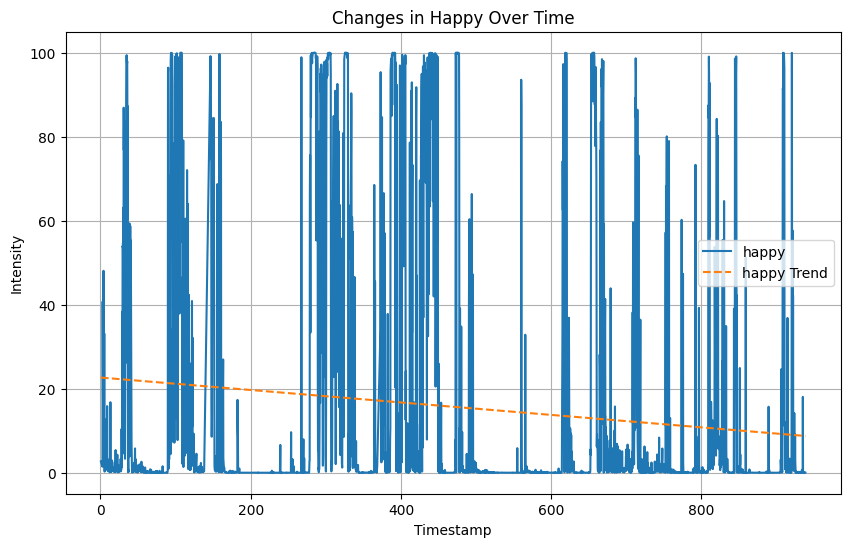

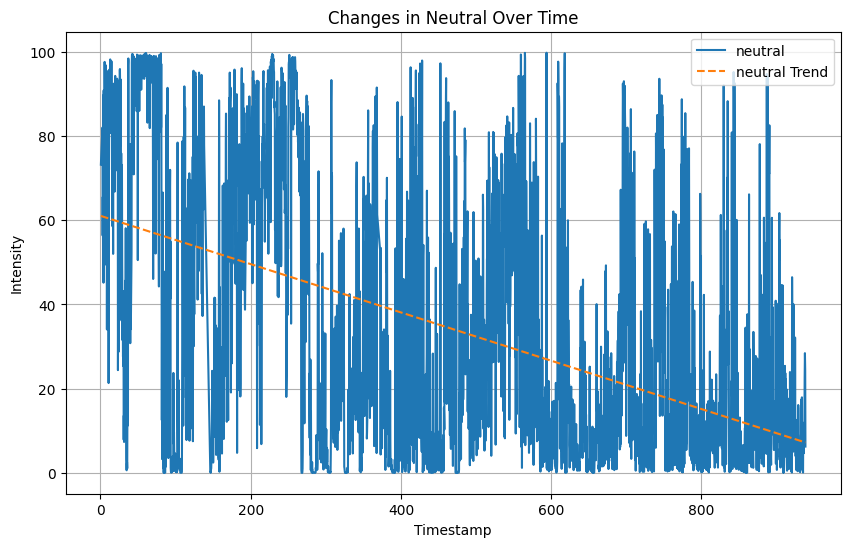

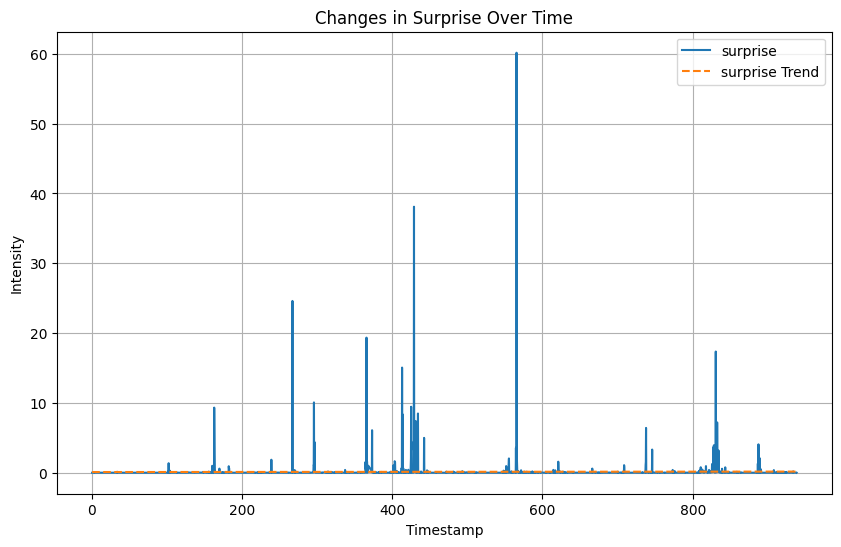

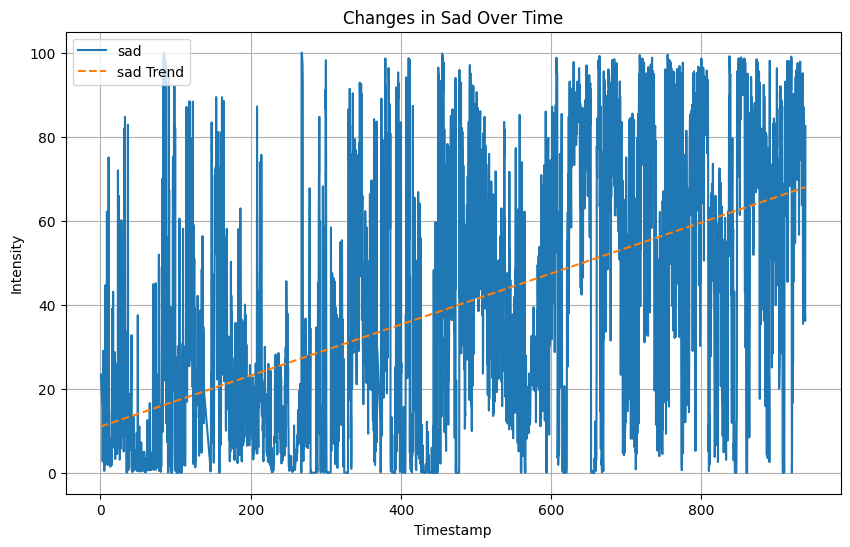

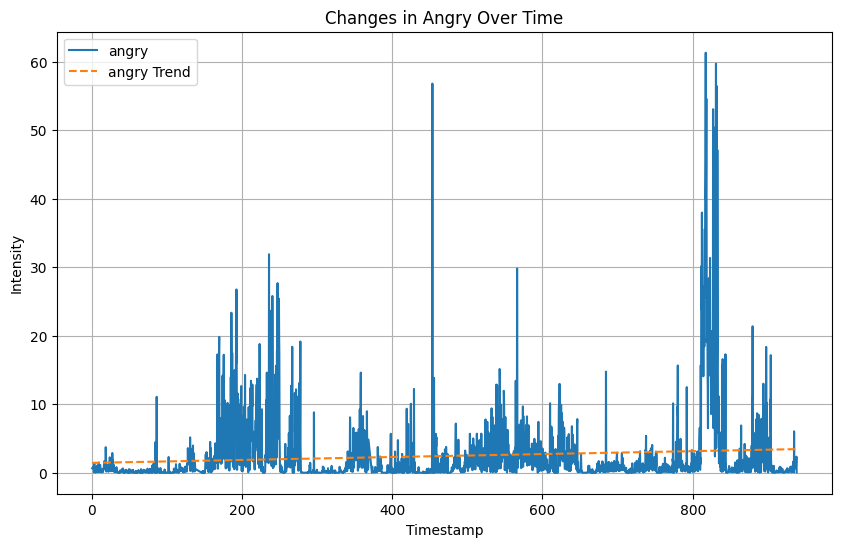

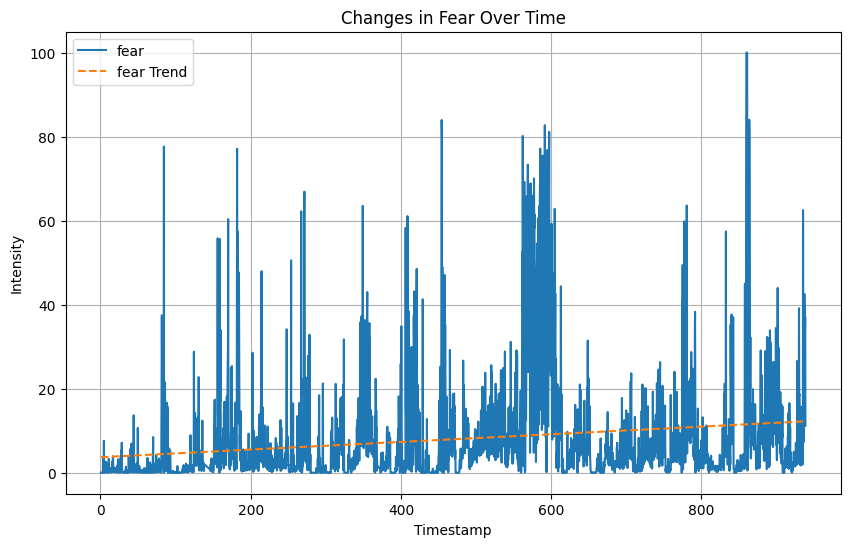

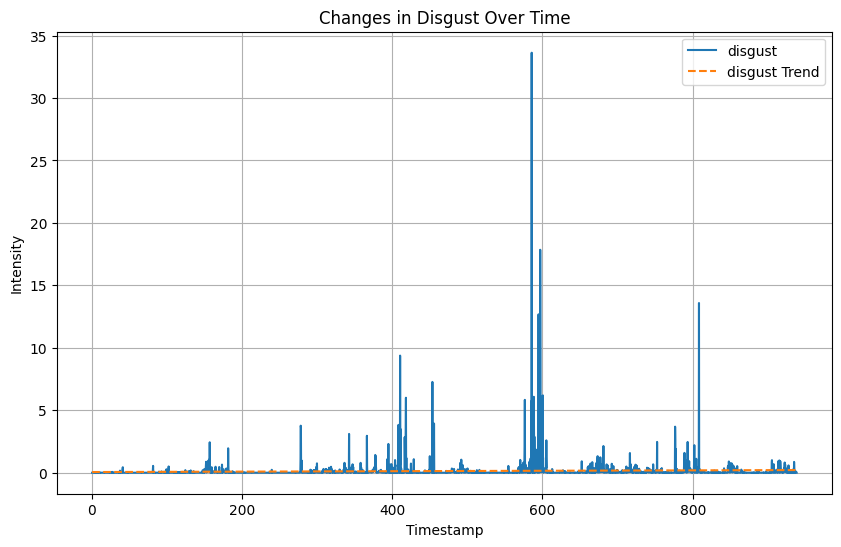

Basic statistics about each of emotions emotion:
               mean        std           min       25%        50%        75%  \
happy     15.666374  31.440384  7.240000e-07  0.017873   0.236430   6.263239   
neutral   33.983137  32.318069  5.980000e-06  5.868581  21.379021  60.495087   
surprise   0.131397   1.496139  2.160000e-14  0.000446   0.002857   0.013347   
sad       39.651641  32.282472  7.090000e-12  9.103223  32.959404  69.298680   
angry      2.445658   5.292496  1.260000e-11  0.127588   0.629302   2.309819   
fear       7.987161  12.839826  2.890000e-17  0.750246   3.400756   9.303386   
disgust    0.134632   0.850395  6.950000e-24  0.000499   0.008138   0.060426   

                max  
happy     99.999988  
neutral   99.857700  
surprise  60.148447  
sad       99.992144  
angry     61.284012  
fear      99.978173  
disgust   33.629517  

Relation of each emotion to others:
happy       0.156664
neutral     0.339831
surprise    0.001314
sad         0.396516
angry       0

In [389]:
# Define the file path
seven = r'7.csv'

# Attempt to read the CSV file, allowing for irregular rows
df7 = pd.read_csv(seven, on_bad_lines='skip', delimiter=';')
df7.fillna('', inplace=True)
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean7 = df7.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean7[numeric_columns] = df_clean7[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean7[numeric_columns] = df_clean7[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean7[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean7 = df_clean7.drop('timestamp', axis=1)
stats = df_clean7.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

C:\Users\adamm\AppData\Local\Temp\ipykernel_11488\2342262137.py:95: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  dominant_emotions = df_clean7_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)


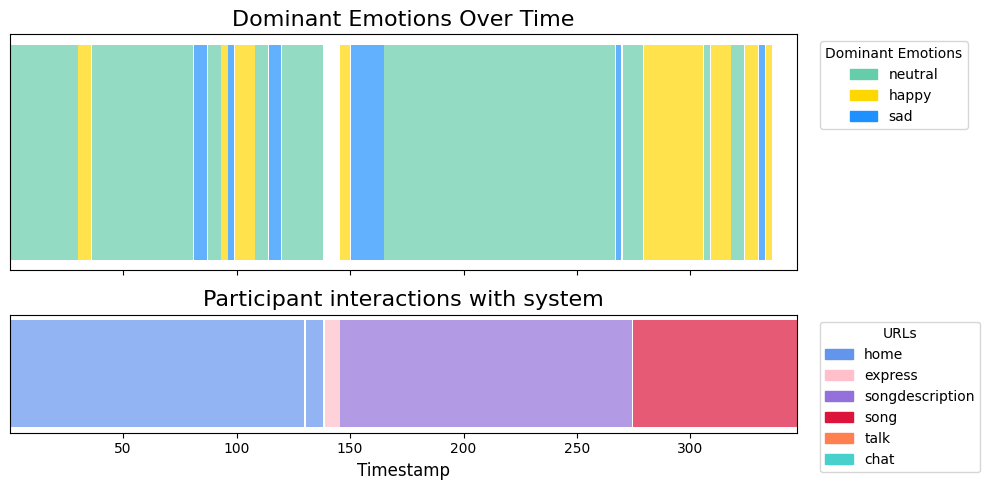

Dominant Emotion for Segment 1: neutral


C:\Users\adamm\AppData\Local\Temp\ipykernel_11488\2342262137.py:95: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  dominant_emotions = df_clean7_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)


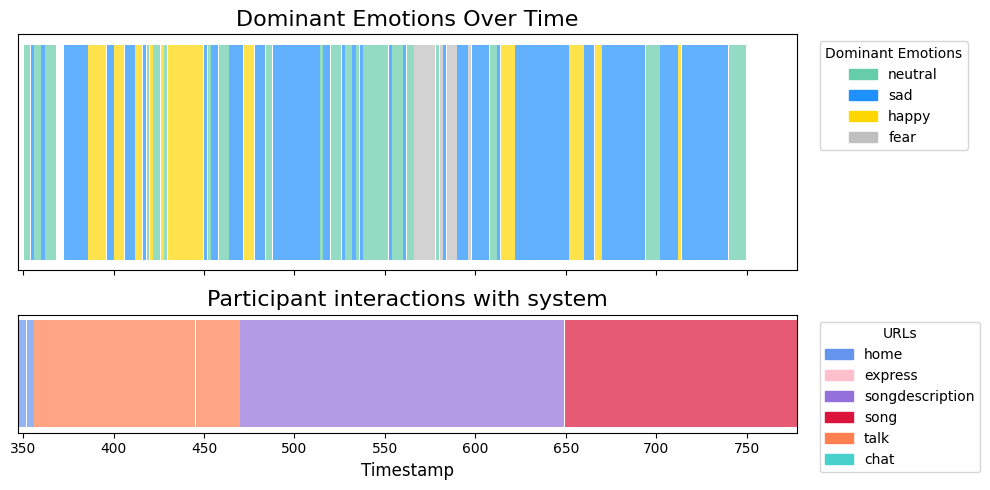

Dominant Emotion for Segment 2: sad


C:\Users\adamm\AppData\Local\Temp\ipykernel_11488\2342262137.py:95: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  dominant_emotions = df_clean7_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)


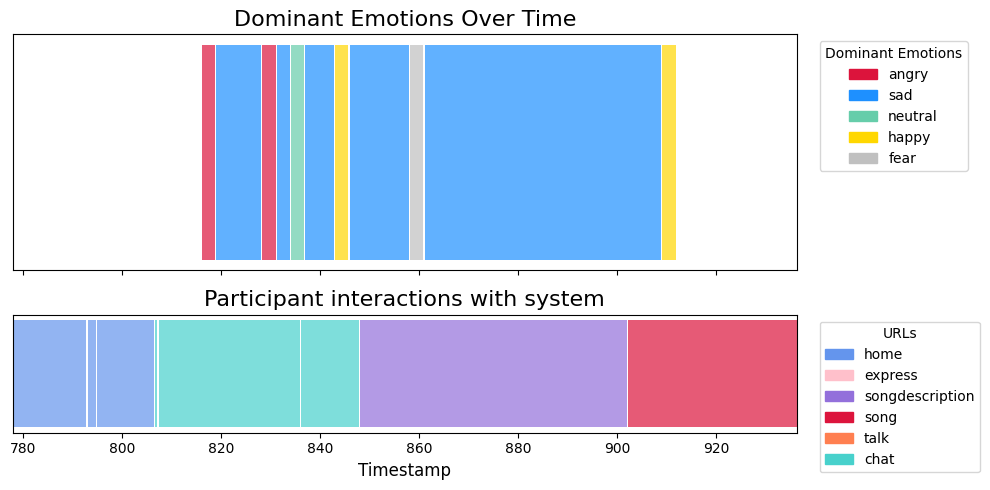

Dominant Emotion for Segment 3: sad


In [4]:
seven = r'7.csv'

df_clean7 = pd.DataFrame(pd.read_csv(seven, on_bad_lines='skip', delimiter=';'))
df_clean7.fillna('', inplace=True)

df_clean7.fillna('', inplace=True)

df_clean7_url = df_clean7.dropna(subset=['url'])

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean7_url[numeric_columns] = df_clean7_url[numeric_columns].replace(',', '.', regex=True)

df_clean7_url['url'] = df_clean7_url['url'].str.replace('/', '')

df_clean7_url['timestamp'] = pd.to_numeric(df_clean7_url['timestamp'], errors='coerce')

df_clean7_url['url_change'] = (df_clean7_url['url'] != df_clean7_url['url'].shift()).cumsum()

df_grouped = df_clean7_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean7_url['timestamp'].max()

df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

df_grouped = df_grouped[df_grouped['url'] != '']

url_colors = {
    'home': 'cornflowerblue',
    'melody': 'lightgreen',
    'chat': 'mediumturquoise',
    'express': 'pink',
    'song': 'crimson',
    'songdescription': 'mediumpurple',
    'colour': 'beige',
    'talk': 'coral',
}

unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

df_clean7_emotion = df_clean7.copy()

df_clean7_emotion[numeric_columns] = df_clean7_emotion[numeric_columns].replace(',', '.', regex=True)

df_clean7_emotion[numeric_columns] = df_clean7_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')

emotion_colors = {
    'happy': 'gold',
    'neutral': 'mediumaquamarine',
    'surprise': 'mediumpurple',
    'sad': 'dodgerblue',
    'angry': 'crimson',
    'fear': 'silver',
    'disgust': 'darkorange'
}

start_urls = ['START1', 'START2', 'START3']
end_urls = ['END1', 'END2', 'END3']

segments = []
current_start = None
for idx, row in df_clean7_url.iterrows():
    if row['interaction_type'] in start_urls:
        if current_start is not None:
            segments.append((current_start, idx - 1))
        current_start = idx
    elif row['interaction_type'] in end_urls and current_start is not None:
        segments.append((current_start, idx + 2))
        current_start = None

if current_start is not None:
    segments.append((current_start, len(df_clean7_url) - 1))

dfs = [df_clean7_url.iloc[start:end + 1].reset_index(drop=True) for start, end in segments]

for segment_number, df_segment in enumerate(dfs, 1):
    start_time = df_segment['timestamp'].iloc[0]
    end_time = df_segment['timestamp'].iloc[-1]
    
    if segment_number == 1:
        interval = 3
    elif segment_number == 2:
        interval = 2
    elif segment_number == 3:
        interval = 3 
    
    df_clean7_emotion['interval'] = (df_clean7_emotion['timestamp'] // interval) * interval

    dominant_emotions = df_clean7_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

    df_clean7_emotion['dominant_emotion'] = df_clean7_emotion['interval'].map(dominant_emotions)
    df_clean7_emotion['emotion_change'] = (df_clean7_emotion['dominant_emotion'] != df_clean7_emotion['dominant_emotion'].shift()).cumsum()

    df_emotion_grouped = df_clean7_emotion.groupby('emotion_change').agg({
        'timestamp': ['first', 'last'],
        'dominant_emotion': 'first'
    }).reset_index()

    df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

    df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

    df_emotion_grouped = df_emotion_grouped.dropna(subset=['dominant_emotion'])
    
    df_emotion_segment = df_emotion_grouped[
        (df_emotion_grouped['start_timestamp'] >= start_time) & 
        (df_emotion_grouped['end_timestamp'] <= end_time)
    ]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

    unique_emotions = df_emotion_segment['dominant_emotion'].unique()
    emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions if emotion in emotion_colors}

    for _, row in df_emotion_segment.iterrows():
        duration = row['end_timestamp'] - row['start_timestamp']
        if row['dominant_emotion'] in emotion_color_map:
            ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

    emotion_handles = [plt.Rectangle((0,0),2,2, color=emotion_color_map[emotion]) for emotion in unique_emotions if emotion in emotion_color_map]
    ax1.legend(emotion_handles, [emotion for emotion in unique_emotions if emotion in emotion_color_map], title="Dominant Emotions", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax1.set_yticks([])
    ax1.set_title(f'Dominant Emotions Over Time', fontsize=16)

    for i, row in df_grouped.iterrows():
        if row['start_timestamp'] >= start_time and row['end_timestamp'] <= end_time:
            duration = row['end_timestamp'] - row['start_timestamp']
            ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=url_color_map[row['url']], alpha=0.7)

    handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
    ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax2.set_yticks([])
    ax2.set_xlabel('Timestamp', fontsize=12)
    ax2.set_title(f'Participant interactions with system', fontsize=16)

    ax1.set_xlim(start_time, end_time)
    ax2.set_xlim(start_time, end_time)

    plt.tight_layout()
    plt.show()
    dominant_emotion = df_emotion_segment['dominant_emotion'].mode()[0]
    print(f"Dominant Emotion for Segment {segment_number}: {dominant_emotion}")

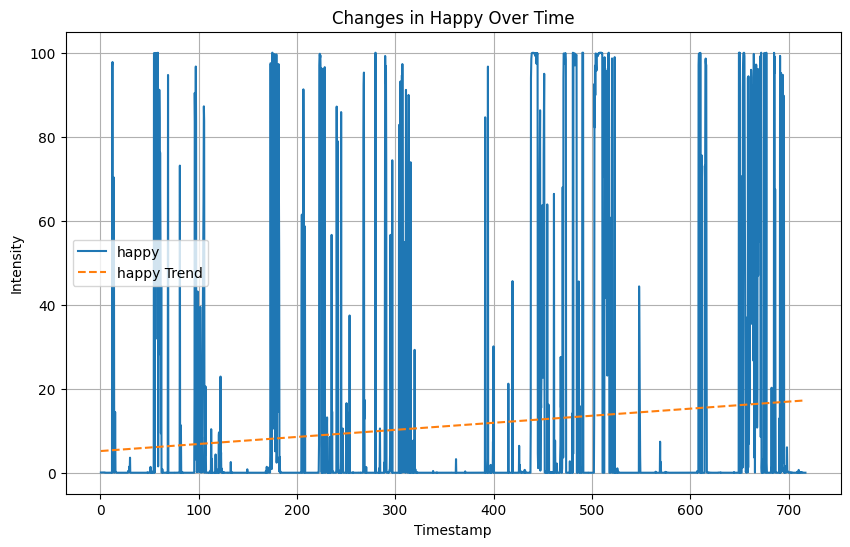

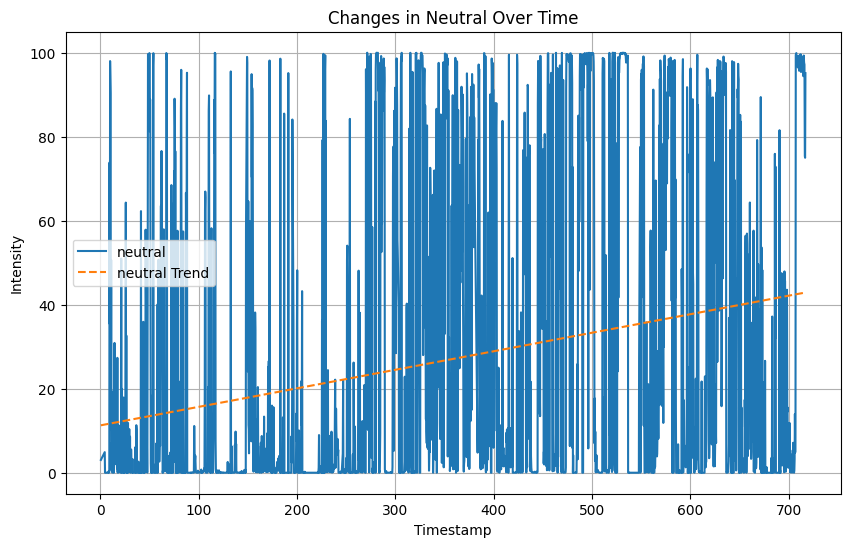

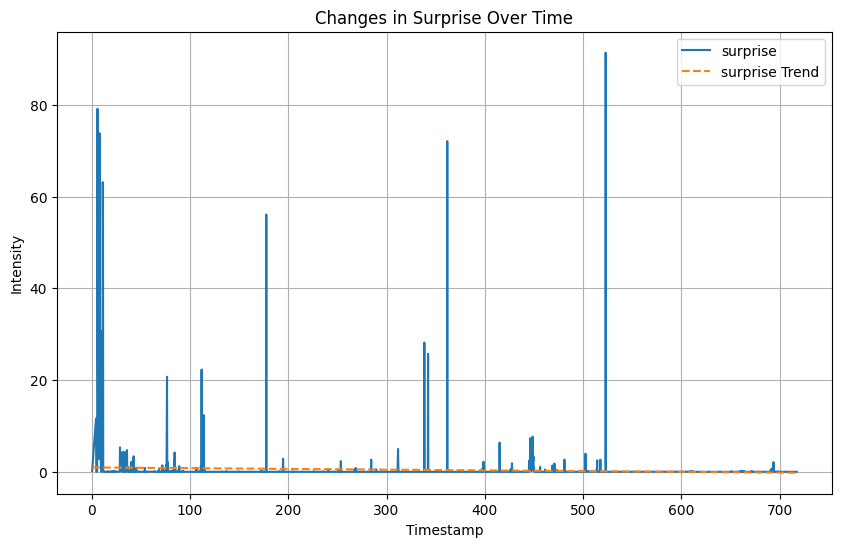

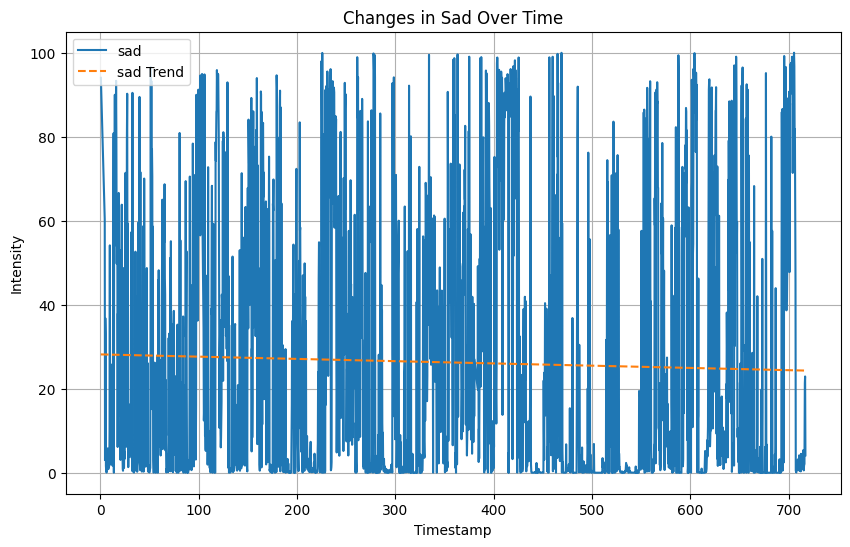

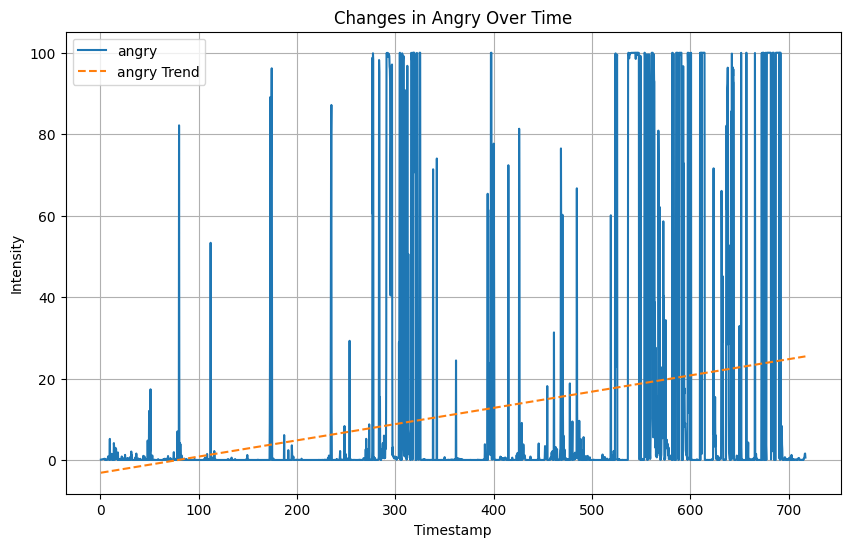

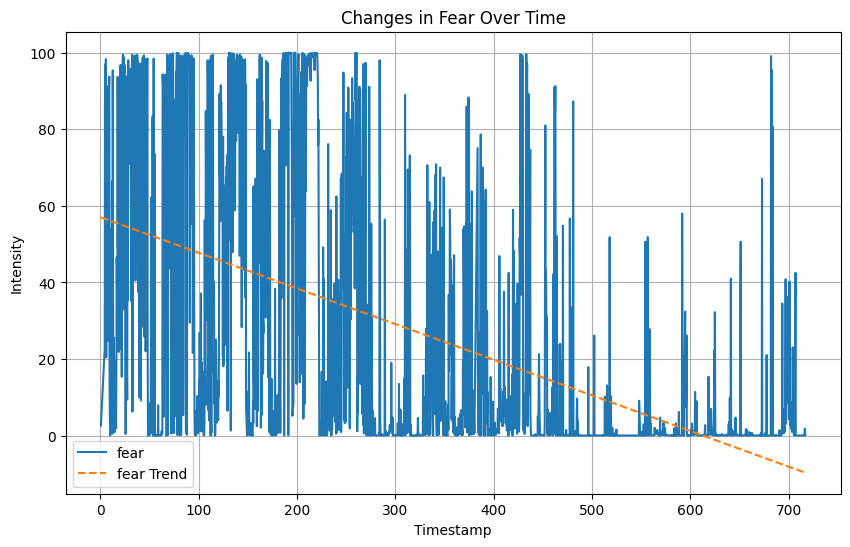

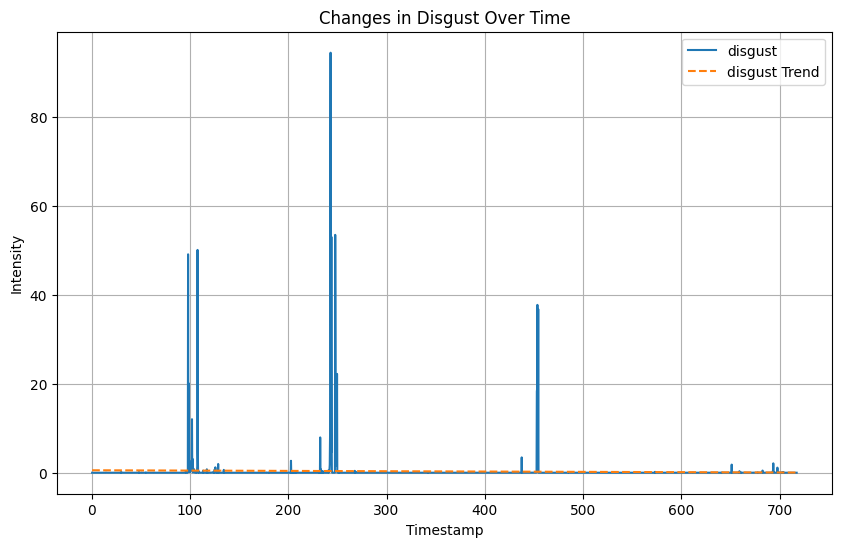

Basic statistics about each of emotions emotion:
               mean        std           min           25%           50%  \
happy     11.280538  28.539676  1.010000e-15  6.260000e-06  5.712640e-04   
neutral   27.323900  37.192922  4.110000e-11  3.205959e-02  3.736559e+00   
surprise   0.366899   3.966471  7.080000e-29  4.100000e-07  5.990000e-05   
sad       26.216488  31.520663  1.670000e-11  5.465808e-01  8.707819e+00   
angry     11.354673  29.680470  9.040000e-20  1.220362e-03  2.259288e-02   
fear      23.164904  34.677620  1.070000e-13  2.834566e-02  1.778896e+00   
disgust    0.292598   3.555730  1.840000e-33  2.590000e-11  4.070000e-08   

                75%         max  
happy      0.128649  100.000000  
neutral   54.654634   99.999988  
surprise   0.001653   91.380775  
sad       47.974995   99.992478  
angry      0.584666  100.000000  
fear      39.219677   99.998409  
disgust    0.000027   94.521081  

Relation of each emotion to others:
happy       0.112805
neutral     

In [391]:
# Define the file path
eight = r'8.csv'

# Attempt to read the CSV file, allowing for irregular rows
df8 = pd.read_csv(eight, on_bad_lines='skip', delimiter=';')
df8.fillna('', inplace=True)
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean8 = df8.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean8[numeric_columns] = df_clean8[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean8[numeric_columns] = df_clean8[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean8[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean8 = df_clean8.drop('timestamp', axis=1)
stats = df_clean8.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

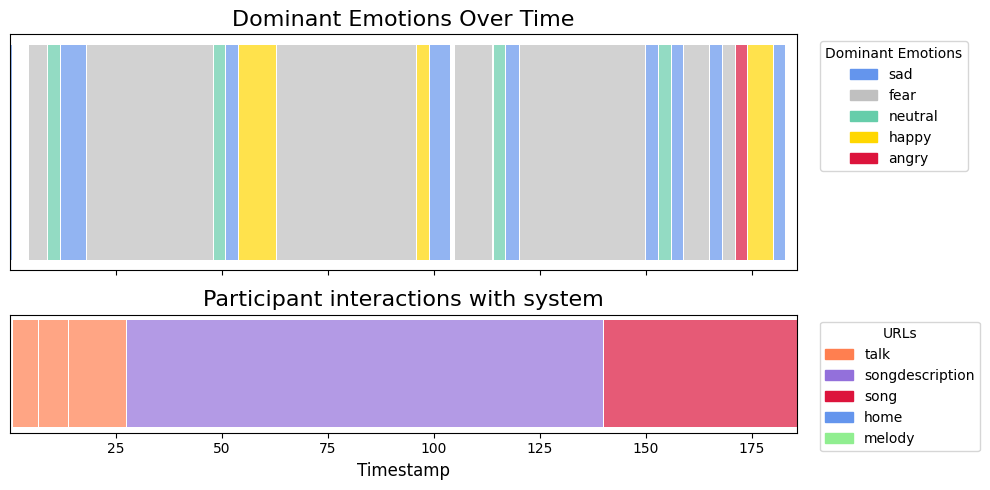

Dominant Emotion for Segment 1: sad


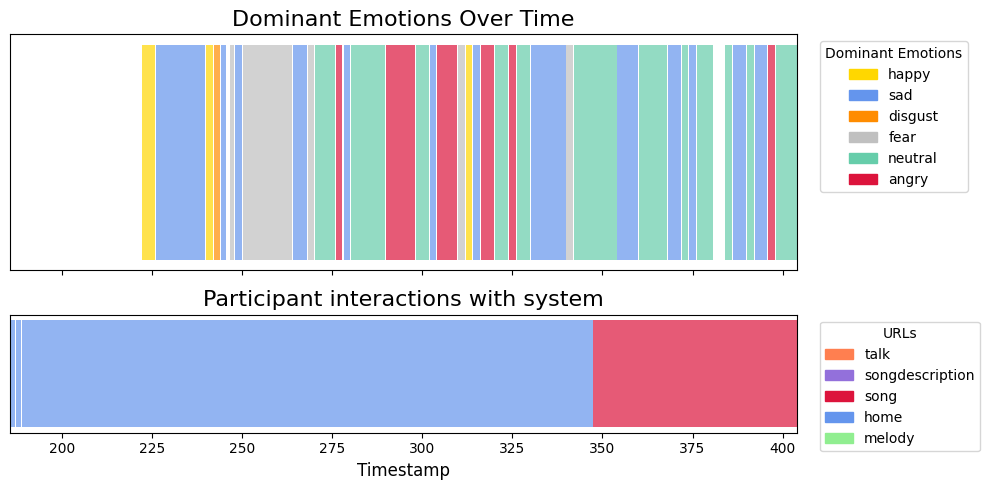

Dominant Emotion for Segment 2: sad


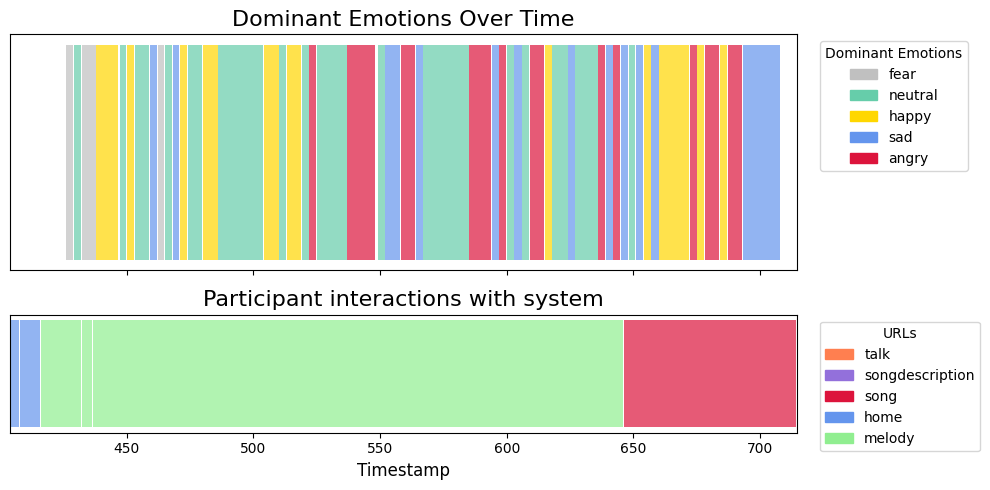

Dominant Emotion for Segment 3: neutral


In [3]:
eight = r'8.csv'

df_clean8 = pd.DataFrame(pd.read_csv(eight, on_bad_lines='skip', delimiter=';'))
df_clean8.fillna('', inplace=True)

df_clean8.fillna('', inplace=True)

df_clean8_url = df_clean8.dropna(subset=['url'])

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean8_url[numeric_columns] = df_clean8_url[numeric_columns].replace(',', '.', regex=True)

df_clean8_url['url'] = df_clean8_url['url'].str.replace('/', '')

df_clean8_url['timestamp'] = pd.to_numeric(df_clean8_url['timestamp'], errors='coerce')

df_clean8_url['url_change'] = (df_clean8_url['url'] != df_clean8_url['url'].shift()).cumsum()

df_grouped = df_clean8_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean8_url['timestamp'].max()

df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

df_grouped = df_grouped[df_grouped['url'] != '']

url_colors = {
    'home': 'cornflowerblue',
    'melody': 'lightgreen',
    'chat': 'mediumturquoise',
    'express': 'pink',
    'song': 'crimson',
    'songdescription': 'mediumpurple',
    'colour': 'beige',
    'talk': 'coral',
}

unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

df_clean8_emotion = df_clean8.copy()

df_clean8_emotion[numeric_columns] = df_clean8_emotion[numeric_columns].replace(',', '.', regex=True)

df_clean8_emotion[numeric_columns] = df_clean8_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')

emotion_colors = {
    'happy': 'gold',
    'neutral': 'mediumaquamarine',
    'surprise': 'mediumpurple',
    'sad': 'cornflowerblue',
    'angry': 'crimson',
    'fear': 'silver',
    'disgust': 'darkorange'
}

start_urls = ['START1', 'START2', 'START3']
end_urls = ['END1', 'END2', 'END3']

segments = []
current_start = None
for idx, row in df_clean8_url.iterrows():
    if row['interaction_type'] in start_urls:
        if current_start is not None:
            segments.append((current_start, idx - 1))
        current_start = idx
    elif row['interaction_type'] in end_urls and current_start is not None:
        segments.append((current_start, idx + 2))
        current_start = None

if current_start is not None:
    segments.append((current_start, len(df_clean8_url) - 1))

dfs = [df_clean8_url.iloc[start:end + 1].reset_index(drop=True) for start, end in segments]

for segment_number, df_segment in enumerate(dfs, 1):
    start_time = df_segment['timestamp'].iloc[0]
    end_time = df_segment['timestamp'].iloc[-1]
    
    if segment_number == 1:
        interval = 3
    elif segment_number == 2:
        interval = 2
    elif segment_number == 3:
        interval = 3 
    
    df_clean8_emotion['interval'] = (df_clean8_emotion['timestamp'] // interval) * interval

    dominant_emotions = df_clean8_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

    df_clean8_emotion['dominant_emotion'] = df_clean8_emotion['interval'].map(dominant_emotions)
    df_clean8_emotion['emotion_change'] = (df_clean8_emotion['dominant_emotion'] != df_clean8_emotion['dominant_emotion'].shift()).cumsum()

    df_emotion_grouped = df_clean8_emotion.groupby('emotion_change').agg({
        'timestamp': ['first', 'last'],
        'dominant_emotion': 'first'
    }).reset_index()

    df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

    df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

    df_emotion_grouped = df_emotion_grouped.dropna(subset=['dominant_emotion'])
    
    df_emotion_segment = df_emotion_grouped[
        (df_emotion_grouped['start_timestamp'] >= start_time) & 
        (df_emotion_grouped['end_timestamp'] <= end_time)
    ]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

    unique_emotions = df_emotion_segment['dominant_emotion'].unique()
    emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions if emotion in emotion_colors}

    for _, row in df_emotion_segment.iterrows():
        duration = row['end_timestamp'] - row['start_timestamp']
        if row['dominant_emotion'] in emotion_color_map:
            ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

    emotion_handles = [plt.Rectangle((0,0),2,2, color=emotion_color_map[emotion]) for emotion in unique_emotions if emotion in emotion_color_map]
    ax1.legend(emotion_handles, [emotion for emotion in unique_emotions if emotion in emotion_color_map], title="Dominant Emotions", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax1.set_yticks([])
    ax1.set_title(f'Dominant Emotions Over Time', fontsize=16)

    for i, row in df_grouped.iterrows():
        if row['start_timestamp'] >= start_time and row['end_timestamp'] <= end_time:
            duration = row['end_timestamp'] - row['start_timestamp']
            ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=url_color_map[row['url']], alpha=0.7)

    handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
    ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax2.set_yticks([])
    ax2.set_xlabel('Timestamp', fontsize=12)
    ax2.set_title(f'Participant interactions with system', fontsize=16)

    ax1.set_xlim(start_time, end_time)
    ax2.set_xlim(start_time, end_time)

    plt.tight_layout()
    plt.show()
    dominant_emotion = df_emotion_segment['dominant_emotion'].mode()[0]
    print(f"Dominant Emotion for Segment {segment_number}: {dominant_emotion}")

In [393]:


# CELANING THE DATA ONCE

# df9['timestamp'] = df9['timestamp'].apply(lambda x: round(float(x.replace(',', '.')), 2) if x else None)

# df9_clean = df9.sort_values(by='timestamp').reset_index(drop=True)

# df9_clean['timestamp'] = df9_clean['timestamp'].apply(lambda x: str(x).replace('.', ','))

# df9_clean.to_csv('df9_clean.csv', index=False, sep=';')

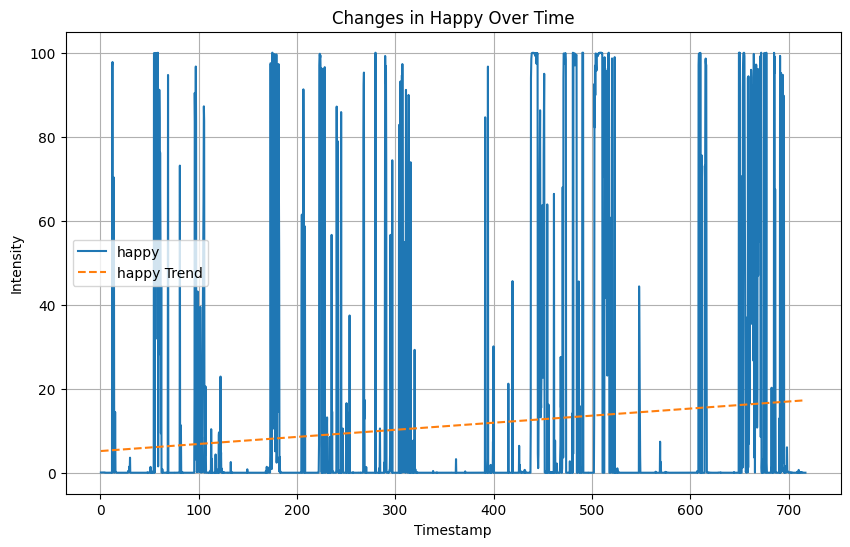

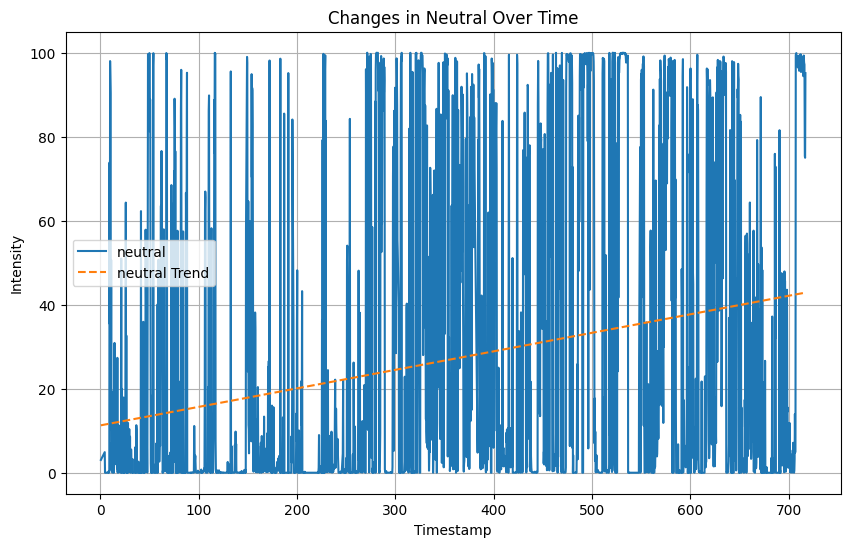

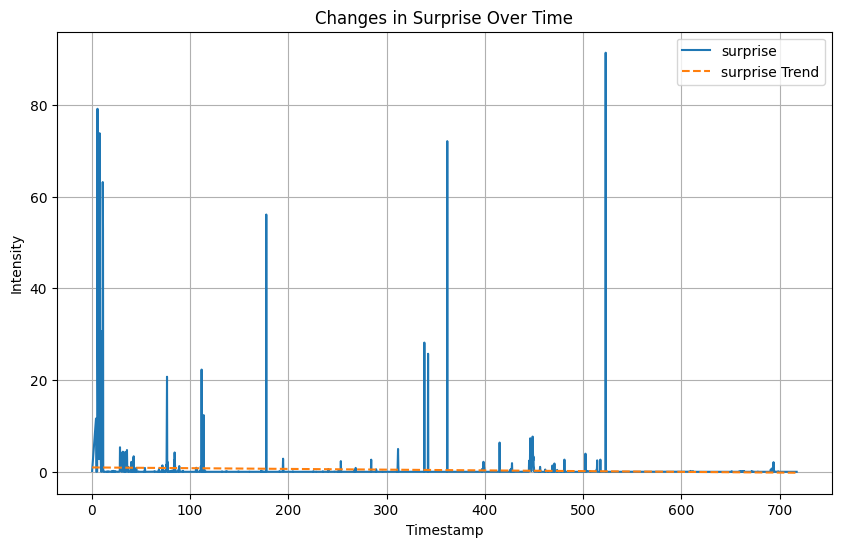

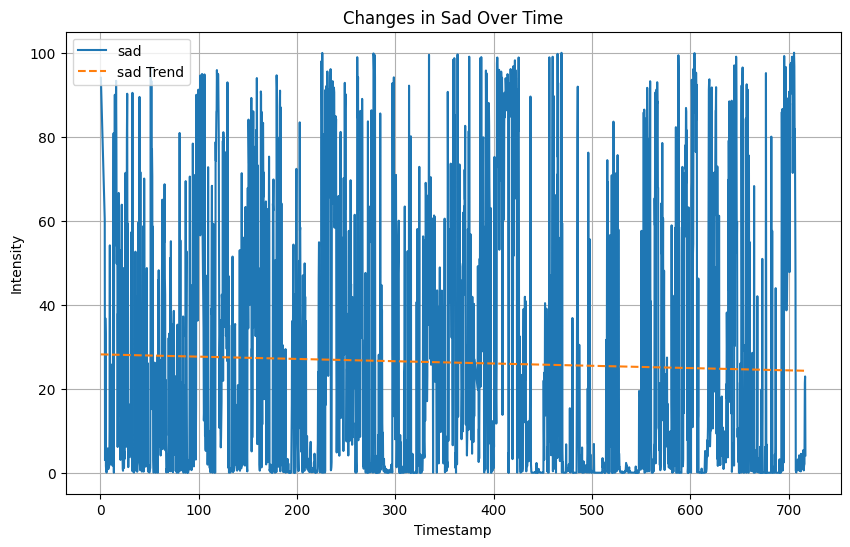

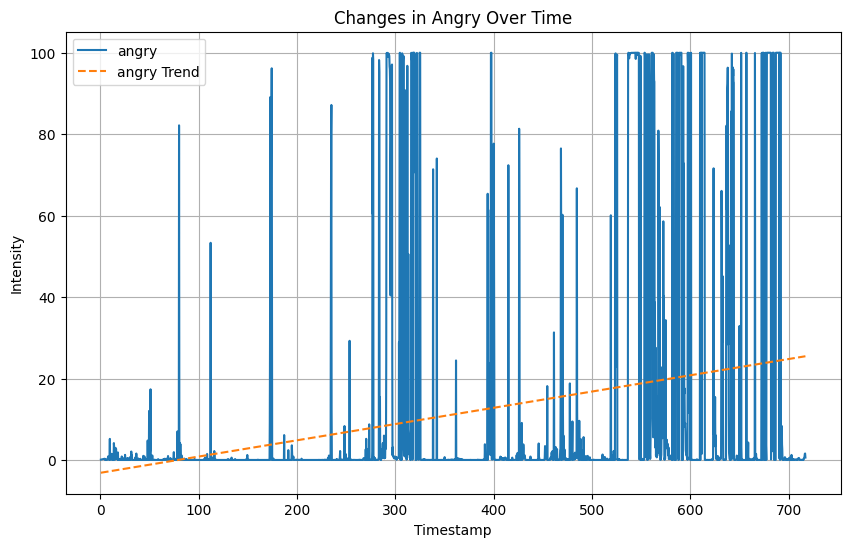

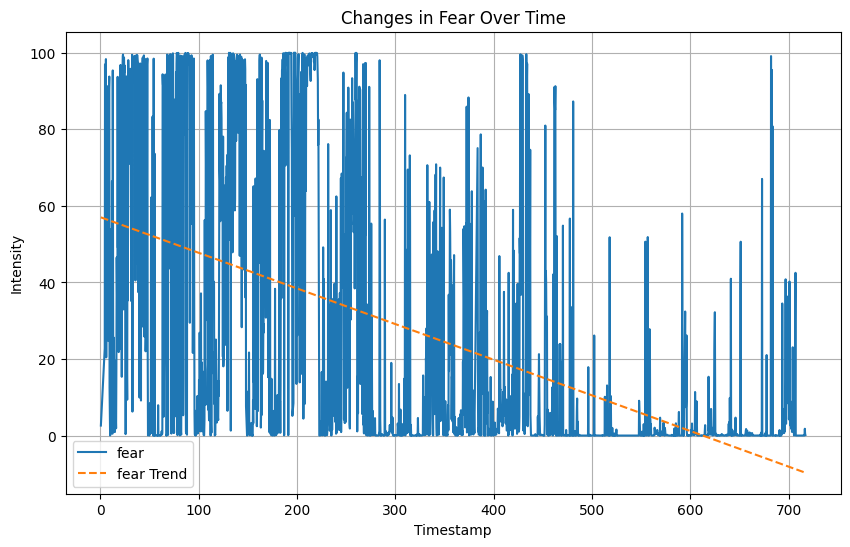

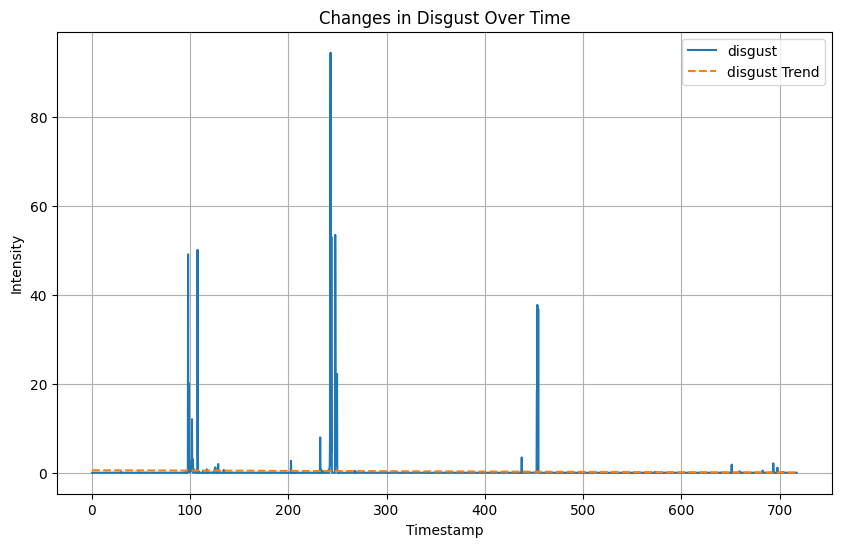

Basic statistics about each of emotions emotion:
               mean        std           min           25%           50%  \
happy     11.292462  28.554115  1.010000e-15  6.267500e-06  5.678200e-04   
neutral   27.306913  37.184873  4.110000e-11  3.195997e-02  3.727167e+00   
surprise   0.367230   3.968766  7.080000e-29  4.122500e-07  5.975000e-05   
sad       26.198026  31.516096  1.670000e-11  5.469095e-01  8.697624e+00   
angry     11.366587  29.695637  9.040000e-20  1.220873e-03  2.259944e-02   
fear      23.176065  34.690083  1.070000e-13  2.839140e-02  1.781640e+00   
disgust    0.292718   3.557785  1.840000e-33  2.607500e-11  4.070000e-08   

                75%         max  
happy      0.126723  100.000000  
neutral   54.615879   99.999988  
surprise   0.001649   91.380775  
sad       47.916633   99.992478  
angry      0.584370  100.000000  
fear      39.092103   99.998409  
disgust    0.000027   94.521081  

Relation of each emotion to others:
happy       0.112925
neutral     

In [394]:
nine = r'df9_clean.csv'

df_clean9 = pd.read_csv(nine, on_bad_lines='skip', delimiter=';')
df_clean9.fillna('', inplace=True)

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean9_emotions = df_clean9.dropna(subset=numeric_columns)


# Zamień przecinki na kropki w kolumnach numerycznych
df_clean9_emotions[numeric_columns] = df_clean9_emotions[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean9_emotions[numeric_columns] = df_clean9_emotions[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean9_emotions[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean9_emotions = df_clean9_emotions.drop('timestamp', axis=1)
stats = df_clean9_emotions.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

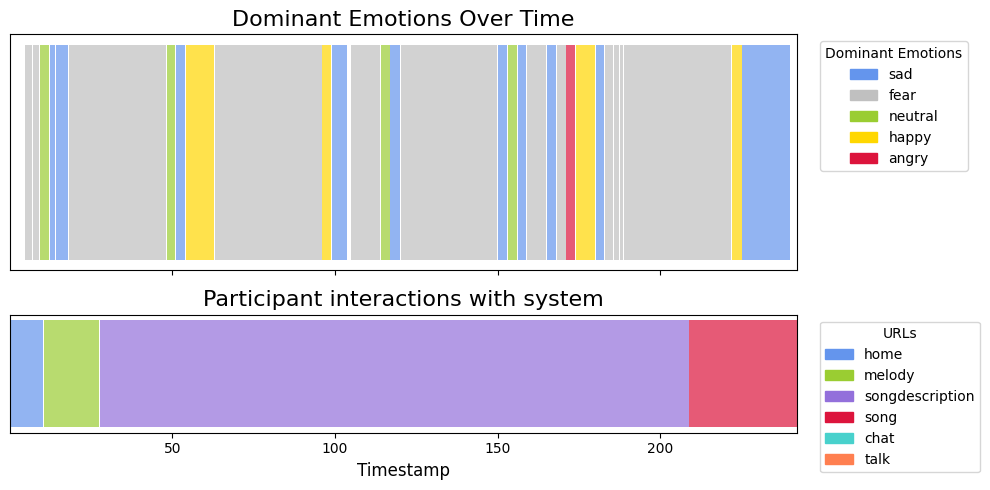

Dominant Emotion for Segment 1: sad


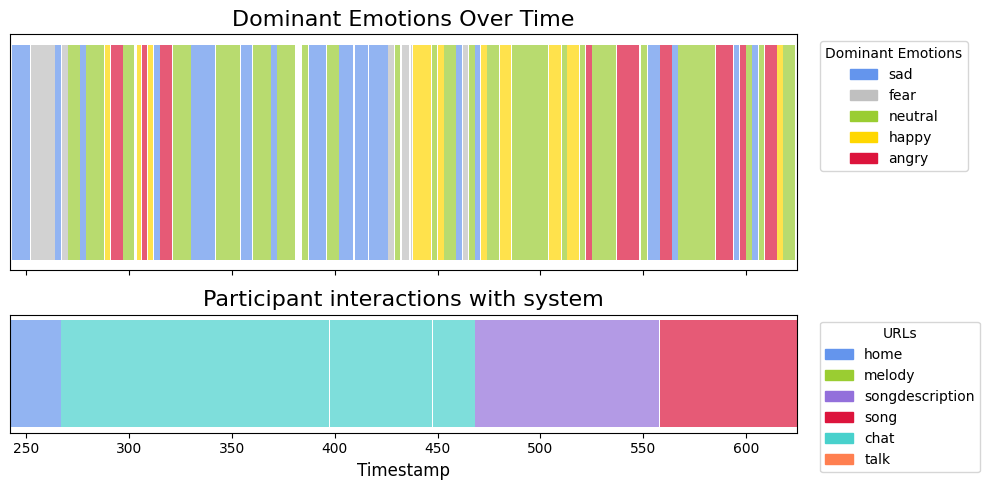

Dominant Emotion for Segment 2: neutral


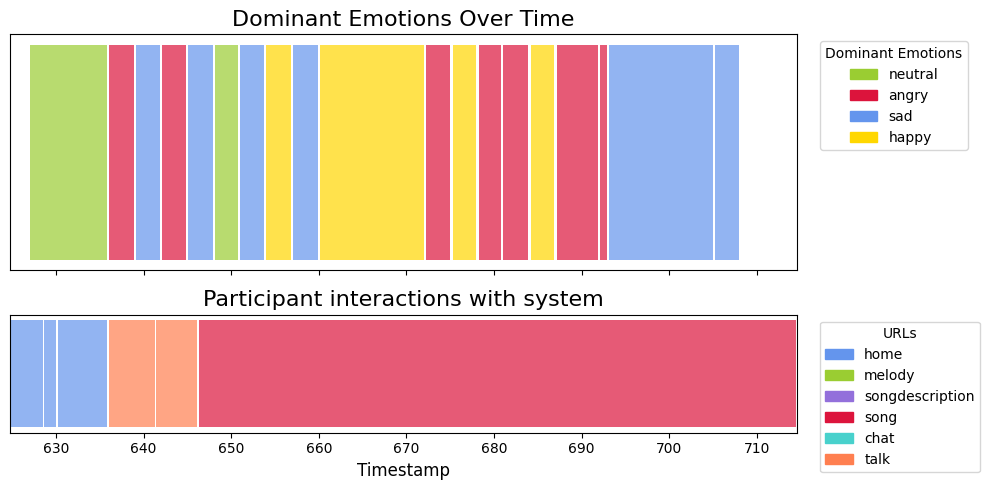

Dominant Emotion for Segment 3: angry


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj plik CSV i zamień na DataFrame
nine = r'df9_clean.csv'

df_clean9 = pd.DataFrame(pd.read_csv(nine, on_bad_lines='skip', delimiter=';'))
df_clean9.fillna('', inplace=True)

df_clean9.fillna('', inplace=True)

df_clean9_url = df_clean9.dropna(subset=['url'])

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean9_url[numeric_columns] = df_clean9_url[numeric_columns].replace(',', '.', regex=True)

df_clean9_url['url'] = df_clean9_url['url'].str.replace('/', '')

df_clean9_url['timestamp'] = pd.to_numeric(df_clean9_url['timestamp'], errors='coerce')

df_clean9_url['url_change'] = (df_clean9_url['url'] != df_clean9_url['url'].shift()).cumsum()

df_grouped = df_clean9_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean9_url['timestamp'].max()

df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

df_grouped = df_grouped[df_grouped['url'] != '']

url_colors = {
    'home': 'cornflowerblue',
    'melody': 'yellowgreen',
    'chat': 'mediumturquoise',
    'express': 'pink',
    'song': 'crimson',
    'songdescription': 'mediumpurple',
    'colour': 'beige',
    'talk': 'coral',
}

unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

df_clean9_emotion = df_clean9.copy()

df_clean9_emotion[numeric_columns] = df_clean9_emotion[numeric_columns].replace(',', '.', regex=True)

df_clean9_emotion[numeric_columns] = df_clean9_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')

emotion_colors = {
    'happy': 'gold',
    'neutral': 'yellowgreen',
    'surprise': 'mediumpurple',
    'sad': 'cornflowerblue',
    'angry': 'crimson',
    'fear': 'silver',
    'disgust': 'yellow'
}

start_urls = ['START1', 'START2', 'START3']
end_urls = ['END1', 'END2', 'END3']

segments = []
current_start = None
for idx, row in df_clean9_url.iterrows():
    if row['interaction_type'] in start_urls:
        if current_start is not None:
            segments.append((current_start, idx - 1))
        current_start = idx
    elif row['interaction_type'] in end_urls and current_start is not None:
        segments.append((current_start, idx + 2))
        current_start = None

if current_start is not None:
    segments.append((current_start, len(df_clean9_url) - 1))

dfs = [df_clean9_url.iloc[start:end + 1].reset_index(drop=True) for start, end in segments]

for segment_number, df_segment in enumerate(dfs, 1):
    start_time = df_segment['timestamp'].iloc[0]
    end_time = df_segment['timestamp'].iloc[-1]
    
    if segment_number == 1:
        interval = 3
    elif segment_number == 2:
        interval = 3
    elif segment_number == 3:
        interval = 3 
    
    df_clean9_emotion['interval'] = (df_clean9_emotion['timestamp'] // interval) * interval

    dominant_emotions = df_clean9_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

    df_clean9_emotion['dominant_emotion'] = df_clean9_emotion['interval'].map(dominant_emotions)
    df_clean9_emotion['emotion_change'] = (df_clean9_emotion['dominant_emotion'] != df_clean9_emotion['dominant_emotion'].shift()).cumsum()

    df_emotion_grouped = df_clean9_emotion.groupby('emotion_change').agg({
        'timestamp': ['first', 'last'],
        'dominant_emotion': 'first'
    }).reset_index()

    df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

    df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

    df_emotion_grouped = df_emotion_grouped.dropna(subset=['dominant_emotion'])
    
    df_emotion_segment = df_emotion_grouped[
        (df_emotion_grouped['start_timestamp'] >= start_time) & 
        (df_emotion_grouped['end_timestamp'] <= end_time)
    ]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

    unique_emotions = df_emotion_segment['dominant_emotion'].unique()
    emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions if emotion in emotion_colors}

    for _, row in df_emotion_segment.iterrows():
        duration = row['end_timestamp'] - row['start_timestamp']
        if row['dominant_emotion'] in emotion_color_map:
            ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

    emotion_handles = [plt.Rectangle((0,0),2,2, color=emotion_color_map[emotion]) for emotion in unique_emotions if emotion in emotion_color_map]
    ax1.legend(emotion_handles, [emotion for emotion in unique_emotions if emotion in emotion_color_map], title="Dominant Emotions", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax1.set_yticks([])
    ax1.set_title(f'Dominant Emotions Over Time', fontsize=16)

    for i, row in df_grouped.iterrows():
        if row['start_timestamp'] >= start_time and row['end_timestamp'] <= end_time:
            duration = row['end_timestamp'] - row['start_timestamp']
            ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=url_color_map[row['url']], alpha=0.7)

    handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
    ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax2.set_yticks([])
    ax2.set_xlabel('Timestamp', fontsize=12)
    ax2.set_title(f'Participant interactions with system', fontsize=16)

    ax1.set_xlim(start_time, end_time)
    ax2.set_xlim(start_time, end_time)

    plt.tight_layout()
    plt.show()

    # Obliczanie dominującej emocji dla segmentu
    dominant_emotion = df_emotion_segment['dominant_emotion'].mode()[0]
    print(f"Dominant Emotion for Segment {segment_number}: {dominant_emotion}")

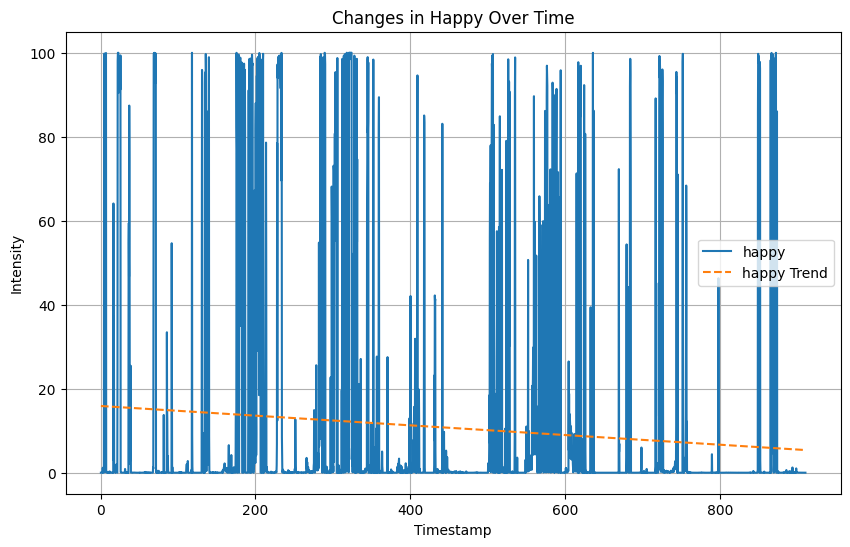

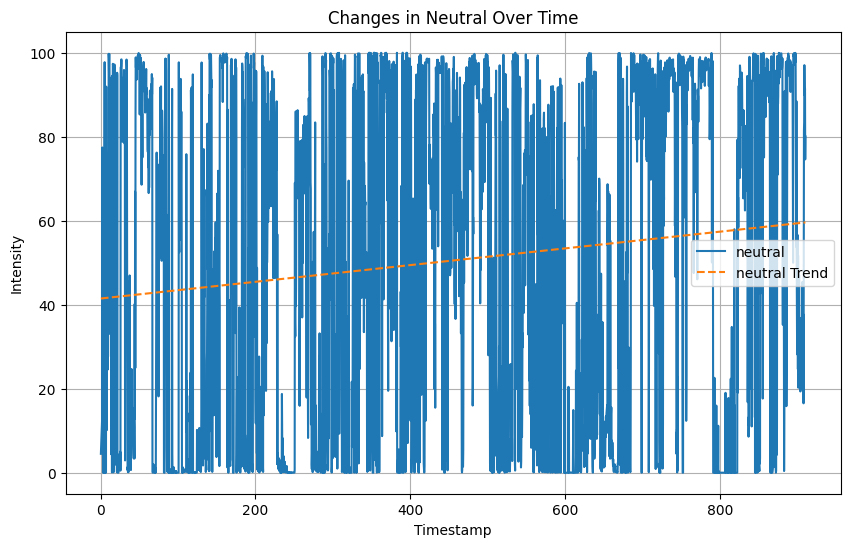

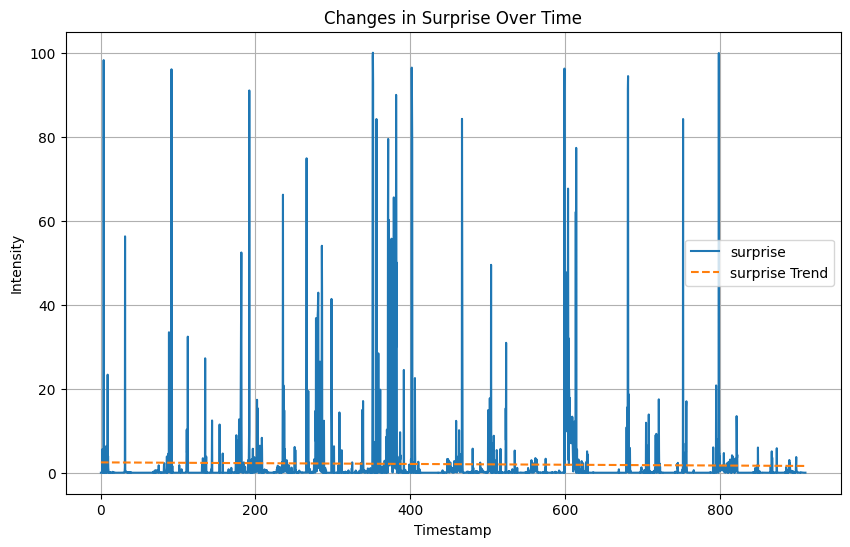

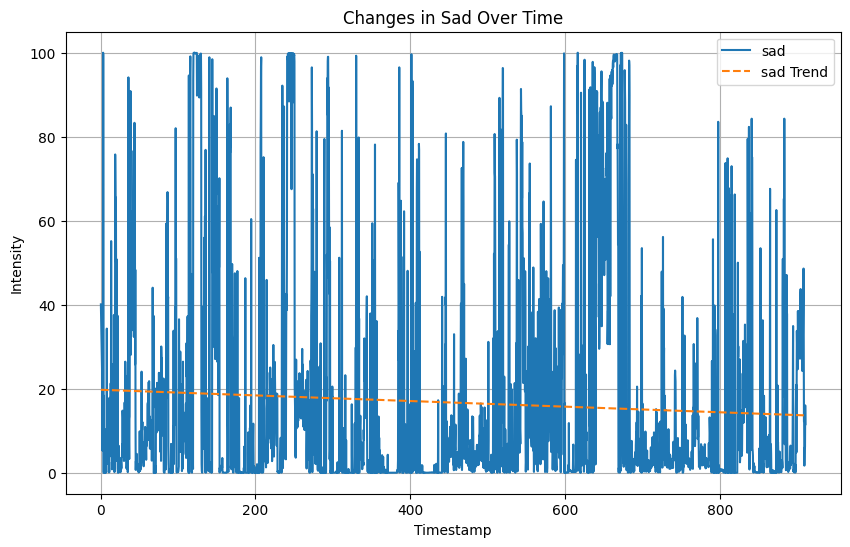

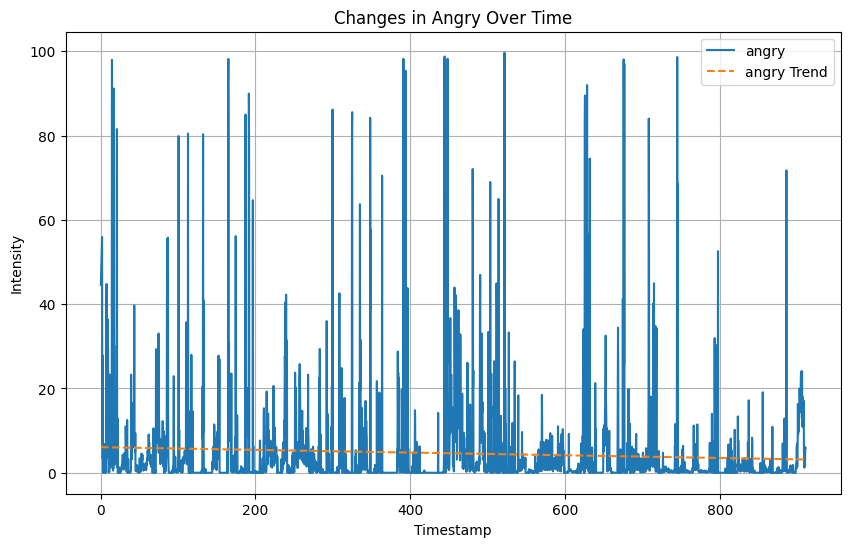

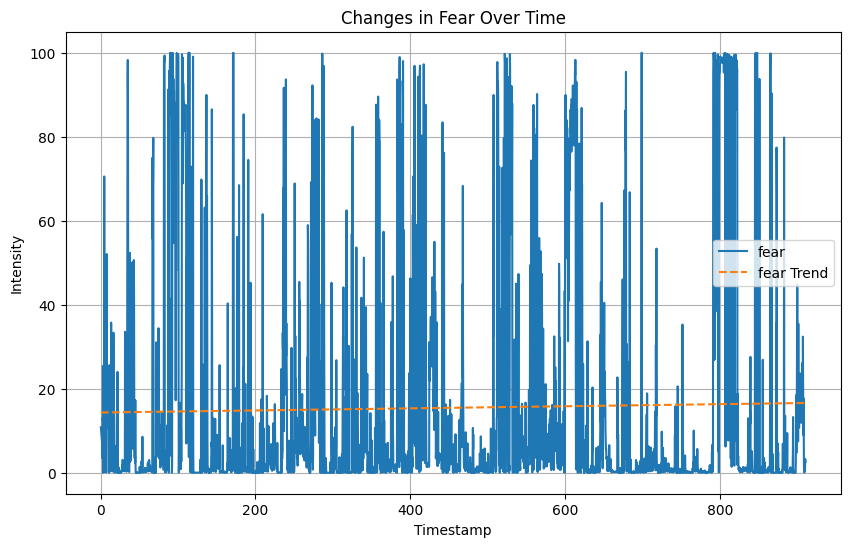

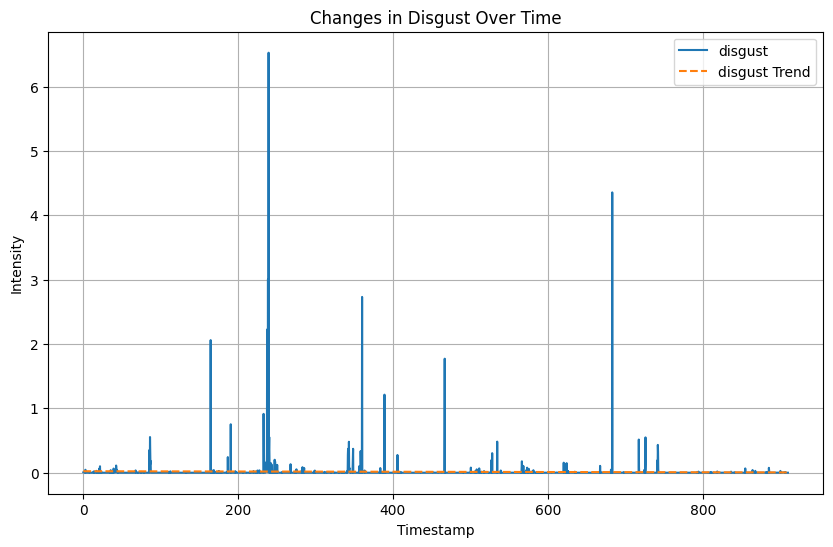

Basic statistics about each of emotions emotion:
               mean        std           min           25%        50%  \
happy     10.629744  27.416442  7.030000e-12  2.662819e-03   0.026268   
neutral   50.558049  40.308839  1.040000e-07  2.714756e+00  58.697414   
surprise   2.036698   9.400481  1.060000e-19  3.898030e-04   0.009642   
sad       16.692526  26.425329  7.010000e-11  4.024288e-01   4.239656   
angry      4.599113  12.016852  2.250000e-14  4.588762e-03   0.495573   
fear      15.469896  28.217911  1.120000e-08  2.082716e-01   1.831288   
disgust    0.013974   0.174360  2.930000e-36  3.740000e-09   0.000002   

                75%        max  
happy      0.647860  99.999940  
neutral   92.423201  99.999940  
surprise   0.205391  99.997532  
sad       19.218262  99.999487  
angry      3.483101  99.658102  
fear      12.570252  99.999487  
disgust    0.000164   6.526367  

Relation of each emotion to others:
happy       0.106297
neutral     0.505580
surprise    0.020367
sa

In [396]:
# Define the file path
ten = r'10.csv'

# Attempt to read the CSV file, allowing for irregular rows
df_clean10 = pd.read_csv(ten, on_bad_lines='skip', delimiter=';')
df_clean10.fillna('', inplace=True)

numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean10_emotions = df_clean10.dropna(subset=numeric_columns)

# Zamień przecinki na kropki w kolumnach numerycznych
df_clean10_emotions[numeric_columns] = df_clean10_emotions[numeric_columns].replace(',', '.', regex=True)

# Konwertuj kolumny numeryczne na odpowiednie typy danych
df_clean10_emotions[numeric_columns] = df_clean10_emotions[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Twórz oddzielne wykresy dla każdej emocji i obliczaj trend
for column in numeric_columns[1:]:
    # Usuń wiersze zawierające NaN w kolumnie emocji
    df_emotion = df_clean10_emotions[['timestamp', column]].dropna()
    
    plt.figure(figsize=(10, 6))
    
    # Wykres emocji w czasie
    plt.plot(df_emotion['timestamp'], df_emotion[column], label=column)
    
    # Obliczanie trendu za pomocą regresji liniowej
    X = df_emotion['timestamp'].values.reshape(-1, 1)
    y = df_emotion[column].values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    
    # Dodanie linii trendu do wykresu
    plt.plot(df_emotion['timestamp'], trend, label=f'{column} Trend', linestyle='--')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Intensity')
    plt.title(f'Changes in {column.capitalize()} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Oblicz podstawowe wartości statystyczne dla każdej emocji
df_clean10_emotions = df_clean10_emotions.drop('timestamp', axis=1)
stats = df_clean10_emotions.describe().transpose()

# Oblicz stosunek każdej emocji do siebie (średnia wartość każdej emocji)
mean_values = stats['mean']
ratios = mean_values / mean_values.sum()

# Wyświetl podstawowe wartości statystyczne i stosunki
print("Basic statistics about each of emotions emotion:")
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("\nRelation of each emotion to others:")
print(ratios)

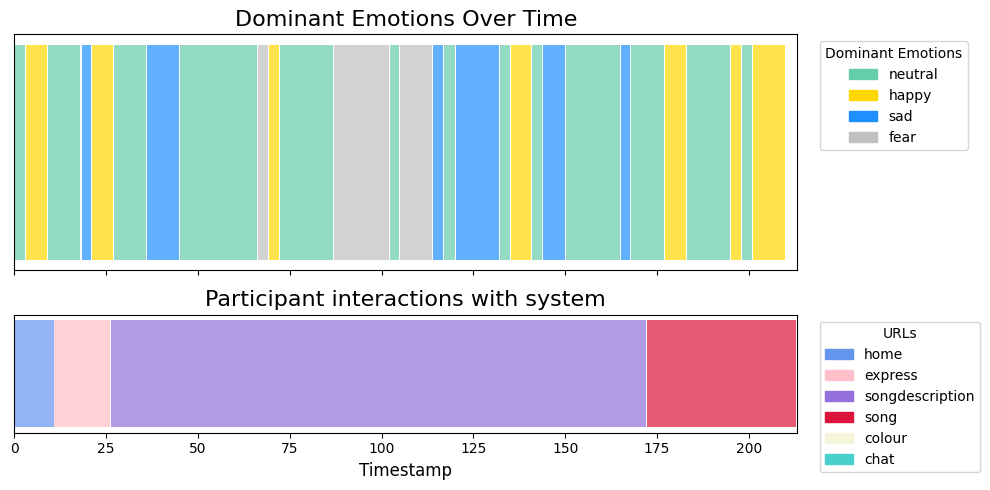

Dominant Emotion for Segment 1: neutral


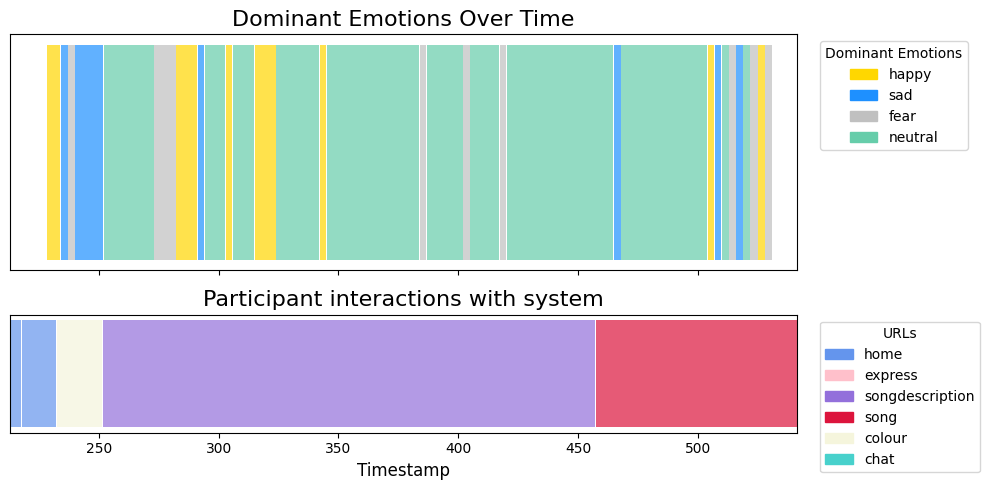

Dominant Emotion for Segment 2: neutral


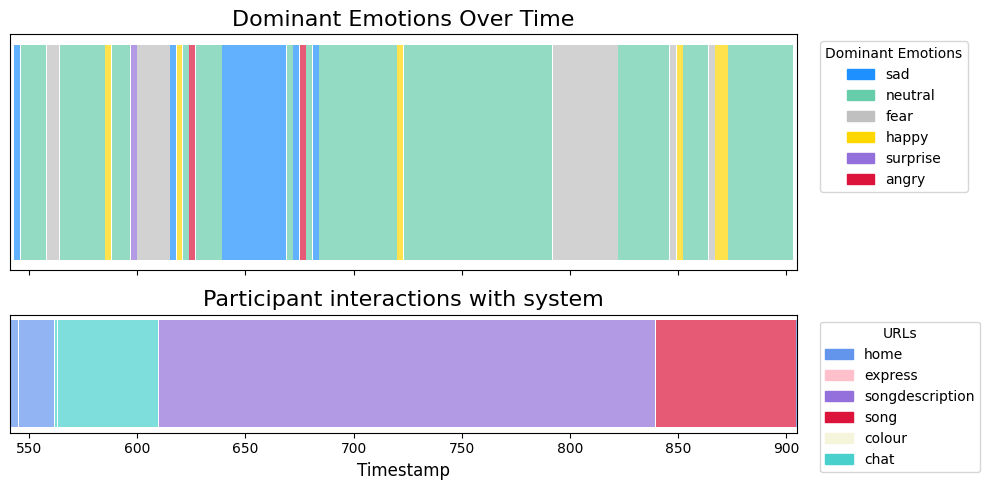

Dominant Emotion for Segment 3: neutral


In [6]:
# Define the file path
ten = r'10.csv'

# Attempt to read the CSV file, allowing for irregular rows
df_clean10 = pd.DataFrame(pd.read_csv(ten, on_bad_lines='skip', delimiter=';'))
df_clean10.fillna('', inplace=True)

# Wypełnij brakujące wartości pustymi ciągami
df_clean10.fillna('', inplace=True)

# Usuń wiersze bez wartości w kolumnie 'url'
df_clean10_url = df_clean10.dropna(subset=['url'])

# Zamień przecinki na kropki w kolumnach numerycznych
numeric_columns = ['timestamp', 'happy', 'neutral', 'surprise', 'sad', 'angry', 'fear', 'disgust']
df_clean10_url[numeric_columns] = df_clean10_url[numeric_columns].replace(',', '.', regex=True)

# Usuń ukośniki z kolumny 'url'
df_clean10_url['url'] = df_clean10_url['url'].str.replace('/', '')

# Konwertuj kolumnę 'timestamp' na wartości numeryczne
df_clean10_url['timestamp'] = pd.to_numeric(df_clean10_url['timestamp'], errors='coerce')

# Dodaj kolumnę 'url_change' do grupowania
df_clean10_url['url_change'] = (df_clean10_url['url'] != df_clean10_url['url'].shift()).cumsum()

# Grupowanie danych według 'url_change'
df_grouped = df_clean10_url.groupby('url_change').agg({
    'timestamp': ['first', 'last'],
    'url': 'first'
}).reset_index()

df_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'url']

# Przesunięcie kolumny 'end_timestamp' i ustawienie ostatniej wartości
df_grouped['end_timestamp'] = df_grouped['end_timestamp'].shift(-1)
df_grouped.loc[df_grouped.index[-1], 'end_timestamp'] = df_clean10_url['timestamp'].max()

# Usuń wiersze, gdzie 'url' jest taki sam jak w poprzednim wierszu
df_grouped = df_grouped[df_grouped['url'] != df_grouped['url'].shift()]

# Usuń wiersze, gdzie 'url' jest pusty
df_grouped = df_grouped[df_grouped['url'] != '']

# Tworzenie mapy kolorów dla unikalnych URL-i
url_colors = {
    'home': 'cornflowerblue',
    'melody': 'lightgreen',
    'chat': 'mediumturquoise',
    'express': 'pink',
    'song': 'crimson',
    'songdescription': 'mediumpurple',
    'colour': 'beige',
    'talk': 'coral',
}

unique_urls = df_grouped['url'].unique()
url_color_map = {url: url_colors.get(url, 'gray') for url in unique_urls}

# Kopiowanie DataFrame do analizy emocji
df_clean10_emotion = df_clean10.copy()

# Zamiana przecinków na kropki w kolumnach numerycznych
df_clean10_emotion[numeric_columns] = df_clean10_emotion[numeric_columns].replace(',', '.', regex=True)

# Konwersja kolumn numerycznych na wartości numeryczne
df_clean10_emotion[numeric_columns] = df_clean10_emotion[numeric_columns].apply(pd.to_numeric, errors='coerce')


emotion_colors = {
    'happy': 'gold',
    'neutral': 'mediumaquamarine',
    'surprise': 'mediumpurple',
    'sad': 'dodgerblue',
    'angry': 'crimson',
    'fear': 'silver',
    'disgust': 'darkorange'
}

# Podział danych na odcinki zaczynające się na 'START1', 'START2', 'START3' i kończące na 'END1', 'END2', 'END3'
start_urls = ['START1', 'START2', 'START3']
end_urls = ['END1', 'END2', 'END3']

segments = []
current_start = None
for idx, row in df_clean10_url.iterrows():
    if row['interaction_type'] in start_urls:
        if current_start is not None:
            segments.append((current_start, idx - 1))
        current_start = idx
    elif row['interaction_type'] in end_urls and current_start is not None:
        segments.append((current_start, idx +2))
        current_start = None

# Ensure we close any open segment at the end of the data
if current_start is not None:
    segments.append((current_start, len(df_clean10_url) - 1))

# Create DataFrames for each segment
dfs = [df_clean10_url.iloc[start:end + 1].reset_index(drop=True) for start, end in segments]

# Tworzenie wykresów dla każdego segmentu
for segment_number, df_segment in enumerate(dfs, 1):
    start_time = df_segment['timestamp'].iloc[0]
    end_time = df_segment['timestamp'].iloc[-1]
    
    # Ustawienie interwału dla każdego segmentu
    if segment_number == 1:
        interval = 3
    elif segment_number == 2:
        interval = 3
    elif segment_number == 3:
        interval = 3  # Możesz dostosować interwał dla trzeciego segmentu
    
    # Dodanie kolumny 'interval' do grupowania co określony interwał
    df_clean10_emotion['interval'] = (df_clean10_emotion['timestamp'] // interval) * interval

    # Znalezienie dominujących emocji w każdym interwale
    dominant_emotions = df_clean10_emotion.groupby('interval')[numeric_columns[1:]].mean().idxmax(axis=1)

    # Dodanie kolumny 'dominant_emotion' do DataFrame
    df_clean10_emotion['dominant_emotion'] = df_clean10_emotion['interval'].map(dominant_emotions)
    df_clean10_emotion['emotion_change'] = (df_clean10_emotion['dominant_emotion'] != df_clean10_emotion['dominant_emotion'].shift()).cumsum()

    # Grupowanie danych według 'emotion_change'
    df_emotion_grouped = df_clean10_emotion.groupby('emotion_change').agg({
        'timestamp': ['first', 'last'],
        'dominant_emotion': 'first'
    }).reset_index()

    df_emotion_grouped.columns = ['group', 'start_timestamp', 'end_timestamp', 'dominant_emotion']

    # Usuń wiersze, gdzie 'dominant_emotion' jest taka sama jak w poprzednim wierszu
    df_emotion_grouped = df_emotion_grouped[df_emotion_grouped['dominant_emotion'] != df_emotion_grouped['dominant_emotion'].shift()]

    # Usuń wiersze, w których dominująca emocja jest pusta lub NaN
    df_emotion_grouped = df_emotion_grouped.dropna(subset=['dominant_emotion'])
    
    df_emotion_segment = df_emotion_grouped[
        (df_emotion_grouped['start_timestamp'] >= start_time) & 
        (df_emotion_grouped['end_timestamp'] <= end_time)
    ]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True, gridspec_kw={'height_ratios': [1, 0.5]})

    # Create a color map for emotions, including only those present in the data
    unique_emotions = df_emotion_segment['dominant_emotion'].unique()
    emotion_color_map = {emotion: emotion_colors.get(emotion, 'gray') for emotion in unique_emotions if emotion in emotion_colors}

    # Wykres dominujących emocji
    for _, row in df_emotion_segment.iterrows():
        duration = row['end_timestamp'] - row['start_timestamp']
        if row['dominant_emotion'] in emotion_color_map:
            ax1.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=emotion_color_map[row['dominant_emotion']], alpha=0.7)

    # Dodanie legendy dla emocji
    emotion_handles = [plt.Rectangle((0,0),2,2, color=emotion_color_map[emotion]) for emotion in unique_emotions if emotion in emotion_color_map]
    ax1.legend(emotion_handles, [emotion for emotion in unique_emotions if emotion in emotion_color_map], title="Dominant Emotions", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax1.set_yticks([])
    ax1.set_title(f'Dominant Emotions Over Time', fontsize=16)

    # Wykres interakcji z systemem
    for i, row in df_grouped.iterrows():
        if row['start_timestamp'] >= start_time and row['end_timestamp'] <= end_time:
            duration = row['end_timestamp'] - row['start_timestamp']
            ax2.barh(0, duration, left=row['start_timestamp'], height=0.5, 
                     color=url_color_map[row['url']], alpha=0.7)

    # Dodanie legendy dla URL-i
    handles = [plt.Rectangle((0,0),1,1, color=url_color_map[url]) for url in unique_urls]
    ax2.legend(handles, unique_urls, title="URLs", bbox_to_anchor=(1.02, 1), loc='upper left')

    ax2.set_yticks([])
    ax2.set_xlabel('Timestamp', fontsize=12)
    ax2.set_title(f'Participant interactions with system', fontsize=16)

    # Dostosowanie zakresu osi X do aktualnego segmentu
    ax1.set_xlim(start_time, end_time)
    ax2.set_xlim(start_time, end_time)

    plt.tight_layout()
    plt.show()
    dominant_emotion = df_emotion_segment['dominant_emotion'].mode()[0]
    print(f"Dominant Emotion for Segment {segment_number}: {dominant_emotion}")

In [399]:
df_combined = pd.concat([df_clean1, df_clean2, df_clean3, df_clean4, df_clean5,df_clean6, df_clean7, df_clean8], ignore_index=True)

stats_combined = df_combined.describe().transpose()

print("Basic statistics of face expression for all participants:")
print(stats_combined[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

Basic statistics of face expression for all participants:


KeyError: "None of [Index(['mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')] are in the [columns]"

Nazwy kolumn: ['I think that I would like to use MoodTune AI frequently.', 'I found MoodTune AI song creation process unnecessarily complex.', 'I thought MoodTune AIwas easy to use.', 'I found the various ways to create song in MoodTune AI were well integrated.', 'I thought there was too much inconsistency in MoodTune AI.', 'I imagine that most people would learn to use MoodTune AI very quickly.', 'I found MoodTune AIvery awkward to use.', 'I felt very confident using MoodTune AI.', 'I needed to learn a lot of things before I could get going with MoodTune AI.', "How accurately do you think the songs created by MoodTune AI reflect your mood? Consider the song's genre tempo progression instruments and melody.", 'Which length of the generated song provided you with the most satisfying experience?']


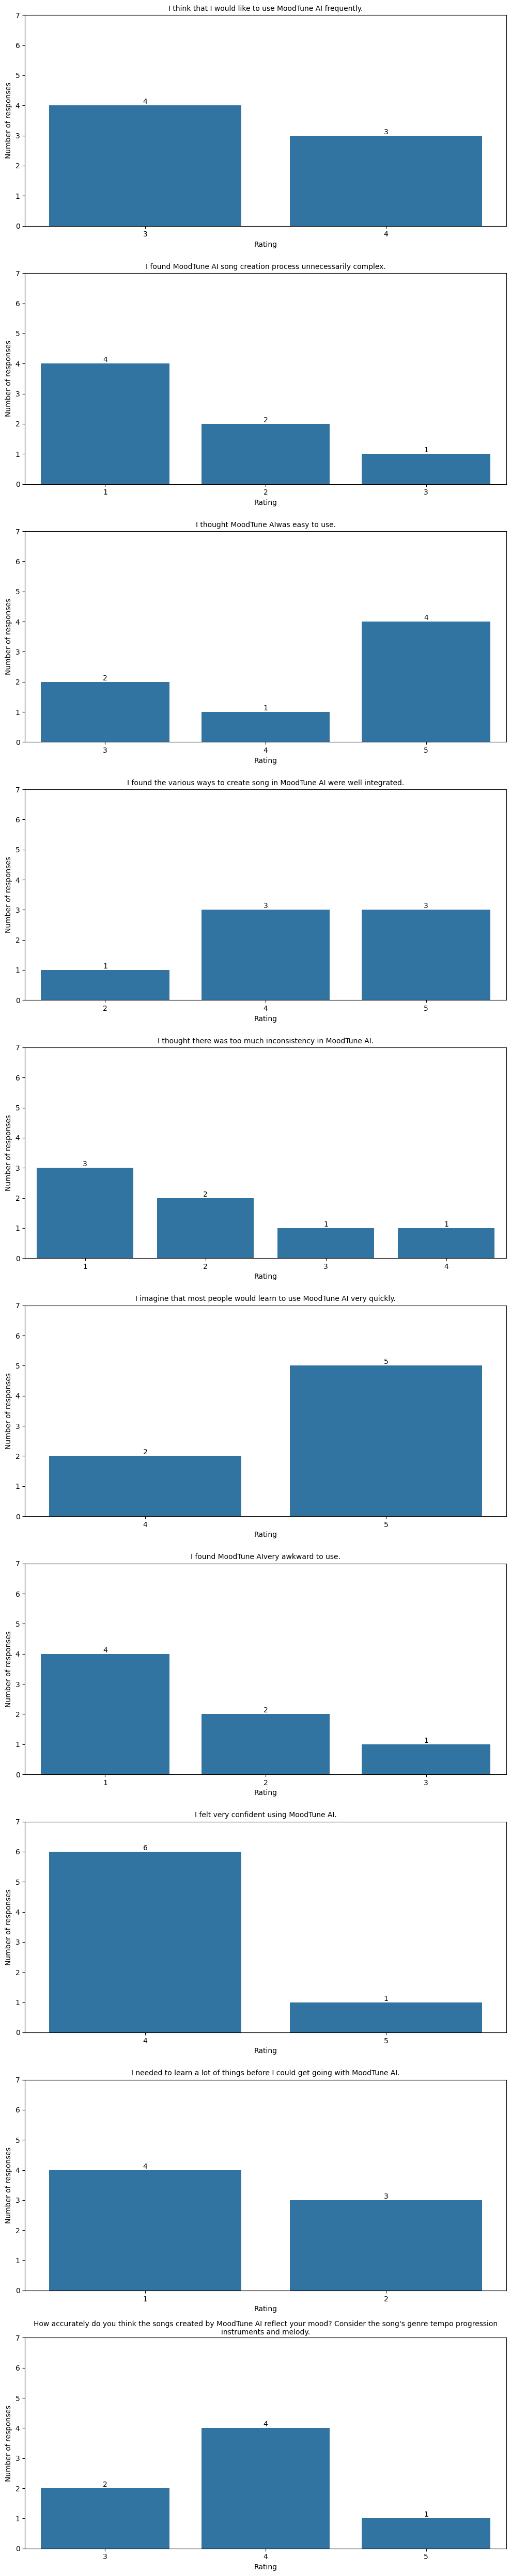


Average ratings for each question:
I think that I would like to use MoodTune AI frequently.: 3.43
I found MoodTune AI song creation process unnecessarily complex.: 1.57
I thought MoodTune AIwas easy to use.: 4.29
I found the various ways to create song in MoodTune AI were well integrated.: 4.14
I thought there was too much inconsistency in MoodTune AI.: 2.00
I imagine that most people would learn to use MoodTune AI very quickly.: 4.71
I found MoodTune AIvery awkward to use.: 1.57
I felt very confident using MoodTune AI.: 4.14
I needed to learn a lot of things before I could get going with MoodTune AI.: 1.43
How accurately do you think the songs created by MoodTune AI reflect your mood? Consider the song's genre tempo progression instruments and melody.: 3.86


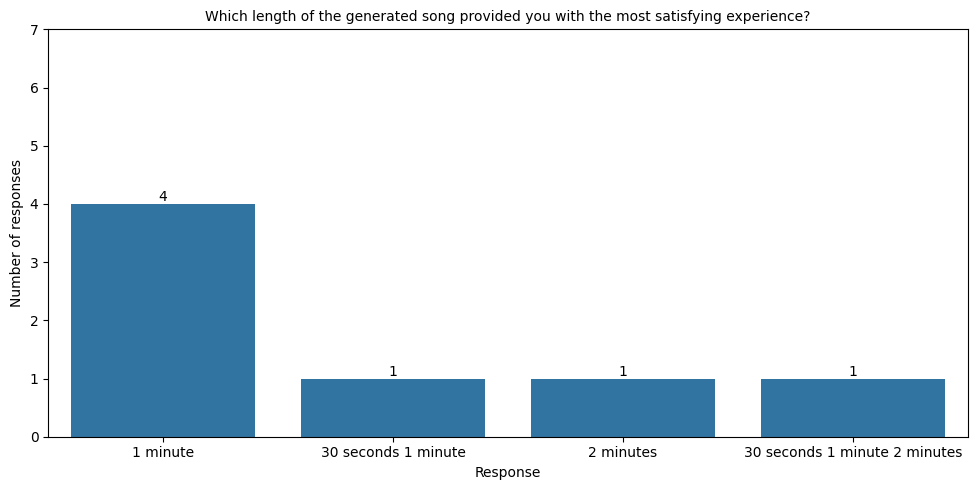


Analysis of textual questions:
Which length of the generated song provided you with the most satisfying experience?
1 minute                         4
30 seconds 1 minute              1
2 minutes                        1
30 seconds 1 minute 2 minutes    1
Name: count, dtype: int64


In [330]:
# Wczytaj plik CSV i zamień na DataFrame
file_path = 'UX.csv'  # Zaktualizuj nazwę pliku
df_UX = pd.DataFrame(pd.read_csv(file_path, on_bad_lines='skip', delimiter=','))

# Wyświetl nazwy kolumn, aby upewnić się, że są poprawne
print("Nazwy kolumn:", df_UX.columns.tolist())

# Lista kolumn do analizy (wszystkie pozostałe kolumny)
columns_to_analyze = df_UX.columns

# Sprawdź, czy lista kolumn do analizy nie jest pusta
if len(columns_to_analyze) == 0:
    raise ValueError("Brak kolumn do analizy. Sprawdź, czy nazwy kolumn są poprawne.")

# Podziel kolumny na numeryczne i tekstowe
numeric_columns = df_UX.select_dtypes(include=['number']).columns
text_columns = df_UX.select_dtypes(include=['object']).columns

# Konwertuj kolumny numeryczne na typ numeryczny
df_UX[numeric_columns] = df_UX[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ustawienia wykresu dla kolumn numerycznych
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 5 * len(numeric_columns)))
plt.subplots_adjust(hspace=0.5)

# Tworzenie wykresów słupkowych dla każdej kolumny numerycznej
for i, column in enumerate(numeric_columns):
    ax = axes[i] if len(numeric_columns) > 1 else axes
    
    # Zliczanie wystąpień każdej oceny
    value_counts = df_UX[column].value_counts().sort_index()
    
    # Tworzenie wykresu słupkowego
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    
    ax.set_title(column, fontsize=10, wrap=True)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Number of responses')
    ax.set_ylim(0, df_UX.shape[0])  # Ustawienie limitu osi y na całkowitą liczbę odpowiedzi
    
    # Dodanie etykiet wartości na górze każdego słupka
    for j, v in enumerate(value_counts.values):
        ax.text(j, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Obliczenie i wydrukowanie średnich ocen
print("\nAverage ratings for each question:")
for column in numeric_columns:
    mean_score = df_UX[column].mean()
    print(f"{column}: {mean_score:.2f}")

# Ustawienia wykresu dla kolumn tekstowych
fig, axes = plt.subplots(len(text_columns), 1, figsize=(10, 5 * len(text_columns)))
plt.subplots_adjust(hspace=0.5)

# Tworzenie wykresów słupkowych dla każdej kolumny tekstowej
for i, column in enumerate(text_columns):
    ax = axes[i] if len(text_columns) > 1 else axes
    
    # Zliczanie wystąpień każdej odpowiedzi
    value_counts = df_UX[column].value_counts()
    
    # Tworzenie wykresu słupkowego
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    
    ax.set_title(column, fontsize=10, wrap=True)
    ax.set_xlabel('Response')
    ax.set_ylabel('Number of responses')
    ax.set_ylim(0, df_UX.shape[0])  # Ustawienie limitu osi y na całkowitą liczbę odpowiedzi
    
    # Dodanie etykiet wartości na górze każdego słupka
    for j, v in enumerate(value_counts.values):
        ax.text(j, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Analiza pytań tekstowych
print("\nAnalysis of textual questions:")
for column in text_columns:
    print(df_UX[column].value_counts())

Nazwy kolumn: ['Participants ID', 'Tense', 'Uneasy', 'Relaxed', 'Uncertain', 'Angry', 'Furious', 'Offended', 'Rebellious', 'Exhaused', 'Lacking energy', 'Worn out', 'Burned out', 'Unhappy', 'Regretful', 'Sad', 'Lonely', 'Confused', 'Unable to concentrate', 'Muddled', 'Suprised', 'Lively', 'Full of energy', 'Carefree', 'Alert']


C:\Users\adamm\AppData\Local\Temp\ipykernel_8308\881012203.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Average Percentage Change', y='Emotion', data=df_changes, palette='Set1')


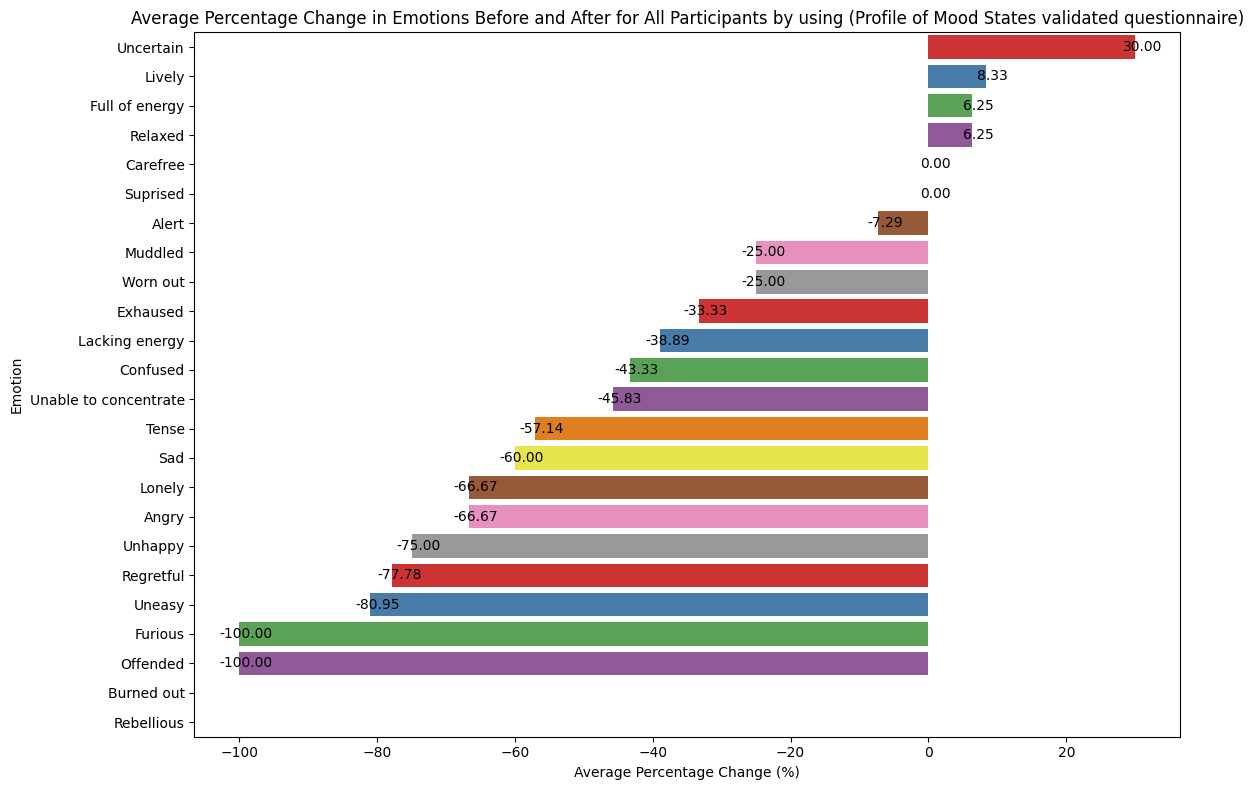

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj plik CSV i zamień na DataFrame
file_path = 'POMS.csv'  # Zaktualizuj nazwę pliku
df_UX = pd.DataFrame(pd.read_csv(file_path, on_bad_lines='skip', delimiter=','))

# Wyświetl nazwy kolumn, aby upewnić się, że są poprawne
print("Nazwy kolumn:", df_UX.columns.tolist())

# Upewnij się, że kolumna 'Participants ID' jest traktowana jako tekst
df_UX["Participants ID"] = df_UX["Participants ID"].astype(str)

# Podziel 'Participants ID' na 'Participant' i 'Response'
df_UX[['Participant', 'Response']] = df_UX["Participants ID"].str.split('.', expand=True)
df_UX['Participant'] = df_UX['Participant'].astype(int)
df_UX['Response'] = df_UX['Response'].astype(int)

# Usuń kolumnę 'Participants ID'
df_UX.drop(columns=["Participants ID"], inplace=True)

# Lista kolumn do analizy (wszystkie pozostałe kolumny oprócz 'Participant' i 'Response')
columns_to_analyze = df_UX.columns.difference(['Participant', 'Response'])

# Sprawdź, czy lista kolumn do analizy nie jest pusta
if len(columns_to_analyze) == 0:
    raise ValueError("Brak kolumn do analizy. Sprawdź, czy nazwy kolumn są poprawne.")

# Grupowanie danych według uczestnika
grouped = df_UX.groupby('Participant')

# Obliczanie średniej procentowej zmiany dla każdej emocji
percentage_changes = []

for column in columns_to_analyze:
    changes = []
    for participant, data in grouped:
        before = data[data['Response'] == 1][column].values
        after = data[data['Response'] == 2][column].values
        
        if len(before) > 0 and len(after) > 0 and before[0] != 0:
            change = ((after[0] - before[0]) / before[0]) * 100
            changes.append(change)
    
    average_change = sum(changes) / len(changes) if changes else 0
    percentage_changes.append(average_change)

# Tworzenie DataFrame z wynikami
df_changes = pd.DataFrame({
    'Emotion': columns_to_analyze,
    'Average Percentage Change': percentage_changes
})

# Sortowanie DataFrame według średniej procentowej zmiany
df_changes = df_changes.sort_values(by='Average Percentage Change', ascending=False)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Average Percentage Change', y='Emotion', data=df_changes, palette='Set1')
plt.title('Average Percentage Change in Emotions Before and After for All Participants by using (Profile of Mood States validated questionnaire)')
plt.xlabel('Average Percentage Change (%)')
plt.ylabel('Emotion')

# Dodanie etykiet wartości na górze każdego słupka
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center', va='center',
                     xytext=(5, 0),  # 5 points horizontal offset
                     textcoords='offset points')

plt.tight_layout()
plt.show()

Nazwy kolumn: ['Participants ID', 'Tense', 'Uneasy', 'Relaxed', 'Uncertain', 'Angry', 'Furious', 'Offended', 'Rebellious', 'Exhaused', 'Lacking energy', 'Worn out', 'Burned out', 'Unhappy', 'Regretful', 'Sad', 'Lonely', 'Confused', 'Unable to concentrate', 'Muddled', 'Suprised', 'Lively', 'Full of energy', 'Carefree', 'Alert']


C:\Users\adamm\AppData\Local\Temp\ipykernel_11488\1295773085.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Average Percentage Change', y='Emotion', data=df_changes, palette='Set1')


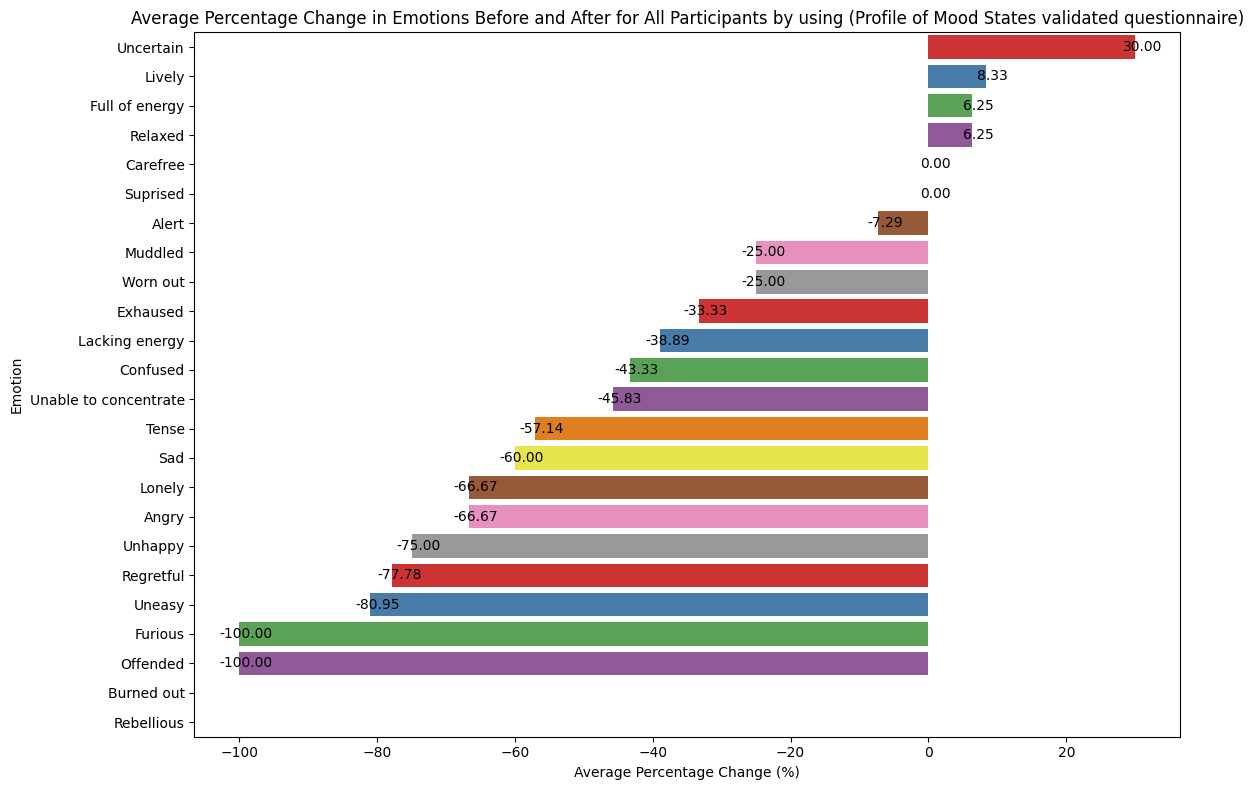

Emotion: Alert
Before: 2.5
After: 2.25
Change: 0.25


Emotion: Angry
Before: 0.375
After: 0.125
Change: 0.25


Emotion: Burned out
Before: nan
After: 0.375
Change: nan


Emotion: Carefree
Before: 2.125
After: 1.875
Change: 0.25


Emotion: Confused
Before: 1.0
After: 0.5
Change: 0.5


Emotion: Exhaused
Before: 1.625
After: 1.125
Change: 0.5


Emotion: Full of energy
Before: 2.0
After: 1.875
Change: 0.125


Emotion: Furious
Before: 0.125
After: 0.0
Change: 0.125


Emotion: Lacking energy
Before: 1.5
After: 1.125
Change: 0.375


Emotion: Lively
Before: 2.0
After: 1.75
Change: 0.25


Emotion: Lonely
Before: 0.5
After: 0.125
Change: 0.375


Emotion: Muddled
Before: 0.75
After: 0.625
Change: 0.125


Emotion: Offended
Before: 0.125
After: 0.0
Change: 0.125


Emotion: Rebellious
Before: 1.25
After: nan
Change: nan


Emotion: Regretful
Before: 1.0
After: 0.25
Change: 0.75


Emotion: Relaxed
Before: 2.625
After: 2.75
Change: -0.125


Emotion: Sad
Before: 0.875
After: 0.375
Change: 0.5


Emotion:

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj plik CSV i zamień na DataFrame
file_path = 'POMS.csv'  # Zaktualizuj nazwę pliku
df_UX = pd.DataFrame(pd.read_csv(file_path, on_bad_lines='skip', delimiter=','))

# Wyświetl nazwy kolumn, aby upewnić się, że są poprawne
print("Nazwy kolumn:", df_UX.columns.tolist())

# Upewnij się, że kolumna 'Participants ID' jest traktowana jako tekst
df_UX["Participants ID"] = df_UX["Participants ID"].astype(str)

# Podziel 'Participants ID' na 'Participant' i 'Response'
df_UX[['Participant', 'Response']] = df_UX["Participants ID"].str.split('.', expand=True)
df_UX['Participant'] = df_UX['Participant'].astype(int)
df_UX['Response'] = df_UX['Response'].astype(int)

# Usuń kolumnę 'Participants ID'
df_UX.drop(columns=["Participants ID"], inplace=True)

# Lista kolumn do analizy (wszystkie pozostałe kolumny oprócz 'Participant' i 'Response')
columns_to_analyze = df_UX.columns.difference(['Participant', 'Response'])

# Sprawdź, czy lista kolumn do analizy nie jest pusta
if len(columns_to_analyze) == 0:
    raise ValueError("Brak kolumn do analizy. Sprawdź, czy nazwy kolumn są poprawne.")

# Grupowanie danych według uczestnika
grouped = df_UX.groupby('Participant')

# Obliczanie średniej procentowej zmiany dla każdej emocji
percentage_changes = []
emotions_before_after = []

for column in columns_to_analyze:
    changes = []
    before_values = 0
    after_values = 0
    for participant, data in grouped:
        before = data[data['Response'] == 1][column].values
        after = data[data['Response'] == 2][column].values
        
        if len(before) > 0 and len(after) > 0 and before[0] != 0:
            change = ((after[0] - before[0]) / before[0]) * 100
            changes.append(change)
            before_values += before[0]
            after_values += after[0]
    
    before_values /= len(grouped)
    after_values /= len(grouped)
    
    average_change = sum(changes) / len(changes) if changes else 0
    percentage_changes.append(average_change)
    
    # Dodanie emocji przed i po do listy
    emotions_before_after.append({
        'Emotion': column,
        'Before': before_values,
        'After': after_values
    })

# Tworzenie DataFrame z wynikami
df_changes = pd.DataFrame({
    'Emotion': columns_to_analyze,
    'Average Percentage Change': percentage_changes
})

# Sortowanie DataFrame według średniej procentowej zmiany
df_changes = df_changes.sort_values(by='Average Percentage Change', ascending=False)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Average Percentage Change', y='Emotion', data=df_changes, palette='Set1')
plt.title('Average Percentage Change in Emotions Before and After for All Participants by using (Profile of Mood States validated questionnaire)')
plt.xlabel('Average Percentage Change (%)')
plt.ylabel('Emotion')

# Dodanie etykiet wartości na górze każdego słupka
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center', va='center',
                     xytext=(5, 0),  # 5 points horizontal offset
                     textcoords='offset points')

plt.tight_layout()
plt.show()

# Wyświetlanie emocji przed i po
for emotion_data in emotions_before_after:
    print(f"Emotion: {emotion_data['Emotion']}")
    print(f"Before: {emotion_data['Before']}")
    print(f"After: {emotion_data['After']}")
    print(f"Change: {emotion_data['Before'] - emotion_data['After']}")
    print("\n")